# This notebook gets the series details and series data from the FRED website


In [107]:
import pandas as pd
import numpy as np
from fred import Fred
import time
import datetime
import csv
import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl

In [108]:
fr = Fred(api_key='d99c7df85ba716ab102c3b81c354d6fa',response_type='df')

In [109]:
# load all the series ids
# some were duplicates, so get the set to get 10868
ser_ids = pd.read_csv('../data/raw/all_ser_ids_1969-2019.csv', names=['id'])
ser_ids = list(set(ser_ids.id))
len(ser_ids)

10868

In [123]:
fr.series.details('RECPROUSM156N', params=params)

frequency frequency_short             id        last_updated  \
0   Monthly               M  RECPROUSM156N 2019-09-03 12:01:02   

                                               notes observation_end  \
0  Smoothed recession probabilities for the Unite...      2019-07-01   

  observation_start  popularity realtime_end realtime_start  \
0        1967-06-01          81   2019-09-03     2019-09-03   

       seasonal_adjustment seasonal_adjustment_short  \
0  Not Seasonally Adjusted                       NSA   

                                   title    units units_short  
0  Smoothed U.S. Recession Probabilities  Percent           %

In [115]:
#drop all ids that are delayed by more than 1 month
params = {
            'realtime_start':'2019-09-03',
            'realtime_end':'2019-09-03'
         }

In [116]:
series_dets = fr.series.details(ser_ids[0], params=params)
count=1
for ser_id in ser_ids[1:]:
    series_dets = pd.concat([series_dets, fr.series.details(ser_id, params=params)])
    count += 1
    if (count % 100) == 0:
        time.sleep(60)
    print(count, end='\r')
series_dets

C:\Users\robin\Anaconda3\envs\recession\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


HTTPError: HTTP Error 504: Gateway Time-out

In [124]:
# sometimes there are erros, continue here
count=4736
for ser_id in ser_ids[4736:]:
    series_dets = pd.concat([series_dets, fr.series.details(ser_id, params=params)])
    count += 1
    if (count % 100) == 0:
        time.sleep(60)
    print(count, end='\r')
series_dets

C:\Users\robin\Anaconda3\envs\recession\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


frequency frequency_short                   id  \
0                  Quarterly               Q      B686RC1Q027SBEA   
0                  Quarterly               Q       SWESPASTT01GYQ   
0                  Quarterly               Q          PRS88003033   
0                  Quarterly               Q          IDSAMRININL   
0                  Quarterly               Q      SPASTT01GBQ661N   
0                    Monthly               M      LFIN55MAJPM647N   
0                    Monthly               M      XTNTVA01ESM664N   
0                  Quarterly               Q      A190RD3Q086SBEA   
0                    Monthly               M       OECDEUROPERECP   
0                  Quarterly               Q           IPB51121NQ   
0                  Quarterly               Q      IRLTLT01BEQ156N   
0                  Quarterly               Q          NCBTPLQ027S   
0                    Monthly               M    IVCINA156MNFRBPHI   
0                  Quarterly               Q      B935RY2Q224SBEA   
0                  Quarterly               Q       PRTCP040400GYQ   
0                  Quarterly               Q      CPALTT01AUQ657N   
0                  Quarterly               Q      CPALTT01DKQ657N   
0                    Monthly               M         CUURA207SEHF   
0                    Monthly               M     NORSLRTTO01IXOBM   
0                    Monthly               M          WPU01210101   
0                  Quarterly               Q      LCEAMN01FIQ657S   
0                  Quarterly               Q       CANCP010000GYQ   
0                  Quarterly               Q      LREM55MAUSQ156N   
0                    Monthly               M      LFUNTTFEUSM647S   
0                  Quarterly               Q              NNBREMV   
0                  Quarterly               Q      AB62RG3Q086SBEA   
0                    Monthly               M      CCUSSP01FIM650N   
0                    Monthly               M                PCEPI   
0                  Quarterly               Q      XTIMVA01SEQ657S   
0                  Quarterly               Q      LFUN64FEUSQ647N   
..                       ...             ...                  ...   
0                    Monthly               M     DGDSRGM1M225SBEA   
0   Quarterly, End of Period               Q         MDOTHFRAGNMA   
0                    Monthly               M   NAFTALOLITONOSTSAM   
0                    Monthly               M                MZMSL   
0                    Monthly               M     DEULORSGPRTSTSAM   
0                    Monthly               M     PCU3371223371228   
0                    Monthly               M   DTCDFNA066MNFRBPHI   
0                  Quarterly               Q          PRS84006032   
0                  Quarterly               Q     PRTCP010000IXNBQ   
0               Daily, 7-Day               D              USARECD   
0   Quarterly, End of Period               Q  MDOTHFRAFNMATP1T4FR   
0                    Monthly               M        CEU8000000006   
0                    Monthly               M        CES9092200001   
0                    Monthly               M      BSPRFT02ATM460S   
0                    Monthly               M      LRAC55MAJPM156N   
0                  Quarterly               Q      A822RV1Q225SBEA   
0                  Quarterly               Q          FBMSLTQ027S   
0                  Quarterly               Q      LORSGPORPTQ659S   
0                    Monthly               M            WPUID6151   
0                  Quarterly               Q          SLGTCDQ027S   
0                    Monthly               M     CANWSCNDW01STSAM   
0                  Quarterly               Q      A043RC1Q027SBEA   
0                  Quarterly               Q      WSCNDW01AUQ659S   
0                  Quarterly               Q      XTIMVA01ISQ664S   
0                    Monthly               M     GBRLOLITONOSTSAM   
0                    Monthly               M          LNS13000050   
0                

In [125]:
series_dets.to_csv('../data/raw/all_series_details-090319.csv')

In [59]:
series_dets = pd.read_csv('../data/raw/all_series_details.csv', parse_dates=[4,6,7,9,10], infer_datetime_format=True)

In [60]:
series_dets.drop(['Unnamed: 0'], axis=1, inplace=True)

In [126]:
series_dets.dtypes

frequency                            object
frequency_short                      object
id                                   object
last_updated                 datetime64[ns]
notes                                object
observation_end              datetime64[ns]
observation_start            datetime64[ns]
popularity                            int64
realtime_end                 datetime64[ns]
realtime_start               datetime64[ns]
seasonal_adjustment                  object
seasonal_adjustment_short            object
title                                object
units                                object
units_short                          object
dtype: object

In [127]:
series_dets.shape

(10868, 15)

In [128]:
# drop series that are not timely, delayed by more than a month
delay_drop = []
ser_ids_fin = []
for ser in ser_ids:
    if series_dets[series_dets.id == ser].iloc[0,1] in ['M', 'W', 'D']:
        if series_dets[series_dets.id == ser].iloc[0,5] < pd.Timestamp('2019-07-01'):
            delay_drop.append(ser)
            delay_drop.append(ser + '_diffA')
            delay_drop.append(ser + '_diffQ')
            delay_drop.append(ser + '_diffMA')
        else:
            ser_ids_fin.append(ser)
    elif series_dets[series_dets.id == ser].iloc[0,1] == 'Q':
        if series_dets[series_dets.id == ser].iloc[0,5] < pd.Timestamp('2019-04-01'):
            delay_drop.append(ser)
            delay_drop.append(ser + '_diffA')
            delay_drop.append(ser + '_diffQ')
            delay_drop.append(ser + '_diffMA')
        else:
            ser_ids_fin.append(ser)
        

In [129]:
len(delay_drop)

18340

In [131]:
for ser in n_drop.iloc[:,0]:
    if ('_diff' in ser) == False:
        if ser in ser_ids_fin:
            ser_ids_fin.remove(ser)

In [132]:
# number of series after dropping delayed series
len(ser_ids_fin)

6273

In [133]:
# save all series to drop
with open('../data/raw/delay_drop.csv', 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(delay_drop)

In [134]:
# save final list of series
with open('../data/processed/all_ser_ids-090519.csv', 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(ser_ids_fin)

In [64]:
# now get all the data for each series id
# start the dataframe with the first series and add to it from there
params = {
            'output_type':1,
            'realtime_start':'1968-02-01',
            'realtime_end':'2019-08-29'
         }
res1 = fr.series.observations(ser_ids[0], params=params)
res1.drop(columns=['realtime_end', 'realtime_start'], inplace=True)
res1.rename(columns={'value':ser_ids[0]}, inplace=True)
res1 = res1[res1.date >= '1968']
res1.set_index('date', inplace=True)
res1 = res1.groupby('date').first()
res1 = pd.concat([res1,pd.DataFrame([2.6], columns=['LRHUTTMAJPM156S'], index=[pd.to_datetime('2019-07-01')])])

count=0
for ser_id in ser_ids[1:]:
    res2 = fr.series.observations(ser_id, params=params) # get the data
    res2.drop(columns=['realtime_end', 'realtime_start'], inplace=True)
    res2.rename(columns={'value':ser_id}, inplace=True)
    res2 = res2[res2.date >= '1968']
    res2 = res2.groupby('date').first()
    if series_dets[series_dets.id == ser_id].iloc[0,1] in ('W','D'):
        res2 = res2.resample('MS').last()
    elif series_dets[series_dets.id == ser_id].iloc[0,1] == 'Q':
        res2 = res2.shift(periods=2, freq='MS') #shift quarterly data because release is delayed
    res1 = res1.join(res2)
    count += 1
    print(count, end='\r')
    if (count % 100) == 0:
        time.sleep(60)


HTTPError: HTTP Error 400: Bad Request

In [76]:
count=6188
for ser_id in ser_ids[6188:]:
    res2 = fr.series.observations(ser_id, params=params)
    res2.drop(columns=['realtime_end', 'realtime_start'], inplace=True)
    res2.rename(columns={'value':ser_id}, inplace=True)
    res2 = res2[res2.date >= '1968']
    res2 = res2.groupby('date').first()
    if series_dets[series_dets.id == ser_id].iloc[0,1] in ('W','D'):
        res2 = res2.resample('MS').last()
    elif series_dets[series_dets.id == ser_id].iloc[0,1] == 'Q':
        res2 = res2.shift(periods=2, freq='MS') #shift quarterly data because release is delayed
    res1 = res1.join(res2)
    count += 1
    print(count, end='\r')
    if (count % 100) == 0:
        time.sleep(60)

In [78]:
res1

LRHUTTMAJPM156S  CANLOLITOAASTSAM  MANMM101ISM657S  DDDFOINS  \
1968-01-01              1.3        100.071247        -1.294706       1.3   
1968-02-01              1.3        100.041530        -0.684118       1.2   
1968-03-01              1.2        100.037037        -1.365679       1.3   
1968-04-01              1.3        100.083939        -0.368835       1.3   
1968-05-01              1.1        100.179917         3.732626       1.3   
1968-06-01              1.2        100.318525         1.627157       1.3   
1968-07-01              1.3        100.502004        -0.642958       1.3   
1968-08-01              1.3        100.714774         0.793323       1.2   
1968-09-01              1.3        100.941167        -0.537501       1.2   
1968-10-01              1.1        101.162736        -1.569396       1.2   
1968-11-01              1.1        101.349548        -0.238780       1.2   
1968-12-01              1.1        101.482695         5.478550       1.4   
1969-01-01              1.1        101.555484         5.224320       1.3   
1969-02-01              1.2        101.549341         2.246114       1.2   
1969-03-01              1.2        101.454669         3.583080       1.2   
1969-04-01              1.2        101.273670         3.321875       1.2   
1969-05-01              1.3        101.021300         2.959139       1.2   
1969-06-01              1.4        100.705092         1.818429       1.2   
1969-07-01              1.3        100.358411         1.552746       1.3   
1969-08-01              1.2        100.018229         2.236357       1.3   
1969-09-01              1.1         99.700495         2.465880       1.2   
1969-10-01              1.0         99.400066         3.057769       1.3   
1969-11-01              1.0         99.105211         2.598596       1.3   
1969-12-01              1.1         98.816428         2.020768       1.3   
1970-01-01              1.1         98.542137         2.393271       1.3   
1970-02-01              1.2         98.297152         3.714847       1.3   
1970-03-01              1.1         98.081255         3.163237       1.4   
1970-04-01              1.2         97.899507         2.676079       1.4   
1970-05-01              1.1         97.760419         5.244601       1.4   
1970-06-01              1.1         97.676795         1.867122       1.4   
...                     ...               ...              ...       ...   
2017-02-01              3.0        100.266300         0.698000      19.2   
2017-03-01              2.8        100.317264         0.505000      19.2   
2017-04-01              2.9        100.345239         0.299000      20.3   
2017-05-01              3.2        100.363350         0.253000      20.3   
2017-06-01              2.9        100.375052         0.254000      20.3   
2017-07-01              3.1        100.387037         0.177000      21.8   
2017-08-01              2.9        100.406892         0.510000      21.8   
2017-09-01              2.9        100.422097         0.687000      21.8   
2017-10-01              2.9        100.424933         0.502428      23.2   
2017-11-01              2.9        100.404182         0.430766      23.2   
2017-12-01              2.8        100.340287         0.368499      23.2   
2018-01-01              2.5        100.221970         0.141505      22.6   
2018-02-01              2.6        100.071363         0.103903      22.6   
2018-03-01              2.7         99.913451         0.217529      22.6   
2018-04-01              2.8         99.759302         0.249208      22.8   
2018-05-01              2.4         99.620393         0.292064      22.8   
2018-06-01              2.6         99.702750         0.217203      22.8   
2018-07-01              2.7         99.634866         0.033728      22.6   
2018-08-01              2.5         99.541259         0.034621      22.6   
2018-09-01              2.4         99.510503         0.115408      22.6   
2018-10-01              2.7         99.350288         0.1680

In [455]:
res1['RECESSION'] = 0
res1.loc['1969-09-01':'1970-02-01', 'RECESSION'] = 1
res1.loc['1973-08-01':'1974-01-01', 'RECESSION'] = 1
res1.loc['1979-10-01':'1980-03-01', 'RECESSION'] = 1
res1.loc['1981-04-01':'1981-09-01', 'RECESSION'] = 1
res1.loc['1990-04-01':'1990-09-01', 'RECESSION'] = 1
res1.loc['2000-12-01':'2001-05-01', 'RECESSION'] = 1
res1.loc['2007-09-01':'2008-02-01', 'RECESSION'] = 1
rec_df = res1['RECESSION'].iloc[12:]

In [77]:
ser_data = res1.fillna(method='ffill').fillna(method='bfill')
ser_data.to_csv('../data/processed/all_series_data-082919.csv')

# write to csv file 

# The code from here and below has been updated and put in a separate notebook. See feature_create.ipynb. Kept here for reference.

In [204]:
sdf = pd.read_csv('../data/processed/sp500_rsales.csv', index_col='date')

In [219]:
ser_data = pd.concat([ser_data, sdf], axis=1, sort=False)

In [217]:
ser_data = pd.read_csv('../data/processed/all_series_data-082919.csv', index_col='date')
ser_data.shape

(619, 10867)

In [226]:
# scale data firt to 0-1
rec_ser = ser_data.RECESSION.values
ser_data.drop('RECESSION', axis=1, inplace=True)

In [228]:
ser_data = ((ser_data - ser_data.min()) / (ser_data.max() - ser_data.min()))
ser_data.head()

LRHUTTMAJPM156S  CANLOLITOAASTSAM  MANMM101ISM657S  DDDFOINS  \
date                                                                       
1968-01-01         6.122449         62.429537        24.707037  1.186944   
1968-02-01         6.122449         62.056849        29.120326  0.890208   
1968-03-01         4.081633         62.000503        24.194049  1.186944   
1968-04-01         6.122449         62.588701        31.399162  1.186944   
1968-05-01         2.040816         63.792373        61.044209  1.186944   

            CES4000000007  PCU333618333618F  IDS1YMAORIAIIS   WPU0284  \
date                                                                    
1968-01-01     100.000000          0.000000             0.0  0.000000   
1968-02-01     100.000000          0.117028             0.0  0.145138   
1968-03-01     100.000000          0.117028             0.0  0.145138   
1968-04-01     100.000000          0.117028             0.0  0.145138   
1968-05-01      98.214286          0.234055             0.0  0.145138   

            IRSTCI01SEQ156N  CUURA318SAM    ...     NAEXKP07USQ652S  \
date                                        ...                       
1968-01-01        47.580645     0.000000    ...            0.210843   
1968-02-01        47.580645     0.000000    ...            0.210843   
1968-03-01        47.580645     0.000000    ...            0.210843   
1968-04-01        47.580645     0.020639    ...            0.210843   
1968-05-01        47.580645     0.020639    ...            0.210843   

            MABMM301INM189N  XTNTVA01GRM664N  LFWA25FEUSM647N  \
date                                                            
1968-01-01         0.000000        99.998775         0.000000   
1968-02-01         0.000500        99.991629         0.115207   
1968-03-01         0.001437        99.995372         0.230415   
1968-04-01         0.002386        99.998026         0.345622   
1968-05-01         0.002334        99.916426         0.464321   

            AB67RG3Q086SBEA  PRS88003142  LNS13000319  ULQEUL01FRQ657S  \
date                                                                     
1968-01-01              0.0     45.16129    11.194030         53.03197   
1968-02-01              0.0     45.16129    17.164179         53.03197   
1968-03-01              0.0     45.16129    19.651741         53.03197   
1968-04-01              0.0     45.16129    23.383085         53.03197   
1968-05-01              0.0     45.16129    23.631841         53.03197   

               SP500     RRSFS  
date                            
1968-01-01  0.983941  0.000000  
1968-02-01  0.885205  0.521578  
1968-03-01  0.914003  1.776164  
1968-04-01  1.162902  1.462129  
1968-05-01  1.204728  1.672004  

[5 rows x 10869 columns]

In [235]:
zero_drop = list(ser_data.sum()[ser_data.sum() == 0].index)

In [236]:
ser_data.drop(zero_drop, axis=1, inplace=True)
ser_data.shape

(619, 10862)

In [237]:
rec_ser = rec_ser[12:]

# add columns for difference from a quarter ago, a year ago, and from the 10month moving average
for col in ser_data.columns:
    ser_data[col + '_diffQ'] = ser_data[col] - ser_data[col].shift(3)
    ser_data[col + '_diffA'] = ser_data[col] - ser_data[col].shift(12)
    ser_data[col + '_diffMA'] = ser_data[col] - ser_data[col].rolling(10).mean()
    
# start the data at 1/1/69
# previous data for the new features above
ser_data = ser_data.iloc[12:]

# make sure no NAs in the data
ser_data.isna().sum().sum()

0

In [238]:
ser_data['RECESSION'] = rec_ser
ser_data.index = pd.to_datetime(ser_data.index)
ser_data.head()

LRHUTTMAJPM156S  CANLOLITOAASTSAM  MANMM101ISM657S  DDDFOINS  \
date                                                                       
1969-01-01         2.040816         81.043511        71.826060  1.186944   
1969-02-01         4.081633         80.966474        50.299815  0.890208   
1969-03-01         4.081633         79.779176        59.963298  0.890208   
1969-04-01         4.081633         77.509242        58.075329  0.890208   
1969-05-01         6.122449         74.344243        55.453506  0.890208   

            CES4000000007  PCU333618333618F  IDS1YMAORIAIIS   WPU0284  \
date                                                                    
1969-01-01      98.214286          0.994734             0.0  1.161103   
1969-02-01      94.642857          1.053248             0.0  1.161103   
1969-03-01      94.642857          1.053248             0.0  1.161103   
1969-04-01      92.857143          1.053248             0.0  1.161103   
1969-05-01      94.642857          1.170275             0.0  0.919207   

            IRSTCI01SEQ156N  CUURA318SAM    ...      ULQEUL01FRQ657S_diffQ  \
date                                        ...                              
1969-01-01        43.548387     0.392143    ...                  -8.035095   
1969-02-01        43.548387     0.392143    ...                  -8.035095   
1969-03-01        51.612903     0.392143    ...                  -0.963910   
1969-04-01        51.612903     0.536617    ...                  -0.963910   
1969-05-01        51.612903     0.536617    ...                  -0.963910   

            ULQEUL01FRQ657S_diffA  ULQEUL01FRQ657S_diffMA  SP500_diffQ  \
date                                                                     
1969-01-01               5.745808              -13.628033    -0.013714   
1969-02-01               5.745808              -14.202614    -0.351065   
1969-03-01               4.781898              -15.644714    -0.080567   
1969-04-01               4.781898              -11.426101     0.023313   
1969-05-01               4.781898               -7.207488     0.182732   

            SP500_diffA  SP500_diffMA  RRSFS_diffQ  RRSFS_diffA  RRSFS_diffMA  \
date                                                                            
1969-01-01     0.369235      0.056431     0.586873     3.791742      0.968923   
1969-02-01     0.300668     -0.113171    -0.489708     3.549220      0.987112   
1969-03-01     0.387749     -0.006994    -0.251073     1.270132     -0.174818   
1969-04-01     0.213587      0.053654    -0.733008     1.596605     -0.237314   
1969-05-01     0.163876      0.026158    -0.590759     1.808034      0.108202   

            RECESSION  
date                   
1969-01-01          0  
1969-02-01          0  
1969-03-01          0  
1969-04-01          0  
1969-05-01          0  

[5 rows x 43449 columns]

In [239]:
# dates to drop from rows that are part of reccesion but not within 3 months of the start
dates = list(pd.date_range(start='1970-03-01', end='1970-09-01', freq='MS'))\
      + list(pd.date_range(start='1974-02-01', end='1975-02-01', freq='MS'))\
      + list(pd.date_range(start='1980-04-01', end='1980-06-01', freq='MS'))\
      + list(pd.date_range(start='1981-10-01', end='1982-10-01', freq='MS'))\
      + list(pd.date_range(start='1990-10-01', end='1991-02-01', freq='MS'))\
      + list(pd.date_range(start='2001-06-01', end='2001-10-01', freq='MS'))\
      + list(pd.date_range(start='2008-03-01', end='2009-05-01', freq='MS'))

ser_data2 = ser_data.drop(dates)
rec_df = ser_data2['RECESSION']



In [242]:
# complete dataset before any drops
ser_data2.to_csv('../data/processed/series_data_scaled-082919.csv')

In [243]:
from statsmodels.tsa.stattools import adfuller

In [244]:
stat_drop=[]
for col, ser in ser_data2.iteritems():
    result = adfuller(ser)
    if result[0] > result[4]['10%']:
        stat_drop.append(col)
len(stat_drop)

C:\Users\robin\Anaconda3\envs\recession\lib\site-packages\statsmodels\regression\linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\robin\Anaconda3\envs\recession\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\robin\Anaconda3\envs\recession\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\robin\Anaconda3\envs\recession\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\robin\Anaconda3\envs\recession\lib\site-packages\scipy\stats\_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


9674

In [246]:
with open('../data/processed/stat_drop.csv', 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(stat_drop)

In [136]:
%%timeit
X.iloc[:,0].corr(X.iloc[:,1])

363 µs ± 1.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [135]:
%%timeit
np.corrcoef(X.iloc[:,0],X.iloc[:,1])[0,1]

261 µs ± 1.82 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [257]:
# start with complete dataset in ser_data2
print(ser_data2.shape)

(546, 43449)


In [258]:
# drop nber recession dates that are after the fact
ser_data2.drop(list(n_drop.iloc[:,0]), axis=1, errors='ignore', inplace=True)
ser_data2.shape

(546, 43405)

In [259]:
# save dataset with nber drop
ser_data2.to_csv('../data/processed/series_data_scaled-nd-082919.csv')

In [260]:
# drop data series that are delayed by more than ~34 days
ser_data2.drop(delay_drop, axis=1, inplace=True, errors='ignore')
ser_data2.shape

(546, 25097)

In [261]:
# save dataset with delay drop
ser_data2.to_csv('../data/processed/series_data_scaled-nd-dd-082919.csv')

In [262]:
# drop data series that are non-stationary per adfuller test
ser_data2.drop(stat_drop, axis=1, inplace=True, errors='ignore')
ser_data2.shape

(546, 19463)

In [263]:
# save dataset with stat drop
ser_data2.to_csv('../data/processed/series_data_scaled-nd-dd-sd-082919.csv')

In [144]:
X = ser_data2.drop(['RECESSION'], axis=1)
X.shape

(546, 19463)

In [73]:
corr_drop = []
idx = 0
for col in X.columns:
    idx += 1
    ser = X[col]
    for cols in X.columns[idx:]:
        corr = np.corrcoef(ser, X[cols])[0,1]
        if corr > 0.95:
            corr_drop.append(col)
            break
    print(idx, end='\r')

In [74]:
len(corr_drop)

6997

In [75]:
with open('../data/raw/corr_drop.csv', 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(corr_drop)

In [35]:
c_drop = pd.read_csv('../data/raw/corr_drop.csv')
c_drop = list(c_drop.columns)

In [77]:
ser_norm_cd = ser_norm.drop(corr_drop, axis=1, errors='ignore')

In [78]:
ser_norm_cd.shape

(546, 12421)

In [79]:
ser_norm_cd.to_csv('../data/processed/series_data_norm-dd-nd-cd-082919.csv')

In [145]:
ser_norm_nd = pd.read_csv('../data/processed/series_data_norm-dd-nd-082919.csv', index_col='date')
ser_norm.shape

(546, 19464)

In [146]:
ser_norm_nd.RECESSION = ser_norm_nd.RECESSION * 100

In [264]:
gc_norm = {}
for col in ser_data2.columns[:-1]:
    gc_norm[col] = statsmodels.tsa.stattools.grangercausalitytests(ser_data2[['RECESSION', col]],1)[1][0]['ssr_chi2test'][1]
gclist_norm = sorted(gc_norm.items(), key=lambda kv: kv[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1845  , p=0.1400  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1966  , p=0.1383  , df=1
likelihood ratio test: chi2=2.1922  , p=0.1387  , df=1
parameter F test:         F=2.1845  , p=0.1400  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3828  , p=0.5363  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3850  , p=0.5350  , df=1
likelihood ratio test: chi2=0.3848  , p=0.5350  , df=1
parameter F test:         F=0.3828  , p=0.5363  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0547  , p=0.0250  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.0827  , p=0.0242  , df=1
likelihood ratio test: chi2=5.0592  , p=0.0245  , df=1
parameter F test:         F=5.0547  , p=0.0250  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0058  , p=0.9394  

parameter F test:         F=3.3062  , p=0.0696  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9376  , p=0.0477  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.9594  , p=0.0466  , df=1
likelihood ratio test: chi2=3.9450  , p=0.0470  , df=1
parameter F test:         F=3.9376  , p=0.0477  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7139  , p=0.1910  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7234  , p=0.1893  , df=1
likelihood ratio test: chi2=1.7207  , p=0.1896  , df=1
parameter F test:         F=1.7139  , p=0.1910  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5213  , p=0.1129  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5352  , p=0.1113  , df=1
likelihood ratio test: chi2=2.5293  , p=0.1117  , df=1
parameter F test:         F=2.5213  , p=0.1129  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=1.7883  , p=0.1817  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7982  , p=0.1799  , df=1
likelihood ratio test: chi2=1.7952  , p=0.1803  , df=1
parameter F test:         F=1.7883  , p=0.1817  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0107  , p=0.9176  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0108  , p=0.9173  , df=1
likelihood ratio test: chi2=0.0108  , p=0.9173  , df=1
parameter F test:         F=0.0107  , p=0.9176  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0452  , p=0.8318  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0454  , p=0.8313  , df=1
likelihood ratio test: chi2=0.0454  , p=0.8313  , df=1
parameter F test:         F=0.0452  , p=0.8318  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2424  , p=0.6227  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0996  , p=0.7524  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1002  , p=0.7516  , df=1
likelihood ratio test: chi2=0.1002  , p=0.7516  , df=1
parameter F test:         F=0.0996  , p=0.7524  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2352  , p=0.6279  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2365  , p=0.6268  , df=1
likelihood ratio test: chi2=0.2364  , p=0.6268  , df=1
parameter F test:         F=0.2352  , p=0.6279  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0604  , p=0.8059  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0608  , p=0.8053  , df=1
likelihood ratio test: chi2=0.0608  , p=0.8053  , df=1
parameter F test:         F=0.0604  , p=0.8059  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5533  , p=0.4573  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.8153  , p=0.3669  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8198  , p=0.3652  , df=1
likelihood ratio test: chi2=0.8192  , p=0.3654  , df=1
parameter F test:         F=0.8153  , p=0.3669  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5951  , p=0.1078  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6094  , p=0.1062  , df=1
likelihood ratio test: chi2=2.6032  , p=0.1066  , df=1
parameter F test:         F=2.5951  , p=0.1078  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0408  , p=0.3081  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0466  , p=0.3063  , df=1
likelihood ratio test: chi2=1.0456  , p=0.3065  , df=1
parameter F test:         F=1.0408  , p=0.3081  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0270  , p=0.8695  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0096  , p=0.9218  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0097  , p=0.9216  , df=1
likelihood ratio test: chi2=0.0097  , p=0.9216  , df=1
parameter F test:         F=0.0096  , p=0.9218  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1184  , p=0.7309  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1191  , p=0.7301  , df=1
likelihood ratio test: chi2=0.1190  , p=0.7301  , df=1
parameter F test:         F=0.1184  , p=0.7309  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8166  , p=0.1783  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8267  , p=0.1765  , df=1
likelihood ratio test: chi2=1.8236  , p=0.1769  , df=1
parameter F test:         F=1.8166  , p=0.1783  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0561  , p=0.1522  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=3.9656  , p=0.0469  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7963  , p=0.1807  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8063  , p=0.1790  , df=1
likelihood ratio test: chi2=1.8033  , p=0.1793  , df=1
parameter F test:         F=1.7963  , p=0.1807  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0200  , p=0.1558  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0312  , p=0.1541  , df=1
likelihood ratio test: chi2=2.0274  , p=0.1545  , df=1
parameter F test:         F=2.0200  , p=0.1558  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0246  , p=0.1553  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0358  , p=0.1536  , df=1
likelihood ratio test: chi2=2.0320  , p=0.1540  , df=1
parameter F test:         F=2.0246  , p=0.1553  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=1.6698  , p=0.1963  , df=1
likelihood ratio test: chi2=1.6673  , p=0.1966  , df=1
parameter F test:         F=1.6607  , p=0.1981  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0138  , p=0.1565  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0249  , p=0.1547  , df=1
likelihood ratio test: chi2=2.0212  , p=0.1551  , df=1
parameter F test:         F=2.0138  , p=0.1565  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3619  , p=0.5477  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3639  , p=0.5463  , df=1
likelihood ratio test: chi2=0.3638  , p=0.5464  , df=1
parameter F test:         F=0.3619  , p=0.5477  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7298  , p=0.0170  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.7615  , p=0.0164  , df=1
likelihood ratio test: chi2=5.7312  , p

ssr based F test:         F=2.3778  , p=0.1237  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3909  , p=0.1220  , df=1
likelihood ratio test: chi2=2.3857  , p=0.1224  , df=1
parameter F test:         F=2.3778  , p=0.1237  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1148  , p=0.0781  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1321  , p=0.0768  , df=1
likelihood ratio test: chi2=3.1231  , p=0.0772  , df=1
parameter F test:         F=3.1148  , p=0.0781  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9233  , p=0.1661  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9340  , p=0.1643  , df=1
likelihood ratio test: chi2=1.9306  , p=0.1647  , df=1
parameter F test:         F=1.9233  , p=0.1661  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1991  , p=0.6556  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.6448  , p=0.4220  , df=1
likelihood ratio test: chi2=0.6445  , p=0.4221  , df=1
parameter F test:         F=0.6413  , p=0.4236  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6916  , p=0.0174  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.7231  , p=0.0167  , df=1
likelihood ratio test: chi2=5.6932  , p=0.0170  , df=1
parameter F test:         F=5.6916  , p=0.0174  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0055  , p=0.9407  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0056  , p=0.9405  , df=1
likelihood ratio test: chi2=0.0056  , p=0.9405  , df=1
parameter F test:         F=0.0055  , p=0.9407  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9426  , p=0.1640  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9534  , p=0.1622  , df=1
likelihood ratio test: chi2=1.9499  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9692  , p=0.0049  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.0133  , p=0.0046  , df=1
likelihood ratio test: chi2=7.9549  , p=0.0048  , df=1
parameter F test:         F=7.9692  , p=0.0049  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3868  , p=0.0367  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.4111  , p=0.0357  , df=1
likelihood ratio test: chi2=4.3933  , p=0.0361  , df=1
parameter F test:         F=4.3868  , p=0.0367  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2121  , p=0.1375  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2243  , p=0.1359  , df=1
likelihood ratio test: chi2=2.2198  , p=0.1363  , df=1
parameter F test:         F=2.2121  , p=0.1375  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7791  , p=0.0961  ,

parameter F test:         F=0.5497  , p=0.4588  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.2882  , p=0.0218  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.3175  , p=0.0211  , df=1
likelihood ratio test: chi2=5.2917  , p=0.0214  , df=1
parameter F test:         F=5.2882  , p=0.0218  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6127  , p=0.4341  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6161  , p=0.4325  , df=1
likelihood ratio test: chi2=0.6157  , p=0.4326  , df=1
parameter F test:         F=0.6127  , p=0.4341  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3828  , p=0.1233  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3960  , p=0.1216  , df=1
likelihood ratio test: chi2=2.3907  , p=0.1221  , df=1
parameter F test:         F=2.3828  , p=0.1233  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=1.4991  , p=0.2208  , df=1
parameter F test:         F=1.4929  , p=0.2223  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7315  , p=0.1888  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7411  , p=0.1870  , df=1
likelihood ratio test: chi2=1.7383  , p=0.1873  , df=1
parameter F test:         F=1.7315  , p=0.1888  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3181  , p=0.1285  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3309  , p=0.1268  , df=1
likelihood ratio test: chi2=2.3260  , p=0.1272  , df=1
parameter F test:         F=2.3181  , p=0.1285  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4725  , p=0.1164  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4862  , p=0.1148  , df=1
likelihood ratio test: chi2=2.4806  , p=0.1153  , df=1
parameter F test:         F=2.4725  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3896  , p=0.1227  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4028  , p=0.1211  , df=1
likelihood ratio test: chi2=2.3976  , p=0.1215  , df=1
parameter F test:         F=2.3896  , p=0.1227  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0161  , p=0.8990  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0162  , p=0.8986  , df=1
likelihood ratio test: chi2=0.0162  , p=0.8986  , df=1
parameter F test:         F=0.0161  , p=0.8990  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7132  , p=0.1911  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7227  , p=0.1894  , df=1
likelihood ratio test: chi2=1.7199  , p=0.1897  , df=1
parameter F test:         F=1.7132  , p=0.1911  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6067  , p=0.4364  ,

ssr based F test:         F=1.0544  , p=0.3050  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0602  , p=0.3032  , df=1
likelihood ratio test: chi2=1.0592  , p=0.3034  , df=1
parameter F test:         F=1.0544  , p=0.3050  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3877  , p=0.1229  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4009  , p=0.1213  , df=1
likelihood ratio test: chi2=2.3956  , p=0.1217  , df=1
parameter F test:         F=2.3877  , p=0.1229  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1826  , p=0.2773  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1891  , p=0.2755  , df=1
likelihood ratio test: chi2=1.1878  , p=0.2758  , df=1
parameter F test:         F=1.1826  , p=0.2773  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8885  , p=0.1699  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=2.0641  , p=0.1514  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6129  , p=0.0182  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.6440  , p=0.0175  , df=1
likelihood ratio test: chi2=5.6150  , p=0.0178  , df=1
parameter F test:         F=5.6129  , p=0.0182  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7759  , p=0.1832  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7857  , p=0.1814  , df=1
likelihood ratio test: chi2=1.7828  , p=0.1818  , df=1
parameter F test:         F=1.7759  , p=0.1832  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0125  , p=0.9112  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0125  , p=0.9109  , df=1
likelihood ratio test: chi2=0.0125  , p=0.9109  , df=1
parameter F test:         F=0.0125  , p=0.9112  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0502  , p=0.1528  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0615  , p=0.1511  , df=1
likelihood ratio test: chi2=2.0576  , p=0.1514  , df=1
parameter F test:         F=2.0502  , p=0.1528  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8861  , p=0.1702  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8966  , p=0.1685  , df=1
likelihood ratio test: chi2=1.8933  , p=0.1688  , df=1
parameter F test:         F=1.8861  , p=0.1702  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2921  , p=0.1306  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3048  , p=0.1290  , df=1
likelihood ratio test: chi2=2.2999  , p=0.1294  , df=1
parameter F test:         F=2.2921  , p=0.1306  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6978  , p=0.4039  ,

parameter F test:         F=6.8937  , p=0.0089  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9579  , p=0.1623  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9688  , p=0.1606  , df=1
likelihood ratio test: chi2=1.9652  , p=0.1610  , df=1
parameter F test:         F=1.9579  , p=0.1623  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3894  , p=0.2390  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3970  , p=0.2372  , df=1
likelihood ratio test: chi2=1.3953  , p=0.2375  , df=1
parameter F test:         F=1.3894  , p=0.2390  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5095  , p=0.4757  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5123  , p=0.4741  , df=1
likelihood ratio test: chi2=0.5121  , p=0.4743  , df=1
parameter F test:         F=0.5095  , p=0.4757  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.6808  , p=0.4097  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6846  , p=0.4080  , df=1
likelihood ratio test: chi2=0.6842  , p=0.4082  , df=1
parameter F test:         F=0.6808  , p=0.4097  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4213  , p=0.5165  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4237  , p=0.5151  , df=1
likelihood ratio test: chi2=0.4235  , p=0.5152  , df=1
parameter F test:         F=0.4213  , p=0.5165  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3296  , p=0.5661  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3314  , p=0.5648  , df=1
likelihood ratio test: chi2=0.3313  , p=0.5649  , df=1
parameter F test:         F=0.3296  , p=0.5661  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9729  , p=0.3244  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0576  , p=0.8104  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0579  , p=0.8098  , df=1
likelihood ratio test: chi2=0.0579  , p=0.8098  , df=1
parameter F test:         F=0.0576  , p=0.8104  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5151  , p=0.0614  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5345  , p=0.0601  , df=1
likelihood ratio test: chi2=3.5231  , p=0.0605  , df=1
parameter F test:         F=3.5151  , p=0.0614  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8391  , p=0.3601  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8437  , p=0.3583  , df=1
likelihood ratio test: chi2=0.8431  , p=0.3585  , df=1
parameter F test:         F=0.8391  , p=0.3601  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1506  , p=0.0134  ,

ssr based F test:         F=0.0472  , p=0.8282  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0474  , p=0.8276  , df=1
likelihood ratio test: chi2=0.0474  , p=0.8276  , df=1
parameter F test:         F=0.0472  , p=0.8282  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1796  , p=0.6719  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1806  , p=0.6709  , df=1
likelihood ratio test: chi2=0.1805  , p=0.6709  , df=1
parameter F test:         F=0.1796  , p=0.6719  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7334  , p=0.1885  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7430  , p=0.1868  , df=1
likelihood ratio test: chi2=1.7402  , p=0.1871  , df=1
parameter F test:         F=1.7334  , p=0.1885  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2137  , p=0.0406  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0030  , p=0.9562  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0030  , p=0.9560  , df=1
likelihood ratio test: chi2=0.0030  , p=0.9560  , df=1
parameter F test:         F=0.0030  , p=0.9562  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0185  , p=0.8918  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0186  , p=0.8915  , df=1
likelihood ratio test: chi2=0.0186  , p=0.8915  , df=1
parameter F test:         F=0.0185  , p=0.8918  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1259  , p=0.7229  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1266  , p=0.7220  , df=1
likelihood ratio test: chi2=0.1265  , p=0.7220  , df=1
parameter F test:         F=0.1259  , p=0.7229  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9883  , p=0.0463  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=1.6555  , p=0.1988  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1371  , p=0.1444  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1489  , p=0.1427  , df=1
likelihood ratio test: chi2=2.1447  , p=0.1431  , df=1
parameter F test:         F=2.1371  , p=0.1444  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8864  , p=0.1702  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8969  , p=0.1684  , df=1
likelihood ratio test: chi2=1.8936  , p=0.1688  , df=1
parameter F test:         F=1.8864  , p=0.1702  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2161  , p=0.6423  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2172  , p=0.6411  , df=1
likelihood ratio test: chi2=0.2172  , p=0.6412  , df=1
parameter F test:         F=0.2161  , p=0.6423  , df_denom=542, df_num=1

Granger Causality
nu

number of lags (no zero) 1
ssr based F test:         F=1.8977  , p=0.1689  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9082  , p=0.1672  , df=1
likelihood ratio test: chi2=1.9049  , p=0.1675  , df=1
parameter F test:         F=1.8977  , p=0.1689  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6489  , p=0.1042  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6636  , p=0.1027  , df=1
likelihood ratio test: chi2=2.6571  , p=0.1031  , df=1
parameter F test:         F=2.6489  , p=0.1042  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9673  , p=0.0469  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.9892  , p=0.0458  , df=1
likelihood ratio test: chi2=3.9747  , p=0.0462  , df=1
parameter F test:         F=3.9673  , p=0.0469  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2894  , p=0.1308  , df_denom=542, df_

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7211  , p=0.0996  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7362  , p=0.0981  , df=1
likelihood ratio test: chi2=2.7293  , p=0.0985  , df=1
parameter F test:         F=2.7211  , p=0.0996  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2711  , p=0.6028  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2726  , p=0.6016  , df=1
likelihood ratio test: chi2=0.2725  , p=0.6017  , df=1
parameter F test:         F=0.2711  , p=0.6028  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.8059  , p=0.0163  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.8381  , p=0.0157  , df=1
likelihood ratio test: chi2=5.8070  , p=0.0160  , df=1
parameter F test:         F=5.8059  , p=0.0163  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0881  , p=0.7668  ,

parameter F test:         F=1.7851  , p=0.1821  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0011  , p=0.9732  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0011  , p=0.9731  , df=1
likelihood ratio test: chi2=0.0011  , p=0.9731  , df=1
parameter F test:         F=0.0011  , p=0.9732  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3300  , p=0.2493  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3373  , p=0.2475  , df=1
likelihood ratio test: chi2=1.3357  , p=0.2478  , df=1
parameter F test:         F=1.3300  , p=0.2493  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1473  , p=0.7013  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1481  , p=0.7004  , df=1
likelihood ratio test: chi2=0.1480  , p=0.7004  , df=1
parameter F test:         F=0.1473  , p=0.7013  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5922  , p=0.1080  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6066  , p=0.1064  , df=1
likelihood ratio test: chi2=2.6004  , p=0.1068  , df=1
parameter F test:         F=2.5922  , p=0.1080  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9605  , p=0.3275  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9658  , p=0.3257  , df=1
likelihood ratio test: chi2=0.9650  , p=0.3259  , df=1
parameter F test:         F=0.9605  , p=0.3275  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2705  , p=0.2602  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2775  , p=0.2584  , df=1
likelihood ratio test: chi2=1.2760  , p=0.2586  , df=1
parameter F test:         F=1.2705  , p=0.2602  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1595  , p=0.0235  ,

likelihood ratio test: chi2=2.1482  , p=0.1427  , df=1
parameter F test:         F=2.1406  , p=0.1440  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4691  , p=0.4937  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4717  , p=0.4922  , df=1
likelihood ratio test: chi2=0.4715  , p=0.4923  , df=1
parameter F test:         F=0.4691  , p=0.4937  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.0705 , p=0.0002  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=14.1484 , p=0.0002  , df=1
likelihood ratio test: chi2=13.9679 , p=0.0002  , df=1
parameter F test:         F=14.0705 , p=0.0002  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3661  , p=0.1246  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3791  , p=0.1230  , df=1
likelihood ratio test: chi2=2.3740  , p=0.1234  , df=1
parameter F test:         F=2.3661  , p

ssr based F test:         F=2.8302  , p=0.0931  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8459  , p=0.0916  , df=1
likelihood ratio test: chi2=2.8385  , p=0.0920  , df=1
parameter F test:         F=2.8302  , p=0.0931  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4572  , p=0.4992  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4597  , p=0.4978  , df=1
likelihood ratio test: chi2=0.4595  , p=0.4979  , df=1
parameter F test:         F=0.4572  , p=0.4992  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1805  , p=0.1403  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1926  , p=0.1387  , df=1
likelihood ratio test: chi2=2.1882  , p=0.1391  , df=1
parameter F test:         F=2.1805  , p=0.1403  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3630  , p=0.2435  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=2.2576  , p=0.1335  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2701  , p=0.1319  , df=1
likelihood ratio test: chi2=2.2654  , p=0.1323  , df=1
parameter F test:         F=2.2576  , p=0.1335  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6748  , p=0.4118  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6785  , p=0.4101  , df=1
likelihood ratio test: chi2=0.6781  , p=0.4103  , df=1
parameter F test:         F=0.6748  , p=0.4118  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8469  , p=0.3578  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8516  , p=0.3561  , df=1
likelihood ratio test: chi2=0.8509  , p=0.3563  , df=1
parameter F test:         F=0.8469  , p=0.3578  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9361  , p=0.0478  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.1416  , p=0.7068  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1424  , p=0.7059  , df=1
likelihood ratio test: chi2=0.1424  , p=0.7059  , df=1
parameter F test:         F=0.1416  , p=0.7068  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2967  , p=0.1302  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3094  , p=0.1286  , df=1
likelihood ratio test: chi2=2.3045  , p=0.1290  , df=1
parameter F test:         F=2.2967  , p=0.1302  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2406  , p=0.6239  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2420  , p=0.6228  , df=1
likelihood ratio test: chi2=0.2419  , p=0.6228  , df=1
parameter F test:         F=0.2406  , p=0.6239  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7070  , p=0.4008  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.1659  , p=0.6839  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1668  , p=0.6830  , df=1
likelihood ratio test: chi2=0.1668  , p=0.6830  , df=1
parameter F test:         F=0.1659  , p=0.6839  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7850  , p=0.0165  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.8171  , p=0.0159  , df=1
likelihood ratio test: chi2=5.7862  , p=0.0162  , df=1
parameter F test:         F=5.7850  , p=0.0165  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0324  , p=0.8571  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0326  , p=0.8567  , df=1
likelihood ratio test: chi2=0.0326  , p=0.8567  , df=1
parameter F test:         F=0.0324  , p=0.8571  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9475  , p=0.1634  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.0365  , p=0.8484  , df=1
likelihood ratio test: chi2=0.0365  , p=0.8484  , df=1
parameter F test:         F=0.0363  , p=0.8489  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8595  , p=0.1732  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8698  , p=0.1715  , df=1
likelihood ratio test: chi2=1.8666  , p=0.1719  , df=1
parameter F test:         F=1.8595  , p=0.1732  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7788  , p=0.1829  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7886  , p=0.1811  , df=1
likelihood ratio test: chi2=1.7857  , p=0.1815  , df=1
parameter F test:         F=1.7788  , p=0.1829  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6492  , p=0.1042  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6638  , p=0.1027  , df=1
likelihood ratio test: chi2=2.6573  , p

ssr based F test:         F=0.9264  , p=0.3362  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9315  , p=0.3345  , df=1
likelihood ratio test: chi2=0.9307  , p=0.3347  , df=1
parameter F test:         F=0.9264  , p=0.3362  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5566  , p=0.2127  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5652  , p=0.2109  , df=1
likelihood ratio test: chi2=1.5630  , p=0.2112  , df=1
parameter F test:         F=1.5566  , p=0.2127  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7114  , p=0.1914  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7209  , p=0.1896  , df=1
likelihood ratio test: chi2=1.7182  , p=0.1899  , df=1
parameter F test:         F=1.7114  , p=0.1914  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9975  , p=0.1581  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=1.0879  , p=0.2974  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0939  , p=0.2956  , df=1
likelihood ratio test: chi2=1.0928  , p=0.2959  , df=1
parameter F test:         F=1.0879  , p=0.2974  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1455  , p=0.1436  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1573  , p=0.1419  , df=1
likelihood ratio test: chi2=2.1531  , p=0.1423  , df=1
parameter F test:         F=2.1455  , p=0.1436  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5303  , p=0.2166  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5388  , p=0.2148  , df=1
likelihood ratio test: chi2=1.5367  , p=0.2151  , df=1
parameter F test:         F=1.5303  , p=0.2166  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3137  , p=0.0215  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=3.6102  , p=0.0580  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.6302  , p=0.0567  , df=1
likelihood ratio test: chi2=3.6182  , p=0.0572  , df=1
parameter F test:         F=3.6102  , p=0.0580  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0448  , p=0.1533  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0561  , p=0.1516  , df=1
likelihood ratio test: chi2=2.0522  , p=0.1520  , df=1
parameter F test:         F=2.0448  , p=0.1533  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1927  , p=0.6609  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1938  , p=0.6598  , df=1
likelihood ratio test: chi2=0.1937  , p=0.6598  , df=1
parameter F test:         F=0.1927  , p=0.6609  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5880  , p=0.0587  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6044  , p=0.2058  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6133  , p=0.2040  , df=1
likelihood ratio test: chi2=1.6109  , p=0.2044  , df=1
parameter F test:         F=1.6044  , p=0.2058  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1990  , p=0.1387  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2112  , p=0.1370  , df=1
likelihood ratio test: chi2=2.2067  , p=0.1374  , df=1
parameter F test:         F=2.1990  , p=0.1387  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6534  , p=0.0178  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.6846  , p=0.0171  , df=1
likelihood ratio test: chi2=5.6552  , p=0.0174  , df=1
parameter F test:         F=5.6534  , p=0.0178  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8786  , p=0.0494  ,

likelihood ratio test: chi2=0.0758  , p=0.7830  , df=1
parameter F test:         F=0.0754  , p=0.7837  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0740  , p=0.7856  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0745  , p=0.7850  , df=1
likelihood ratio test: chi2=0.0745  , p=0.7850  , df=1
parameter F test:         F=0.0740  , p=0.7856  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0089  , p=0.3156  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0145  , p=0.3138  , df=1
likelihood ratio test: chi2=1.0135  , p=0.3141  , df=1
parameter F test:         F=1.0089  , p=0.3156  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6980  , p=0.0173  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.7296  , p=0.0167  , df=1
likelihood ratio test: chi2=5.6997  , p=0.0170  , df=1
parameter F test:         F=5.6980  , p

ssr based chi2 test:   chi2=0.0235  , p=0.8782  , df=1
likelihood ratio test: chi2=0.0235  , p=0.8782  , df=1
parameter F test:         F=0.0234  , p=0.8786  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2452  , p=0.6207  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2465  , p=0.6195  , df=1
likelihood ratio test: chi2=0.2465  , p=0.6196  , df=1
parameter F test:         F=0.2452  , p=0.6207  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2010  , p=0.6541  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2022  , p=0.6530  , df=1
likelihood ratio test: chi2=0.2021  , p=0.6530  , df=1
parameter F test:         F=0.2010  , p=0.6541  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0420  , p=0.8377  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0422  , p=0.8372  , df=1
likelihood ratio test: chi2=0.0422  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1090  , p=0.1470  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1207  , p=0.1453  , df=1
likelihood ratio test: chi2=2.1166  , p=0.1457  , df=1
parameter F test:         F=2.1090  , p=0.1470  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6595  , p=0.4171  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6632  , p=0.4154  , df=1
likelihood ratio test: chi2=0.6628  , p=0.4156  , df=1
parameter F test:         F=0.6595  , p=0.4171  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0463  , p=0.1532  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0576  , p=0.1514  , df=1
likelihood ratio test: chi2=2.0538  , p=0.1518  , df=1
parameter F test:         F=2.0463  , p=0.1532  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1770  , p=0.2785  ,

ssr based F test:         F=2.9402  , p=0.0870  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9565  , p=0.0855  , df=1
likelihood ratio test: chi2=2.9485  , p=0.0860  , df=1
parameter F test:         F=2.9402  , p=0.0870  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9254  , p=0.3365  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9305  , p=0.3347  , df=1
likelihood ratio test: chi2=0.9297  , p=0.3349  , df=1
parameter F test:         F=0.9254  , p=0.3365  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5230  , p=0.4699  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5259  , p=0.4683  , df=1
likelihood ratio test: chi2=0.5256  , p=0.4684  , df=1
parameter F test:         F=0.5230  , p=0.4699  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6924  , p=0.0552  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=3.6415  , p=0.0569  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.6617  , p=0.0557  , df=1
likelihood ratio test: chi2=3.6494  , p=0.0561  , df=1
parameter F test:         F=3.6415  , p=0.0569  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0096  , p=0.1569  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0208  , p=0.1552  , df=1
likelihood ratio test: chi2=2.0170  , p=0.1555  , df=1
parameter F test:         F=2.0096  , p=0.1569  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9560  , p=0.0861  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9724  , p=0.0847  , df=1
likelihood ratio test: chi2=2.9643  , p=0.0851  , df=1
parameter F test:         F=2.9560  , p=0.0861  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.2448 , p=0.0003  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=1.8275  , p=0.1764  , df=1
parameter F test:         F=1.8205  , p=0.1778  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0140  , p=0.9057  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0141  , p=0.9054  , df=1
likelihood ratio test: chi2=0.0141  , p=0.9054  , df=1
parameter F test:         F=0.0140  , p=0.9057  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1296  , p=0.7190  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1303  , p=0.7181  , df=1
likelihood ratio test: chi2=0.1303  , p=0.7181  , df=1
parameter F test:         F=0.1296  , p=0.7190  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3571  , p=0.2446  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3646  , p=0.2427  , df=1
likelihood ratio test: chi2=1.3629  , p=0.2430  , df=1
parameter F test:         F=1.3571  , p

ssr based chi2 test:   chi2=5.7646  , p=0.0164  , df=1
likelihood ratio test: chi2=5.7344  , p=0.0166  , df=1
parameter F test:         F=5.7329  , p=0.0170  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9086  , p=0.1677  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9191  , p=0.1660  , df=1
likelihood ratio test: chi2=1.9158  , p=0.1663  , df=1
parameter F test:         F=1.9086  , p=0.1677  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4606  , p=0.4976  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4631  , p=0.4962  , df=1
likelihood ratio test: chi2=0.4630  , p=0.4962  , df=1
parameter F test:         F=0.4606  , p=0.4976  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.7196  , p=0.0057  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.7624  , p=0.0053  , df=1
likelihood ratio test: chi2=7.7076  , p

ssr based chi2 test:   chi2=5.9186  , p=0.0150  , df=1
likelihood ratio test: chi2=5.8867  , p=0.0153  , df=1
parameter F test:         F=5.8861  , p=0.0156  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3566  , p=0.5507  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3585  , p=0.5493  , df=1
likelihood ratio test: chi2=0.3584  , p=0.5494  , df=1
parameter F test:         F=0.3566  , p=0.5507  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=18.9304 , p=0.0000  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=19.0352 , p=0.0000  , df=1
likelihood ratio test: chi2=18.7103 , p=0.0000  , df=1
parameter F test:         F=18.9304 , p=0.0000  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5363  , p=0.2157  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5448  , p=0.2139  , df=1
likelihood ratio test: chi2=1.5426  , p

ssr based F test:         F=5.6794  , p=0.0175  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.7108  , p=0.0169  , df=1
likelihood ratio test: chi2=5.6811  , p=0.0171  , df=1
parameter F test:         F=5.6794  , p=0.0175  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9266  , p=0.0480  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.9484  , p=0.0469  , df=1
likelihood ratio test: chi2=3.9341  , p=0.0473  , df=1
parameter F test:         F=3.9266  , p=0.0480  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0641  , p=0.8002  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0644  , p=0.7996  , df=1
likelihood ratio test: chi2=0.0644  , p=0.7996  , df=1
parameter F test:         F=0.0641  , p=0.8002  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1361  , p=0.7123  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.5043  , p=0.4779  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5071  , p=0.4764  , df=1
likelihood ratio test: chi2=0.5068  , p=0.4765  , df=1
parameter F test:         F=0.5043  , p=0.4779  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7961  , p=0.0951  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8116  , p=0.0936  , df=1
likelihood ratio test: chi2=2.8044  , p=0.0940  , df=1
parameter F test:         F=2.7961  , p=0.0951  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3253  , p=0.2501  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3326  , p=0.2483  , df=1
likelihood ratio test: chi2=1.3310  , p=0.2486  , df=1
parameter F test:         F=1.3253  , p=0.2501  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7167  , p=0.3976  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2784  , p=0.5979  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2800  , p=0.5967  , df=1
likelihood ratio test: chi2=0.2799  , p=0.5968  , df=1
parameter F test:         F=0.2784  , p=0.5979  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2347  , p=0.0128  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.2692  , p=0.0123  , df=1
likelihood ratio test: chi2=6.2334  , p=0.0125  , df=1
parameter F test:         F=6.2347  , p=0.0128  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5961  , p=0.1077  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6105  , p=0.1062  , df=1
likelihood ratio test: chi2=2.6043  , p=0.1066  , df=1
parameter F test:         F=2.5961  , p=0.1077  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7768  , p=0.0962  ,

parameter F test:         F=1.4219  , p=0.2336  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3614  , p=0.1250  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3744  , p=0.1233  , df=1
likelihood ratio test: chi2=2.3693  , p=0.1237  , df=1
parameter F test:         F=2.3614  , p=0.1250  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4356  , p=0.2314  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4435  , p=0.2296  , df=1
likelihood ratio test: chi2=1.4416  , p=0.2299  , df=1
parameter F test:         F=1.4356  , p=0.2314  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6236  , p=0.0320  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.6492  , p=0.0311  , df=1
likelihood ratio test: chi2=4.6295  , p=0.0314  , df=1
parameter F test:         F=4.6236  , p=0.0320  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=7.4364  , p=0.0064  , df=1
likelihood ratio test: chi2=7.3861  , p=0.0066  , df=1
parameter F test:         F=7.3954  , p=0.0067  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4351  , p=0.5098  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4375  , p=0.5083  , df=1
likelihood ratio test: chi2=0.4373  , p=0.5084  , df=1
parameter F test:         F=0.4351  , p=0.5098  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=23.9267 , p=0.0000  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=24.0591 , p=0.0000  , df=1
likelihood ratio test: chi2=23.5432 , p=0.0000  , df=1
parameter F test:         F=23.9267 , p=0.0000  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5173  , p=0.2186  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5257  , p=0.2168  , df=1
likelihood ratio test: chi2=1.5236  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9036  , p=0.3422  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9086  , p=0.3405  , df=1
likelihood ratio test: chi2=0.9079  , p=0.3407  , df=1
parameter F test:         F=0.9036  , p=0.3422  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0405  , p=0.8406  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0407  , p=0.8401  , df=1
likelihood ratio test: chi2=0.0407  , p=0.8401  , df=1
parameter F test:         F=0.0405  , p=0.8406  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4733  , p=0.1164  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4870  , p=0.1148  , df=1
likelihood ratio test: chi2=2.4814  , p=0.1152  , df=1
parameter F test:         F=2.4733  , p=0.1164  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4522  , p=0.5016  ,

ssr based chi2 test:   chi2=3.5678  , p=0.0589  , df=1
likelihood ratio test: chi2=3.5561  , p=0.0593  , df=1
parameter F test:         F=3.5481  , p=0.0601  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1269  , p=0.7218  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1276  , p=0.7210  , df=1
likelihood ratio test: chi2=0.1276  , p=0.7210  , df=1
parameter F test:         F=0.1269  , p=0.7218  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0012  , p=0.9729  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0012  , p=0.9728  , df=1
likelihood ratio test: chi2=0.0012  , p=0.9728  , df=1
parameter F test:         F=0.0012  , p=0.9729  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0934  , p=0.7601  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0939  , p=0.7593  , df=1
likelihood ratio test: chi2=0.0939  , p

ssr based F test:         F=0.0064  , p=0.9365  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0064  , p=0.9363  , df=1
likelihood ratio test: chi2=0.0064  , p=0.9363  , df=1
parameter F test:         F=0.0064  , p=0.9365  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2301  , p=0.6316  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2314  , p=0.6305  , df=1
likelihood ratio test: chi2=0.2313  , p=0.6305  , df=1
parameter F test:         F=0.2301  , p=0.6316  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1996  , p=0.6552  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2007  , p=0.6542  , df=1
likelihood ratio test: chi2=0.2007  , p=0.6542  , df=1
parameter F test:         F=0.1996  , p=0.6552  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0078  , p=0.9297  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=1.5028  , p=0.2208  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5111  , p=0.2190  , df=1
likelihood ratio test: chi2=1.5091  , p=0.2193  , df=1
parameter F test:         F=1.5028  , p=0.2208  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4049  , p=0.0204  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.4348  , p=0.0197  , df=1
likelihood ratio test: chi2=5.4079  , p=0.0200  , df=1
parameter F test:         F=5.4049  , p=0.0204  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0958  , p=0.7570  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0964  , p=0.7562  , df=1
likelihood ratio test: chi2=0.0964  , p=0.7562  , df=1
parameter F test:         F=0.0958  , p=0.7570  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0011  , p=0.9739  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0671  , p=0.7957  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0675  , p=0.7950  , df=1
likelihood ratio test: chi2=0.0675  , p=0.7950  , df=1
parameter F test:         F=0.0671  , p=0.7957  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1498  , p=0.2841  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1562  , p=0.2823  , df=1
likelihood ratio test: chi2=1.1550  , p=0.2825  , df=1
parameter F test:         F=1.1498  , p=0.2841  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9953  , p=0.3189  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0008  , p=0.3171  , df=1
likelihood ratio test: chi2=0.9999  , p=0.3173  , df=1
parameter F test:         F=0.9953  , p=0.3189  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1338  , p=0.2874  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1496  , p=0.6990  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1505  , p=0.6981  , df=1
likelihood ratio test: chi2=0.1504  , p=0.6981  , df=1
parameter F test:         F=0.1496  , p=0.6990  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7460  , p=0.3881  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7501  , p=0.3864  , df=1
likelihood ratio test: chi2=0.7496  , p=0.3866  , df=1
parameter F test:         F=0.7460  , p=0.3881  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4663  , p=0.4950  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4689  , p=0.4935  , df=1
likelihood ratio test: chi2=0.4687  , p=0.4936  , df=1
parameter F test:         F=0.4663  , p=0.4950  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1384  , p=0.7100  ,

ssr based F test:         F=0.1324  , p=0.7161  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1331  , p=0.7152  , df=1
likelihood ratio test: chi2=0.1331  , p=0.7152  , df=1
parameter F test:         F=0.1324  , p=0.7161  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.9405 , p=0.0002  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=14.0177 , p=0.0002  , df=1
likelihood ratio test: chi2=13.8405 , p=0.0002  , df=1
parameter F test:         F=13.9405 , p=0.0002  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=23.5608 , p=0.0000  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=23.6912 , p=0.0000  , df=1
likelihood ratio test: chi2=23.1907 , p=0.0000  , df=1
parameter F test:         F=23.5608 , p=0.0000  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=31.4633 , p=0.0000  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9895  , p=0.3203  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9950  , p=0.3185  , df=1
likelihood ratio test: chi2=0.9941  , p=0.3187  , df=1
parameter F test:         F=0.9895  , p=0.3203  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6889  , p=0.4069  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6927  , p=0.4053  , df=1
likelihood ratio test: chi2=0.6922  , p=0.4054  , df=1
parameter F test:         F=0.6889  , p=0.4069  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7461  , p=0.3881  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7502  , p=0.3864  , df=1
likelihood ratio test: chi2=0.7497  , p=0.3866  , df=1
parameter F test:         F=0.7461  , p=0.3881  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0052  , p=0.9425  ,

ssr based F test:         F=0.1903  , p=0.6628  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1913  , p=0.6618  , df=1
likelihood ratio test: chi2=0.1913  , p=0.6618  , df=1
parameter F test:         F=0.1903  , p=0.6628  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0018  , p=0.9660  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0018  , p=0.9659  , df=1
likelihood ratio test: chi2=0.0018  , p=0.9659  , df=1
parameter F test:         F=0.0018  , p=0.9660  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0661  , p=0.3023  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0720  , p=0.3005  , df=1
likelihood ratio test: chi2=1.0709  , p=0.3007  , df=1
parameter F test:         F=1.0661  , p=0.3023  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3846  , p=0.0118  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.5555  , p=0.4564  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5586  , p=0.4548  , df=1
likelihood ratio test: chi2=0.5583  , p=0.4550  , df=1
parameter F test:         F=0.5555  , p=0.4564  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0010  , p=0.9752  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0010  , p=0.9751  , df=1
likelihood ratio test: chi2=0.0010  , p=0.9751  , df=1
parameter F test:         F=0.0010  , p=0.9752  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3883  , p=0.5334  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3905  , p=0.5320  , df=1
likelihood ratio test: chi2=0.3904  , p=0.5321  , df=1
parameter F test:         F=0.3883  , p=0.5334  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3443  , p=0.5576  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0432  , p=0.8354  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0434  , p=0.8349  , df=1
likelihood ratio test: chi2=0.0434  , p=0.8349  , df=1
parameter F test:         F=0.0432  , p=0.8354  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0552  , p=0.8143  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0555  , p=0.8137  , df=1
likelihood ratio test: chi2=0.0555  , p=0.8137  , df=1
parameter F test:         F=0.0552  , p=0.8143  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1348  , p=0.7137  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1355  , p=0.7128  , df=1
likelihood ratio test: chi2=0.1355  , p=0.7128  , df=1
parameter F test:         F=0.1348  , p=0.7137  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2808  , p=0.5964  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.5132  , p=0.4741  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5160  , p=0.4726  , df=1
likelihood ratio test: chi2=0.5158  , p=0.4727  , df=1
parameter F test:         F=0.5132  , p=0.4741  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1397  , p=0.7087  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1405  , p=0.7078  , df=1
likelihood ratio test: chi2=0.1405  , p=0.7078  , df=1
parameter F test:         F=0.1397  , p=0.7087  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6305  , p=0.4275  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6340  , p=0.4259  , df=1
likelihood ratio test: chi2=0.6336  , p=0.4260  , df=1
parameter F test:         F=0.6305  , p=0.4275  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1978  , p=0.6567  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0729  , p=0.7872  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0733  , p=0.7865  , df=1
likelihood ratio test: chi2=0.0733  , p=0.7865  , df=1
parameter F test:         F=0.0729  , p=0.7872  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0036  , p=0.9520  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0036  , p=0.9519  , df=1
likelihood ratio test: chi2=0.0036  , p=0.9519  , df=1
parameter F test:         F=0.0036  , p=0.9520  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1541  , p=0.6948  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1549  , p=0.6939  , df=1
likelihood ratio test: chi2=0.1549  , p=0.6939  , df=1
parameter F test:         F=0.1541  , p=0.6948  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7567  , p=0.0974  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.0413  , p=0.8389  , df=1
parameter F test:         F=0.0411  , p=0.8394  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6739  , p=0.4121  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6776  , p=0.4104  , df=1
likelihood ratio test: chi2=0.6772  , p=0.4106  , df=1
parameter F test:         F=0.6739  , p=0.4121  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9859  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0003  , p=0.9858  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9858  , df=1
parameter F test:         F=0.0003  , p=0.9859  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0236  , p=0.8779  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0237  , p=0.8775  , df=1
likelihood ratio test: chi2=0.0237  , p=0.8775  , df=1
parameter F test:         F=0.0236  , p

likelihood ratio test: chi2=0.0947  , p=0.7583  , df=1
parameter F test:         F=0.0942  , p=0.7591  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0314  , p=0.8594  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0316  , p=0.8589  , df=1
likelihood ratio test: chi2=0.0316  , p=0.8589  , df=1
parameter F test:         F=0.0314  , p=0.8594  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8701  , p=0.3513  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8749  , p=0.3496  , df=1
likelihood ratio test: chi2=0.8742  , p=0.3498  , df=1
parameter F test:         F=0.8701  , p=0.3513  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1346  , p=0.0772  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1519  , p=0.0758  , df=1
likelihood ratio test: chi2=3.1429  , p=0.0763  , df=1
parameter F test:         F=3.1346  , p

ssr based F test:         F=0.0890  , p=0.7655  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0895  , p=0.7648  , df=1
likelihood ratio test: chi2=0.0895  , p=0.7648  , df=1
parameter F test:         F=0.0890  , p=0.7655  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0994  , p=0.7526  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1000  , p=0.7518  , df=1
likelihood ratio test: chi2=0.1000  , p=0.7518  , df=1
parameter F test:         F=0.0994  , p=0.7526  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0097  , p=0.9215  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0098  , p=0.9213  , df=1
likelihood ratio test: chi2=0.0098  , p=0.9213  , df=1
parameter F test:         F=0.0097  , p=0.9215  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2354  , p=0.6277  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.0003  , p=0.9860  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9860  , df=1
parameter F test:         F=0.0003  , p=0.9860  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3619  , p=0.1249  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3750  , p=0.1233  , df=1
likelihood ratio test: chi2=2.3698  , p=0.1237  , df=1
parameter F test:         F=2.3619  , p=0.1249  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1375  , p=0.7109  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1382  , p=0.7100  , df=1
likelihood ratio test: chi2=0.1382  , p=0.7101  , df=1
parameter F test:         F=0.1375  , p=0.7109  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1214  , p=0.7276  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1221  , p=0.7268  , df=1
likelihood ratio test: chi2=0.1221  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1666  , p=0.6833  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1675  , p=0.6824  , df=1
likelihood ratio test: chi2=0.1675  , p=0.6824  , df=1
parameter F test:         F=0.1666  , p=0.6833  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2096  , p=0.0738  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2273  , p=0.0724  , df=1
likelihood ratio test: chi2=3.2178  , p=0.0728  , df=1
parameter F test:         F=3.2096  , p=0.0738  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0852  , p=0.7705  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0857  , p=0.7698  , df=1
likelihood ratio test: chi2=0.0857  , p=0.7698  , df=1
parameter F test:         F=0.0852  , p=0.7705  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0199  , p=0.8878  ,

ssr based F test:         F=1.2448  , p=0.2650  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2517  , p=0.2632  , df=1
likelihood ratio test: chi2=1.2502  , p=0.2635  , df=1
parameter F test:         F=1.2448  , p=0.2650  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0180  , p=0.8932  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0181  , p=0.8929  , df=1
likelihood ratio test: chi2=0.0181  , p=0.8929  , df=1
parameter F test:         F=0.0180  , p=0.8932  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7473  , p=0.1868  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7570  , p=0.1850  , df=1
likelihood ratio test: chi2=1.7541  , p=0.1854  , df=1
parameter F test:         F=1.7473  , p=0.1868  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0815  , p=0.7754  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.1237  , p=0.7251  , df=1
likelihood ratio test: chi2=0.1237  , p=0.7251  , df=1
parameter F test:         F=0.1230  , p=0.7259  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1882  , p=0.2762  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1947  , p=0.2744  , df=1
likelihood ratio test: chi2=1.1934  , p=0.2746  , df=1
parameter F test:         F=1.1882  , p=0.2762  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8087  , p=0.3689  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8132  , p=0.3672  , df=1
likelihood ratio test: chi2=0.8126  , p=0.3674  , df=1
parameter F test:         F=0.8087  , p=0.3689  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0258  , p=0.8724  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0260  , p=0.8720  , df=1
likelihood ratio test: chi2=0.0260  , p

ssr based F test:         F=0.6114  , p=0.4346  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6147  , p=0.4330  , df=1
likelihood ratio test: chi2=0.6144  , p=0.4331  , df=1
parameter F test:         F=0.6114  , p=0.4346  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1758  , p=0.6752  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1768  , p=0.6741  , df=1
likelihood ratio test: chi2=0.1768  , p=0.6742  , df=1
parameter F test:         F=0.1758  , p=0.6752  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2302  , p=0.2679  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2370  , p=0.2660  , df=1
likelihood ratio test: chi2=1.2356  , p=0.2663  , df=1
parameter F test:         F=1.2302  , p=0.2679  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0954  , p=0.2958  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.8251  , p=0.3641  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8297  , p=0.3624  , df=1
likelihood ratio test: chi2=0.8291  , p=0.3625  , df=1
parameter F test:         F=0.8251  , p=0.3641  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0919  , p=0.7619  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0924  , p=0.7612  , df=1
likelihood ratio test: chi2=0.0924  , p=0.7612  , df=1
parameter F test:         F=0.0919  , p=0.7619  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2811  , p=0.5962  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2826  , p=0.5950  , df=1
likelihood ratio test: chi2=0.2825  , p=0.5950  , df=1
parameter F test:         F=0.2811  , p=0.5962  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0036  , p=0.9521  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=1.4600  , p=0.2275  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1609  , p=0.2818  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1673  , p=0.2800  , df=1
likelihood ratio test: chi2=1.1661  , p=0.2802  , df=1
parameter F test:         F=1.1609  , p=0.2818  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0002  , p=0.9896  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0002  , p=0.9896  , df=1
likelihood ratio test: chi2=0.0002  , p=0.9896  , df=1
parameter F test:         F=0.0002  , p=0.9896  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6925  , p=0.4057  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6963  , p=0.4040  , df=1
likelihood ratio test: chi2=0.6959  , p=0.4042  , df=1
parameter F test:         F=0.6925  , p=0.4057  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=0.5299  , p=0.4667  , df=1
likelihood ratio test: chi2=0.5296  , p=0.4668  , df=1
parameter F test:         F=0.5270  , p=0.4682  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0765  , p=0.7822  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0769  , p=0.7815  , df=1
likelihood ratio test: chi2=0.0769  , p=0.7815  , df=1
parameter F test:         F=0.0765  , p=0.7822  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.4019  , p=0.0117  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.4373  , p=0.0112  , df=1
likelihood ratio test: chi2=6.3996  , p=0.0114  , df=1
parameter F test:         F=6.4019  , p=0.0117  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1111  , p=0.0431  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.1338  , p=0.0420  , df=1
likelihood ratio test: chi2=4.1182  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1380  , p=0.7105  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1387  , p=0.7096  , df=1
likelihood ratio test: chi2=0.1387  , p=0.7096  , df=1
parameter F test:         F=0.1380  , p=0.7105  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0759  , p=0.7830  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0763  , p=0.7823  , df=1
likelihood ratio test: chi2=0.0763  , p=0.7823  , df=1
parameter F test:         F=0.0759  , p=0.7830  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8815  , p=0.0902  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8975  , p=0.0887  , df=1
likelihood ratio test: chi2=2.8898  , p=0.0891  , df=1
parameter F test:         F=2.8815  , p=0.0902  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1105  , p=0.7397  ,

number of lags (no zero) 1
ssr based F test:         F=0.3337  , p=0.5637  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3356  , p=0.5624  , df=1
likelihood ratio test: chi2=0.3355  , p=0.5624  , df=1
parameter F test:         F=0.3337  , p=0.5637  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0006  , p=0.9811  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0006  , p=0.9810  , df=1
likelihood ratio test: chi2=0.0006  , p=0.9810  , df=1
parameter F test:         F=0.0006  , p=0.9811  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0394  , p=0.8427  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0396  , p=0.8422  , df=1
likelihood ratio test: chi2=0.0396  , p=0.8422  , df=1
parameter F test:         F=0.0394  , p=0.8427  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1979  , p=0.2742  , df_denom=542, df_

ssr based chi2 test:   chi2=0.2085  , p=0.6480  , df=1
likelihood ratio test: chi2=0.2084  , p=0.6480  , df=1
parameter F test:         F=0.2073  , p=0.6491  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0055  , p=0.9411  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0055  , p=0.9409  , df=1
likelihood ratio test: chi2=0.0055  , p=0.9409  , df=1
parameter F test:         F=0.0055  , p=0.9411  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3024  , p=0.5826  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3041  , p=0.5813  , df=1
likelihood ratio test: chi2=0.3040  , p=0.5814  , df=1
parameter F test:         F=0.3024  , p=0.5826  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0008  , p=0.9772  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0008  , p=0.9771  , df=1
likelihood ratio test: chi2=0.0008  , p


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1556  , p=0.6934  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1564  , p=0.6925  , df=1
likelihood ratio test: chi2=0.1564  , p=0.6925  , df=1
parameter F test:         F=0.1556  , p=0.6934  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.5491  , p=0.0021  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.6020  , p=0.0019  , df=1
likelihood ratio test: chi2=9.5184  , p=0.0020  , df=1
parameter F test:         F=9.5491  , p=0.0021  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5756  , p=0.1091  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5899  , p=0.1075  , df=1
likelihood ratio test: chi2=2.5837  , p=0.1080  , df=1
parameter F test:         F=2.5756  , p=0.1091  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9978  , p=0.0049  

ssr based F test:         F=0.5040  , p=0.4780  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5068  , p=0.4765  , df=1
likelihood ratio test: chi2=0.5066  , p=0.4766  , df=1
parameter F test:         F=0.5040  , p=0.4780  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0288  , p=0.3109  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0345  , p=0.3091  , df=1
likelihood ratio test: chi2=1.0335  , p=0.3093  , df=1
parameter F test:         F=1.0288  , p=0.3109  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9436  , p=0.3318  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9489  , p=0.3300  , df=1
likelihood ratio test: chi2=0.9480  , p=0.3302  , df=1
parameter F test:         F=0.9436  , p=0.3318  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1570  , p=0.2826  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0729  , p=0.7873  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0733  , p=0.7866  , df=1
likelihood ratio test: chi2=0.0733  , p=0.7866  , df=1
parameter F test:         F=0.0729  , p=0.7873  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0365  , p=0.8485  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0368  , p=0.8480  , df=1
likelihood ratio test: chi2=0.0367  , p=0.8480  , df=1
parameter F test:         F=0.0365  , p=0.8485  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3860  , p=0.5347  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3881  , p=0.5333  , df=1
likelihood ratio test: chi2=0.3880  , p=0.5334  , df=1
parameter F test:         F=0.3860  , p=0.5347  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0062  , p=0.9375  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.4759  , p=0.4906  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2368  , p=0.2666  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2437  , p=0.2648  , df=1
likelihood ratio test: chi2=1.2423  , p=0.2650  , df=1
parameter F test:         F=1.2368  , p=0.2666  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9998  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9998  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9998  , df=1
parameter F test:         F=0.0000  , p=0.9998  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1141  , p=0.7357  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1147  , p=0.7348  , df=1
likelihood ratio test: chi2=0.1147  , p=0.7348  , df=1
parameter F test:         F=0.1141  , p=0.7357  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=0.0018  , p=0.9659  , df=1
parameter F test:         F=0.0018  , p=0.9660  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0077  , p=0.9301  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0077  , p=0.9299  , df=1
likelihood ratio test: chi2=0.0077  , p=0.9299  , df=1
parameter F test:         F=0.0077  , p=0.9301  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0948  , p=0.7583  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0953  , p=0.7575  , df=1
likelihood ratio test: chi2=0.0953  , p=0.7575  , df=1
parameter F test:         F=0.0948  , p=0.7583  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3607  , p=0.5484  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3626  , p=0.5470  , df=1
likelihood ratio test: chi2=0.3625  , p=0.5471  , df=1
parameter F test:         F=0.3607  , p

likelihood ratio test: chi2=0.1212  , p=0.7277  , df=1
parameter F test:         F=0.1206  , p=0.7286  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0124  , p=0.9115  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0124  , p=0.9112  , df=1
likelihood ratio test: chi2=0.0124  , p=0.9112  , df=1
parameter F test:         F=0.0124  , p=0.9115  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0677  , p=0.7948  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0681  , p=0.7942  , df=1
likelihood ratio test: chi2=0.0681  , p=0.7942  , df=1
parameter F test:         F=0.0677  , p=0.7948  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0946  , p=0.1484  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1062  , p=0.1467  , df=1
likelihood ratio test: chi2=2.1021  , p=0.1471  , df=1
parameter F test:         F=2.0946  , p

ssr based F test:         F=1.3032  , p=0.2541  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3104  , p=0.2523  , df=1
likelihood ratio test: chi2=1.3088  , p=0.2526  , df=1
parameter F test:         F=1.3032  , p=0.2541  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0583  , p=0.3041  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0641  , p=0.3023  , df=1
likelihood ratio test: chi2=1.0631  , p=0.3025  , df=1
parameter F test:         F=1.0583  , p=0.3041  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6083  , p=0.2053  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6172  , p=0.2035  , df=1
likelihood ratio test: chi2=1.6148  , p=0.2038  , df=1
parameter F test:         F=1.6083  , p=0.2053  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4951  , p=0.1148  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=0.5813  , p=0.4461  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5845  , p=0.4446  , df=1
likelihood ratio test: chi2=0.5842  , p=0.4447  , df=1
parameter F test:         F=0.5813  , p=0.4461  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1895  , p=0.6635  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1906  , p=0.6625  , df=1
likelihood ratio test: chi2=0.1905  , p=0.6625  , df=1
parameter F test:         F=0.1895  , p=0.6635  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0255  , p=0.8733  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0256  , p=0.8729  , df=1
likelihood ratio test: chi2=0.0256  , p=0.8729  , df=1
parameter F test:         F=0.0255  , p=0.8733  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2591  , p=0.6110  , df_denom=542, df_

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0250  , p=0.8743  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0252  , p=0.8739  , df=1
likelihood ratio test: chi2=0.0252  , p=0.8739  , df=1
parameter F test:         F=0.0250  , p=0.8743  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0020  , p=0.9641  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0020  , p=0.9640  , df=1
likelihood ratio test: chi2=0.0020  , p=0.9640  , df=1
parameter F test:         F=0.0020  , p=0.9641  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1229  , p=0.7260  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1236  , p=0.7252  , df=1
likelihood ratio test: chi2=0.1236  , p=0.7252  , df=1
parameter F test:         F=0.1229  , p=0.7260  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2603  , p=0.6101  ,

ssr based F test:         F=0.3629  , p=0.5471  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3649  , p=0.5458  , df=1
likelihood ratio test: chi2=0.3648  , p=0.5458  , df=1
parameter F test:         F=0.3629  , p=0.5471  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1185  , p=0.7308  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1191  , p=0.7300  , df=1
likelihood ratio test: chi2=0.1191  , p=0.7300  , df=1
parameter F test:         F=0.1185  , p=0.7308  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2083  , p=0.6483  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2094  , p=0.6472  , df=1
likelihood ratio test: chi2=0.2094  , p=0.6472  , df=1
parameter F test:         F=0.2083  , p=0.6483  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3675  , p=0.5446  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.1500  , p=0.6987  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1508  , p=0.6978  , df=1
likelihood ratio test: chi2=0.1508  , p=0.6978  , df=1
parameter F test:         F=0.1500  , p=0.6987  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1152  , p=0.7344  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1159  , p=0.7335  , df=1
likelihood ratio test: chi2=0.1159  , p=0.7336  , df=1
parameter F test:         F=0.1152  , p=0.7344  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9489  , p=0.3304  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9542  , p=0.3287  , df=1
likelihood ratio test: chi2=0.9534  , p=0.3289  , df=1
parameter F test:         F=0.9489  , p=0.3304  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4050  , p=0.2364  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.1824  , p=0.6693  , df=1
likelihood ratio test: chi2=0.1823  , p=0.6694  , df=1
parameter F test:         F=0.1814  , p=0.6704  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0130  , p=0.9093  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0131  , p=0.9090  , df=1
likelihood ratio test: chi2=0.0131  , p=0.9090  , df=1
parameter F test:         F=0.0130  , p=0.9093  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0222  , p=0.8817  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0223  , p=0.8813  , df=1
likelihood ratio test: chi2=0.0223  , p=0.8813  , df=1
parameter F test:         F=0.0222  , p=0.8817  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0002  , p=0.9880  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0002  , p=0.9879  , df=1
likelihood ratio test: chi2=0.0002  , p

ssr based F test:         F=0.2250  , p=0.6354  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2262  , p=0.6343  , df=1
likelihood ratio test: chi2=0.2262  , p=0.6344  , df=1
parameter F test:         F=0.2250  , p=0.6354  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3152  , p=0.5747  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3169  , p=0.5735  , df=1
likelihood ratio test: chi2=0.3168  , p=0.5735  , df=1
parameter F test:         F=0.3152  , p=0.5747  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6493  , p=0.4207  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6529  , p=0.4191  , df=1
likelihood ratio test: chi2=0.6525  , p=0.4192  , df=1
parameter F test:         F=0.6493  , p=0.4207  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0186  , p=0.8915  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.6707  , p=0.4132  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2283  , p=0.6330  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2296  , p=0.6318  , df=1
likelihood ratio test: chi2=0.2295  , p=0.6319  , df=1
parameter F test:         F=0.2283  , p=0.6330  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2498  , p=0.6174  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2511  , p=0.6163  , df=1
likelihood ratio test: chi2=0.2511  , p=0.6163  , df=1
parameter F test:         F=0.2498  , p=0.6174  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2957  , p=0.5868  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2973  , p=0.5856  , df=1
likelihood ratio test: chi2=0.2972  , p=0.5856  , df=1
parameter F test:         F=0.2957  , p=0.5868  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=0.0005  , p=0.9825  , df=1
likelihood ratio test: chi2=0.0005  , p=0.9825  , df=1
parameter F test:         F=0.0005  , p=0.9826  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0177  , p=0.3135  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0233  , p=0.3117  , df=1
likelihood ratio test: chi2=1.0224  , p=0.3120  , df=1
parameter F test:         F=1.0177  , p=0.3135  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1214  , p=0.2901  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1276  , p=0.2883  , df=1
likelihood ratio test: chi2=1.1264  , p=0.2885  , df=1
parameter F test:         F=1.1214  , p=0.2901  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2291  , p=0.6324  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2304  , p=0.6313  , df=1
likelihood ratio test: chi2=0.2303  , p

ssr based F test:         F=0.5811  , p=0.4462  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5843  , p=0.4446  , df=1
likelihood ratio test: chi2=0.5840  , p=0.4448  , df=1
parameter F test:         F=0.5811  , p=0.4462  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0565  , p=0.0810  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0734  , p=0.0796  , df=1
likelihood ratio test: chi2=3.0648  , p=0.0800  , df=1
parameter F test:         F=3.0565  , p=0.0810  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8569  , p=0.3550  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8616  , p=0.3533  , df=1
likelihood ratio test: chi2=0.8609  , p=0.3535  , df=1
parameter F test:         F=0.8569  , p=0.3550  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9867  , p=0.3210  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.3356  , p=0.5626  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3374  , p=0.5613  , df=1
likelihood ratio test: chi2=0.3373  , p=0.5614  , df=1
parameter F test:         F=0.3356  , p=0.5626  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7996  , p=0.3716  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8040  , p=0.3699  , df=1
likelihood ratio test: chi2=0.8034  , p=0.3701  , df=1
parameter F test:         F=0.7996  , p=0.3716  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3144  , p=0.5752  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3161  , p=0.5740  , df=1
likelihood ratio test: chi2=0.3160  , p=0.5740  , df=1
parameter F test:         F=0.3144  , p=0.5752  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2361  , p=0.6272  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=1.5921  , p=0.2076  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4899  , p=0.4843  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4927  , p=0.4827  , df=1
likelihood ratio test: chi2=0.4924  , p=0.4828  , df=1
parameter F test:         F=0.4899  , p=0.4843  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1169  , p=0.7326  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1175  , p=0.7317  , df=1
likelihood ratio test: chi2=0.1175  , p=0.7317  , df=1
parameter F test:         F=0.1169  , p=0.7326  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4224  , p=0.5160  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4247  , p=0.5146  , df=1
likelihood ratio test: chi2=0.4245  , p=0.5147  , df=1
parameter F test:         F=0.4224  , p=0.5160  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6714  , p=0.4129  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6751  , p=0.4113  , df=1
likelihood ratio test: chi2=0.6747  , p=0.4114  , df=1
parameter F test:         F=0.6714  , p=0.4129  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2113  , p=0.6459  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2125  , p=0.6448  , df=1
likelihood ratio test: chi2=0.2125  , p=0.6448  , df=1
parameter F test:         F=0.2113  , p=0.6459  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2872  , p=0.5923  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2888  , p=0.5910  , df=1
likelihood ratio test: chi2=0.2887  , p=0.5911  , df=1
parameter F test:         F=0.2872  , p=0.5923  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9352  , p=0.3339  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1071  , p=0.7435  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1077  , p=0.7427  , df=1
likelihood ratio test: chi2=0.1077  , p=0.7427  , df=1
parameter F test:         F=0.1071  , p=0.7435  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0260  , p=0.8719  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0262  , p=0.8715  , df=1
likelihood ratio test: chi2=0.0262  , p=0.8715  , df=1
parameter F test:         F=0.0260  , p=0.8719  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1119  , p=0.7381  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1126  , p=0.7372  , df=1
likelihood ratio test: chi2=0.1126  , p=0.7373  , df=1
parameter F test:         F=0.1119  , p=0.7381  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0042  , p=0.9482  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1456  , p=0.7029  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1464  , p=0.7020  , df=1
likelihood ratio test: chi2=0.1464  , p=0.7020  , df=1
parameter F test:         F=0.1456  , p=0.7029  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1392  , p=0.7092  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1400  , p=0.7083  , df=1
likelihood ratio test: chi2=0.1400  , p=0.7083  , df=1
parameter F test:         F=0.1392  , p=0.7092  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4218  , p=0.5163  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4242  , p=0.5149  , df=1
likelihood ratio test: chi2=0.4240  , p=0.5150  , df=1
parameter F test:         F=0.4218  , p=0.5163  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1043  , p=0.1475  ,


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0229  , p=0.8799  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0230  , p=0.8795  , df=1
likelihood ratio test: chi2=0.0230  , p=0.8795  , df=1
parameter F test:         F=0.0229  , p=0.8799  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1006  , p=0.7512  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1012  , p=0.7504  , df=1
likelihood ratio test: chi2=0.1012  , p=0.7504  , df=1
parameter F test:         F=0.1006  , p=0.7512  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1966  , p=0.2745  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2033  , p=0.2727  , df=1
likelihood ratio test: chi2=1.2019  , p=0.2729  , df=1
parameter F test:         F=1.1966  , p=0.2745  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1600  , p=0.6893  

number of lags (no zero) 1
ssr based F test:         F=0.3629  , p=0.5471  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3649  , p=0.5458  , df=1
likelihood ratio test: chi2=0.3648  , p=0.5459  , df=1
parameter F test:         F=0.3629  , p=0.5471  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0387  , p=0.8442  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0389  , p=0.8437  , df=1
likelihood ratio test: chi2=0.0389  , p=0.8437  , df=1
parameter F test:         F=0.0387  , p=0.8442  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0781  , p=0.2996  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0840  , p=0.2978  , df=1
likelihood ratio test: chi2=1.0830  , p=0.2980  , df=1
parameter F test:         F=1.0781  , p=0.2996  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4492  , p=0.5030  , df_denom=542, df_

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6704  , p=0.1028  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6852  , p=0.1013  , df=1
likelihood ratio test: chi2=2.6786  , p=0.1017  , df=1
parameter F test:         F=2.6704  , p=0.1028  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7584  , p=0.3842  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7626  , p=0.3825  , df=1
likelihood ratio test: chi2=0.7620  , p=0.3827  , df=1
parameter F test:         F=0.7584  , p=0.3842  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8086  , p=0.1792  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8186  , p=0.1775  , df=1
likelihood ratio test: chi2=1.8156  , p=0.1778  , df=1
parameter F test:         F=1.8086  , p=0.1792  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0004  , p=0.9844  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5456  , p=0.4604  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5486  , p=0.4589  , df=1
likelihood ratio test: chi2=0.5483  , p=0.4590  , df=1
parameter F test:         F=0.5456  , p=0.4604  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4113  , p=0.5216  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4136  , p=0.5202  , df=1
likelihood ratio test: chi2=0.4134  , p=0.5202  , df=1
parameter F test:         F=0.4113  , p=0.5216  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5548  , p=0.4567  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5579  , p=0.4551  , df=1
likelihood ratio test: chi2=0.5576  , p=0.4552  , df=1
parameter F test:         F=0.5548  , p=0.4567  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2010  , p=0.1385  ,

number of lags (no zero) 1
ssr based F test:         F=0.0543  , p=0.8159  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0546  , p=0.8153  , df=1
likelihood ratio test: chi2=0.0546  , p=0.8153  , df=1
parameter F test:         F=0.0543  , p=0.8159  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0411  , p=0.8393  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0414  , p=0.8388  , df=1
likelihood ratio test: chi2=0.0414  , p=0.8388  , df=1
parameter F test:         F=0.0411  , p=0.8393  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5294  , p=0.4672  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5323  , p=0.4656  , df=1
likelihood ratio test: chi2=0.5321  , p=0.4657  , df=1
parameter F test:         F=0.5294  , p=0.4672  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0485  , p=0.8258  , df_denom=542, df_

ssr based F test:         F=0.0673  , p=0.7953  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0677  , p=0.7947  , df=1
likelihood ratio test: chi2=0.0677  , p=0.7947  , df=1
parameter F test:         F=0.0673  , p=0.7953  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0151  , p=0.9023  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0152  , p=0.9020  , df=1
likelihood ratio test: chi2=0.0152  , p=0.9020  , df=1
parameter F test:         F=0.0151  , p=0.9023  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0349  , p=0.8520  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0351  , p=0.8515  , df=1
likelihood ratio test: chi2=0.0350  , p=0.8515  , df=1
parameter F test:         F=0.0349  , p=0.8520  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3344  , p=0.1271  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=2.7051  , p=0.1006  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3901  , p=0.5325  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3923  , p=0.5311  , df=1
likelihood ratio test: chi2=0.3921  , p=0.5312  , df=1
parameter F test:         F=0.3901  , p=0.5325  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1487  , p=0.0766  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1661  , p=0.0752  , df=1
likelihood ratio test: chi2=3.1569  , p=0.0756  , df=1
parameter F test:         F=3.1487  , p=0.0766  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0469  , p=0.8287  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0471  , p=0.8281  , df=1
likelihood ratio test: chi2=0.0471  , p=0.8281  , df=1
parameter F test:         F=0.0469  , p=0.8287  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=0.0730  , p=0.7872  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6138  , p=0.2045  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6227  , p=0.2027  , df=1
likelihood ratio test: chi2=1.6203  , p=0.2031  , df=1
parameter F test:         F=1.6138  , p=0.2045  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2461  , p=0.6200  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2475  , p=0.6188  , df=1
likelihood ratio test: chi2=0.2475  , p=0.6189  , df=1
parameter F test:         F=0.2461  , p=0.6200  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1577  , p=0.6915  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1585  , p=0.6905  , df=1
likelihood ratio test: chi2=0.1585  , p=0.6905  , df=1
parameter F test:         F=0.1577  , p=0.6915  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=0.3633  , p=0.5469  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0432  , p=0.8355  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0434  , p=0.8349  , df=1
likelihood ratio test: chi2=0.0434  , p=0.8349  , df=1
parameter F test:         F=0.0432  , p=0.8355  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0269  , p=0.3113  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0326  , p=0.3096  , df=1
likelihood ratio test: chi2=1.0316  , p=0.3098  , df=1
parameter F test:         F=1.0269  , p=0.3113  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4856  , p=0.0624  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5049  , p=0.0612  , df=1
likelihood ratio test: chi2=3.4937  , p=0.0616  , df=1
parameter F test:         F=3.4856  , p=0.0624  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=0.0572  , p=0.8110  , df=1
parameter F test:         F=0.0569  , p=0.8116  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0863  , p=0.7690  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0868  , p=0.7683  , df=1
likelihood ratio test: chi2=0.0868  , p=0.7683  , df=1
parameter F test:         F=0.0863  , p=0.7690  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3432  , p=0.5582  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3451  , p=0.5569  , df=1
likelihood ratio test: chi2=0.3450  , p=0.5570  , df=1
parameter F test:         F=0.3432  , p=0.5582  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5361  , p=0.2157  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5447  , p=0.2139  , df=1
likelihood ratio test: chi2=1.5425  , p=0.2143  , df=1
parameter F test:         F=1.5361  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0272  , p=0.8690  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0274  , p=0.8686  , df=1
likelihood ratio test: chi2=0.0274  , p=0.8686  , df=1
parameter F test:         F=0.0272  , p=0.8690  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0629  , p=0.8021  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0632  , p=0.8015  , df=1
likelihood ratio test: chi2=0.0632  , p=0.8015  , df=1
parameter F test:         F=0.0629  , p=0.8021  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3158  , p=0.5744  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3175  , p=0.5731  , df=1
likelihood ratio test: chi2=0.3174  , p=0.5732  , df=1
parameter F test:         F=0.3158  , p=0.5744  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2831  , p=0.5949  ,

ssr based F test:         F=0.6373  , p=0.4250  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6408  , p=0.4234  , df=1
likelihood ratio test: chi2=0.6404  , p=0.4236  , df=1
parameter F test:         F=0.6373  , p=0.4250  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4250  , p=0.5147  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4273  , p=0.5133  , df=1
likelihood ratio test: chi2=0.4271  , p=0.5134  , df=1
parameter F test:         F=0.4250  , p=0.5147  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0989  , p=0.7532  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0995  , p=0.7524  , df=1
likelihood ratio test: chi2=0.0995  , p=0.7525  , df=1
parameter F test:         F=0.0989  , p=0.7532  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0656  , p=0.7979  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=1.2836  , p=0.2577  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3699  , p=0.0209  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.3997  , p=0.0201  , df=1
likelihood ratio test: chi2=5.3731  , p=0.0204  , df=1
parameter F test:         F=5.3699  , p=0.0209  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1526  , p=0.6962  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1534  , p=0.6953  , df=1
likelihood ratio test: chi2=0.1534  , p=0.6953  , df=1
parameter F test:         F=0.1526  , p=0.6962  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0332  , p=0.8554  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0334  , p=0.8549  , df=1
likelihood ratio test: chi2=0.0334  , p=0.8549  , df=1
parameter F test:         F=0.0332  , p=0.8554  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6329  , p=0.2019  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6419  , p=0.2001  , df=1
likelihood ratio test: chi2=1.6394  , p=0.2004  , df=1
parameter F test:         F=1.6329  , p=0.2019  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3849  , p=0.1231  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3981  , p=0.1215  , df=1
likelihood ratio test: chi2=2.3928  , p=0.1219  , df=1
parameter F test:         F=2.3849  , p=0.1231  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0532  , p=0.0250  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.0812  , p=0.0242  , df=1
likelihood ratio test: chi2=5.0577  , p=0.0245  , df=1
parameter F test:         F=5.0532  , p=0.0250  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3900  , p=0.5326  ,

ssr based F test:         F=0.0674  , p=0.7952  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0678  , p=0.7945  , df=1
likelihood ratio test: chi2=0.0678  , p=0.7945  , df=1
parameter F test:         F=0.0674  , p=0.7952  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0567  , p=0.8118  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0570  , p=0.8112  , df=1
likelihood ratio test: chi2=0.0570  , p=0.8113  , df=1
parameter F test:         F=0.0567  , p=0.8118  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0626  , p=0.8026  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0629  , p=0.8020  , df=1
likelihood ratio test: chi2=0.0629  , p=0.8020  , df=1
parameter F test:         F=0.0626  , p=0.8026  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0109  , p=0.9168  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0064  , p=0.9365  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0064  , p=0.9363  , df=1
likelihood ratio test: chi2=0.0064  , p=0.9363  , df=1
parameter F test:         F=0.0064  , p=0.9365  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3608  , p=0.5483  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3628  , p=0.5470  , df=1
likelihood ratio test: chi2=0.3627  , p=0.5470  , df=1
parameter F test:         F=0.3608  , p=0.5483  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0412  , p=0.3080  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0470  , p=0.3062  , df=1
likelihood ratio test: chi2=1.0460  , p=0.3064  , df=1
parameter F test:         F=1.0412  , p=0.3080  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0586  , p=0.3040  ,

ssr based F test:         F=20.4940 , p=0.0000  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=20.6074 , p=0.0000  , df=1
likelihood ratio test: chi2=20.2274 , p=0.0000  , df=1
parameter F test:         F=20.4940 , p=0.0000  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0254  , p=0.8735  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0255  , p=0.8731  , df=1
likelihood ratio test: chi2=0.0255  , p=0.8731  , df=1
parameter F test:         F=0.0254  , p=0.8735  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=18.3972 , p=0.0000  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=18.4990 , p=0.0000  , df=1
likelihood ratio test: chi2=18.1920 , p=0.0000  , df=1
parameter F test:         F=18.3972 , p=0.0000  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1510  , p=0.6977  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0446  , p=0.8328  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0449  , p=0.8323  , df=1
likelihood ratio test: chi2=0.0449  , p=0.8323  , df=1
parameter F test:         F=0.0446  , p=0.8328  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4737  , p=0.4916  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4763  , p=0.4901  , df=1
likelihood ratio test: chi2=0.4761  , p=0.4902  , df=1
parameter F test:         F=0.4737  , p=0.4916  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0337  , p=0.8544  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0339  , p=0.8540  , df=1
likelihood ratio test: chi2=0.0339  , p=0.8540  , df=1
parameter F test:         F=0.0337  , p=0.8544  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4163  , p=0.5191  ,

parameter F test:         F=1.3274  , p=0.2498  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7667  , p=0.0968  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7820  , p=0.0953  , df=1
likelihood ratio test: chi2=2.7750  , p=0.0957  , df=1
parameter F test:         F=2.7667  , p=0.0968  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1771  , p=0.1407  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1892  , p=0.1390  , df=1
likelihood ratio test: chi2=2.1848  , p=0.1394  , df=1
parameter F test:         F=2.1771  , p=0.1407  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3990  , p=0.5279  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4012  , p=0.5265  , df=1
likelihood ratio test: chi2=0.4010  , p=0.5266  , df=1
parameter F test:         F=0.3990  , p=0.5279  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.2019  , p=0.6534  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2030  , p=0.6523  , df=1
likelihood ratio test: chi2=0.2029  , p=0.6524  , df=1
parameter F test:         F=0.2019  , p=0.6534  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2671  , p=0.6055  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2686  , p=0.6043  , df=1
likelihood ratio test: chi2=0.2685  , p=0.6043  , df=1
parameter F test:         F=0.2671  , p=0.6055  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0656  , p=0.7979  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0660  , p=0.7973  , df=1
likelihood ratio test: chi2=0.0660  , p=0.7973  , df=1
parameter F test:         F=0.0656  , p=0.7979  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3505  , p=0.5541  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.0000  , p=0.9977  , df=1
parameter F test:         F=0.0000  , p=0.9977  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0212  , p=0.8842  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0213  , p=0.8838  , df=1
likelihood ratio test: chi2=0.0213  , p=0.8838  , df=1
parameter F test:         F=0.0212  , p=0.8842  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0513  , p=0.8209  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0516  , p=0.8203  , df=1
likelihood ratio test: chi2=0.0516  , p=0.8203  , df=1
parameter F test:         F=0.0513  , p=0.8209  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0080  , p=0.9287  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0081  , p=0.9284  , df=1
likelihood ratio test: chi2=0.0081  , p=0.9284  , df=1
parameter F test:         F=0.0080  , p

number of lags (no zero) 1
ssr based F test:         F=0.1606  , p=0.6888  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1614  , p=0.6878  , df=1
likelihood ratio test: chi2=0.1614  , p=0.6879  , df=1
parameter F test:         F=0.1606  , p=0.6888  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1874  , p=0.6653  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1884  , p=0.6642  , df=1
likelihood ratio test: chi2=0.1884  , p=0.6643  , df=1
parameter F test:         F=0.1874  , p=0.6653  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0726  , p=0.7877  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0730  , p=0.7871  , df=1
likelihood ratio test: chi2=0.0730  , p=0.7871  , df=1
parameter F test:         F=0.0726  , p=0.7877  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2345  , p=0.6284  , df_denom=542, df_

ssr based F test:         F=1.7056  , p=0.1921  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7150  , p=0.1903  , df=1
likelihood ratio test: chi2=1.7123  , p=0.1907  , df=1
parameter F test:         F=1.7056  , p=0.1921  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3240  , p=0.5694  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3258  , p=0.5681  , df=1
likelihood ratio test: chi2=0.3257  , p=0.5682  , df=1
parameter F test:         F=0.3240  , p=0.5694  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1263  , p=0.2890  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1325  , p=0.2872  , df=1
likelihood ratio test: chi2=1.1313  , p=0.2875  , df=1
parameter F test:         F=1.1263  , p=0.2890  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2603  , p=0.0715  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.8212  , p=0.3652  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8257  , p=0.3635  , df=1
likelihood ratio test: chi2=0.8251  , p=0.3637  , df=1
parameter F test:         F=0.8212  , p=0.3652  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2166  , p=0.6419  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2178  , p=0.6407  , df=1
likelihood ratio test: chi2=0.2177  , p=0.6408  , df=1
parameter F test:         F=0.2166  , p=0.6419  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7500  , p=0.0533  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.7707  , p=0.0522  , df=1
likelihood ratio test: chi2=3.7577  , p=0.0526  , df=1
parameter F test:         F=3.7500  , p=0.0533  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4442  , p=0.5054  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.3188  , p=0.5726  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3205  , p=0.5713  , df=1
likelihood ratio test: chi2=0.3204  , p=0.5713  , df=1
parameter F test:         F=0.3188  , p=0.5726  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4555  , p=0.5000  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4581  , p=0.4985  , df=1
likelihood ratio test: chi2=0.4579  , p=0.4986  , df=1
parameter F test:         F=0.4555  , p=0.5000  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5520  , p=0.4578  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5551  , p=0.4562  , df=1
likelihood ratio test: chi2=0.5548  , p=0.4564  , df=1
parameter F test:         F=0.5520  , p=0.4578  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0707  , p=0.7904  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.0312  , p=0.8597  , df=1
parameter F test:         F=0.0311  , p=0.8601  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1973  , p=0.6571  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1984  , p=0.6560  , df=1
likelihood ratio test: chi2=0.1984  , p=0.6560  , df=1
parameter F test:         F=0.1973  , p=0.6571  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1386  , p=0.7099  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1393  , p=0.7090  , df=1
likelihood ratio test: chi2=0.1393  , p=0.7090  , df=1
parameter F test:         F=0.1386  , p=0.7099  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9918  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9918  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9918  , df=1
parameter F test:         F=0.0001  , p

ssr based F test:         F=0.0894  , p=0.7651  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0899  , p=0.7643  , df=1
likelihood ratio test: chi2=0.0899  , p=0.7643  , df=1
parameter F test:         F=0.0894  , p=0.7651  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0820  , p=0.7747  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0825  , p=0.7740  , df=1
likelihood ratio test: chi2=0.0825  , p=0.7740  , df=1
parameter F test:         F=0.0820  , p=0.7747  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1343  , p=0.7142  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1350  , p=0.7133  , df=1
likelihood ratio test: chi2=0.1350  , p=0.7133  , df=1
parameter F test:         F=0.1343  , p=0.7142  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8150  , p=0.0940  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.0160  , p=0.8994  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3002  , p=0.2547  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3074  , p=0.2529  , df=1
likelihood ratio test: chi2=1.3059  , p=0.2531  , df=1
parameter F test:         F=1.3002  , p=0.2547  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6791  , p=0.1956  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6884  , p=0.1938  , df=1
likelihood ratio test: chi2=1.6858  , p=0.1942  , df=1
parameter F test:         F=1.6791  , p=0.1956  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3832  , p=0.2401  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3909  , p=0.2383  , df=1
likelihood ratio test: chi2=1.3891  , p=0.2386  , df=1
parameter F test:         F=1.3832  , p=0.2401  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9131  , p=0.3397  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9182  , p=0.3380  , df=1
likelihood ratio test: chi2=0.9174  , p=0.3382  , df=1
parameter F test:         F=0.9131  , p=0.3397  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6495  , p=0.4206  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6531  , p=0.4190  , df=1
likelihood ratio test: chi2=0.6527  , p=0.4191  , df=1
parameter F test:         F=0.6495  , p=0.4206  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0069  , p=0.9340  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0069  , p=0.9338  , df=1
likelihood ratio test: chi2=0.0069  , p=0.9338  , df=1
parameter F test:         F=0.0069  , p=0.9340  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1451  , p=0.7034  ,

ssr based F test:         F=0.0149  , p=0.9030  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0149  , p=0.9027  , df=1
likelihood ratio test: chi2=0.0149  , p=0.9027  , df=1
parameter F test:         F=0.0149  , p=0.9030  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0722  , p=0.7883  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0726  , p=0.7876  , df=1
likelihood ratio test: chi2=0.0726  , p=0.7877  , df=1
parameter F test:         F=0.0722  , p=0.7883  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0020  , p=0.9640  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0021  , p=0.9639  , df=1
likelihood ratio test: chi2=0.0021  , p=0.9639  , df=1
parameter F test:         F=0.0020  , p=0.9640  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0716  , p=0.7892  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0778  , p=0.7804  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0782  , p=0.7797  , df=1
likelihood ratio test: chi2=0.0782  , p=0.7797  , df=1
parameter F test:         F=0.0778  , p=0.7804  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8315  , p=0.1765  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8417  , p=0.1748  , df=1
likelihood ratio test: chi2=1.8386  , p=0.1751  , df=1
parameter F test:         F=1.8315  , p=0.1765  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7804  , p=0.3774  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7847  , p=0.3757  , df=1
likelihood ratio test: chi2=0.7841  , p=0.3759  , df=1
parameter F test:         F=0.7804  , p=0.3774  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0278  , p=0.8677  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=1.0553  , p=0.3043  , df=1
likelihood ratio test: chi2=1.0542  , p=0.3045  , df=1
parameter F test:         F=1.0494  , p=0.3061  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0907  , p=0.0436  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.1133  , p=0.0425  , df=1
likelihood ratio test: chi2=4.0979  , p=0.0429  , df=1
parameter F test:         F=4.0907  , p=0.0436  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1829  , p=0.0750  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2005  , p=0.0736  , df=1
likelihood ratio test: chi2=3.1912  , p=0.0740  , df=1
parameter F test:         F=3.1829  , p=0.0750  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0507  , p=0.8219  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0510  , p=0.8214  , df=1
likelihood ratio test: chi2=0.0510  , p

ssr based F test:         F=0.1583  , p=0.6909  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1592  , p=0.6899  , df=1
likelihood ratio test: chi2=0.1592  , p=0.6899  , df=1
parameter F test:         F=0.1583  , p=0.6909  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1275  , p=0.7212  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1282  , p=0.7203  , df=1
likelihood ratio test: chi2=0.1282  , p=0.7203  , df=1
parameter F test:         F=0.1275  , p=0.7212  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2305  , p=0.6314  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2318  , p=0.6302  , df=1
likelihood ratio test: chi2=0.2317  , p=0.6303  , df=1
parameter F test:         F=0.2305  , p=0.6314  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4293  , p=0.5126  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=8.3576  , p=0.0038  , df=1
likelihood ratio test: chi2=8.2942  , p=0.0040  , df=1
parameter F test:         F=8.3116  , p=0.0041  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1856  , p=0.0749  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2032  , p=0.0735  , df=1
likelihood ratio test: chi2=3.1938  , p=0.0739  , df=1
parameter F test:         F=3.1856  , p=0.0749  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.2760 , p=0.0008  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=11.3384 , p=0.0008  , df=1
likelihood ratio test: chi2=11.2220 , p=0.0008  , df=1
parameter F test:         F=11.2760 , p=0.0008  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0098  , p=0.9212  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0098  , p=0.9210  , df=1
likelihood ratio test: chi2=0.0098  , p

ssr based F test:         F=2.4101  , p=0.1211  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4235  , p=0.1195  , df=1
likelihood ratio test: chi2=2.4181  , p=0.1199  , df=1
parameter F test:         F=2.4101  , p=0.1211  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2581  , p=0.6116  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2595  , p=0.6105  , df=1
likelihood ratio test: chi2=0.2595  , p=0.6105  , df=1
parameter F test:         F=0.2581  , p=0.6116  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1616  , p=0.6879  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1625  , p=0.6869  , df=1
likelihood ratio test: chi2=0.1625  , p=0.6869  , df=1
parameter F test:         F=0.1616  , p=0.6879  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3077  , p=0.5793  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4539  , p=0.5008  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4564  , p=0.4993  , df=1
likelihood ratio test: chi2=0.4562  , p=0.4994  , df=1
parameter F test:         F=0.4539  , p=0.5008  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4940  , p=0.4824  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4968  , p=0.4809  , df=1
likelihood ratio test: chi2=0.4966  , p=0.4810  , df=1
parameter F test:         F=0.4940  , p=0.4824  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1868  , p=0.0748  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2045  , p=0.0734  , df=1
likelihood ratio test: chi2=3.1951  , p=0.0739  , df=1
parameter F test:         F=3.1868  , p=0.0748  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1324  , p=0.7161  ,

ssr based F test:         F=0.0042  , p=0.9481  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0043  , p=0.9479  , df=1
likelihood ratio test: chi2=0.0043  , p=0.9479  , df=1
parameter F test:         F=0.0042  , p=0.9481  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0414  , p=0.8388  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0416  , p=0.8383  , df=1
likelihood ratio test: chi2=0.0416  , p=0.8383  , df=1
parameter F test:         F=0.0414  , p=0.8388  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0155  , p=0.9011  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0155  , p=0.9008  , df=1
likelihood ratio test: chi2=0.0155  , p=0.9008  , df=1
parameter F test:         F=0.0155  , p=0.9011  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3995  , p=0.5276  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.0626  , p=0.8026  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0255  , p=0.8732  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0256  , p=0.8728  , df=1
likelihood ratio test: chi2=0.0256  , p=0.8728  , df=1
parameter F test:         F=0.0255  , p=0.8732  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0868  , p=0.7684  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0873  , p=0.7677  , df=1
likelihood ratio test: chi2=0.0873  , p=0.7677  , df=1
parameter F test:         F=0.0868  , p=0.7684  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3637  , p=0.5467  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3657  , p=0.5454  , df=1
likelihood ratio test: chi2=0.3656  , p=0.5454  , df=1
parameter F test:         F=0.3637  , p=0.5467  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=1.8412  , p=0.1754  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8514  , p=0.1736  , df=1
likelihood ratio test: chi2=1.8483  , p=0.1740  , df=1
parameter F test:         F=1.8412  , p=0.1754  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3732  , p=0.5415  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3753  , p=0.5401  , df=1
likelihood ratio test: chi2=0.3752  , p=0.5402  , df=1
parameter F test:         F=0.3732  , p=0.5415  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4284  , p=0.5130  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4308  , p=0.5116  , df=1
likelihood ratio test: chi2=0.4306  , p=0.5117  , df=1
parameter F test:         F=0.4284  , p=0.5130  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0208  , p=0.8854  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0173  , p=0.8953  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0174  , p=0.8950  , df=1
likelihood ratio test: chi2=0.0174  , p=0.8950  , df=1
parameter F test:         F=0.0173  , p=0.8953  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1042  , p=0.7470  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1048  , p=0.7462  , df=1
likelihood ratio test: chi2=0.1048  , p=0.7462  , df=1
parameter F test:         F=0.1042  , p=0.7470  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8145  , p=0.3672  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8190  , p=0.3655  , df=1
likelihood ratio test: chi2=0.8184  , p=0.3656  , df=1
parameter F test:         F=0.8145  , p=0.3672  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7414  , p=0.1875  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0139  , p=0.9062  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0140  , p=0.9059  , df=1
likelihood ratio test: chi2=0.0140  , p=0.9059  , df=1
parameter F test:         F=0.0139  , p=0.9062  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4899  , p=0.4843  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4927  , p=0.4827  , df=1
likelihood ratio test: chi2=0.4924  , p=0.4828  , df=1
parameter F test:         F=0.4899  , p=0.4843  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7302  , p=0.3932  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7342  , p=0.3915  , df=1
likelihood ratio test: chi2=0.7337  , p=0.3917  , df=1
parameter F test:         F=0.7302  , p=0.3932  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0240  , p=0.8771  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.2887  , p=0.5913  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2903  , p=0.5900  , df=1
likelihood ratio test: chi2=0.2902  , p=0.5901  , df=1
parameter F test:         F=0.2887  , p=0.5913  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1453  , p=0.0422  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.1683  , p=0.0412  , df=1
likelihood ratio test: chi2=4.1524  , p=0.0416  , df=1
parameter F test:         F=4.1453  , p=0.0422  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2335  , p=0.6292  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2347  , p=0.6280  , df=1
likelihood ratio test: chi2=0.2347  , p=0.6281  , df=1
parameter F test:         F=0.2335  , p=0.6292  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1510  , p=0.6977  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.3986  , p=0.5278  , df=1
parameter F test:         F=0.3966  , p=0.5291  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6183  , p=0.4320  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6217  , p=0.4304  , df=1
likelihood ratio test: chi2=0.6213  , p=0.4305  , df=1
parameter F test:         F=0.6183  , p=0.4320  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4484  , p=0.5034  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4509  , p=0.5019  , df=1
likelihood ratio test: chi2=0.4507  , p=0.5020  , df=1
parameter F test:         F=0.4484  , p=0.5034  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7297  , p=0.3933  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7338  , p=0.3917  , df=1
likelihood ratio test: chi2=0.7333  , p=0.3918  , df=1
parameter F test:         F=0.7297  , p

parameter F test:         F=0.2632  , p=0.6081  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0954  , p=0.7576  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0959  , p=0.7568  , df=1
likelihood ratio test: chi2=0.0959  , p=0.7568  , df=1
parameter F test:         F=0.0954  , p=0.7576  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9963  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9962  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9962  , df=1
parameter F test:         F=0.0000  , p=0.9963  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1240  , p=0.7249  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1247  , p=0.7240  , df=1
likelihood ratio test: chi2=0.1247  , p=0.7240  , df=1
parameter F test:         F=0.1240  , p=0.7249  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.0309  , p=0.8606  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0311  , p=0.8601  , df=1
likelihood ratio test: chi2=0.0311  , p=0.8601  , df=1
parameter F test:         F=0.0309  , p=0.8606  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9602  , p=0.3276  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9655  , p=0.3258  , df=1
likelihood ratio test: chi2=0.9647  , p=0.3260  , df=1
parameter F test:         F=0.9602  , p=0.3276  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4135  , p=0.5205  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4158  , p=0.5190  , df=1
likelihood ratio test: chi2=0.4156  , p=0.5191  , df=1
parameter F test:         F=0.4135  , p=0.5205  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7682  , p=0.3812  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.1541  , p=0.6948  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1549  , p=0.6939  , df=1
likelihood ratio test: chi2=0.1549  , p=0.6939  , df=1
parameter F test:         F=0.1541  , p=0.6948  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6707  , p=0.0559  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.6910  , p=0.0547  , df=1
likelihood ratio test: chi2=3.6786  , p=0.0551  , df=1
parameter F test:         F=3.6707  , p=0.0559  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3314  , p=0.5651  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3333  , p=0.5637  , df=1
likelihood ratio test: chi2=0.3332  , p=0.5638  , df=1
parameter F test:         F=0.3314  , p=0.5651  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0182  , p=0.8928  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1297  , p=0.0774  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1470  , p=0.0761  , df=1
likelihood ratio test: chi2=3.1380  , p=0.0765  , df=1
parameter F test:         F=3.1297  , p=0.0774  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0287  , p=0.8656  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0288  , p=0.8652  , df=1
likelihood ratio test: chi2=0.0288  , p=0.8652  , df=1
parameter F test:         F=0.0287  , p=0.8656  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0806  , p=0.7766  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0810  , p=0.7759  , df=1
likelihood ratio test: chi2=0.0810  , p=0.7759  , df=1
parameter F test:         F=0.0806  , p=0.7766  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2250  , p=0.6355  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0116  , p=0.0832  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0283  , p=0.0818  , df=1
likelihood ratio test: chi2=3.0199  , p=0.0822  , df=1
parameter F test:         F=3.0116  , p=0.0832  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.9807  , p=0.0260  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.0082  , p=0.0252  , df=1
likelihood ratio test: chi2=4.9854  , p=0.0256  , df=1
parameter F test:         F=4.9807  , p=0.0260  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0138  , p=0.9065  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0139  , p=0.9062  , df=1
likelihood ratio test: chi2=0.0139  , p=0.9062  , df=1
parameter F test:         F=0.0138  , p=0.9065  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2028  , p=0.6526  ,

ssr based F test:         F=0.4719  , p=0.4924  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4745  , p=0.4909  , df=1
likelihood ratio test: chi2=0.4743  , p=0.4910  , df=1
parameter F test:         F=0.4719  , p=0.4924  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0018  , p=0.9660  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0018  , p=0.9659  , df=1
likelihood ratio test: chi2=0.0018  , p=0.9659  , df=1
parameter F test:         F=0.0018  , p=0.9660  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0004  , p=0.9839  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0004  , p=0.9838  , df=1
likelihood ratio test: chi2=0.0004  , p=0.9838  , df=1
parameter F test:         F=0.0004  , p=0.9839  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0758  , p=0.7832  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0001  , p=0.9940  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9940  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9940  , df=1
parameter F test:         F=0.0001  , p=0.9940  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4834  , p=0.4872  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4861  , p=0.4857  , df=1
likelihood ratio test: chi2=0.4859  , p=0.4858  , df=1
parameter F test:         F=0.4834  , p=0.4872  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8888  , p=0.3462  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8937  , p=0.3445  , df=1
likelihood ratio test: chi2=0.8930  , p=0.3447  , df=1
parameter F test:         F=0.8888  , p=0.3462  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5706  , p=0.4504  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=3.2677  , p=0.0712  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7473  , p=0.0980  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7625  , p=0.0965  , df=1
likelihood ratio test: chi2=2.7556  , p=0.0969  , df=1
parameter F test:         F=2.7473  , p=0.0980  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3282  , p=0.0687  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3467  , p=0.0673  , df=1
likelihood ratio test: chi2=3.3364  , p=0.0678  , df=1
parameter F test:         F=3.3282  , p=0.0687  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5700  , p=0.4506  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5731  , p=0.4490  , df=1
likelihood ratio test: chi2=0.5728  , p=0.4491  , df=1
parameter F test:         F=0.5700  , p=0.4506  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.3591  , p=0.5492  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3611  , p=0.5479  , df=1
likelihood ratio test: chi2=0.3610  , p=0.5479  , df=1
parameter F test:         F=0.3591  , p=0.5492  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3548  , p=0.5516  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3568  , p=0.5503  , df=1
likelihood ratio test: chi2=0.3567  , p=0.5504  , df=1
parameter F test:         F=0.3548  , p=0.5516  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9983  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9983  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9983  , df=1
parameter F test:         F=0.0000  , p=0.9983  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0494  , p=0.8243  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.1250  , p=0.7238  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1257  , p=0.7230  , df=1
likelihood ratio test: chi2=0.1257  , p=0.7230  , df=1
parameter F test:         F=0.1250  , p=0.7238  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0644  , p=0.7998  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0647  , p=0.7992  , df=1
likelihood ratio test: chi2=0.0647  , p=0.7992  , df=1
parameter F test:         F=0.0644  , p=0.7998  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0431  , p=0.8355  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0434  , p=0.8350  , df=1
likelihood ratio test: chi2=0.0434  , p=0.8350  , df=1
parameter F test:         F=0.0431  , p=0.8355  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2370  , p=0.6266  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=2.0517  , p=0.1526  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0631  , p=0.1509  , df=1
likelihood ratio test: chi2=2.0592  , p=0.1513  , df=1
parameter F test:         F=2.0517  , p=0.1526  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5189  , p=0.4716  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5217  , p=0.4701  , df=1
likelihood ratio test: chi2=0.5215  , p=0.4702  , df=1
parameter F test:         F=0.5189  , p=0.4716  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1748  , p=0.6760  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1758  , p=0.6750  , df=1
likelihood ratio test: chi2=0.1758  , p=0.6750  , df=1
parameter F test:         F=0.1748  , p=0.6760  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2471  , p=0.6193  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=15.5328 , p=0.0001  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=15.6187 , p=0.0001  , df=1
likelihood ratio test: chi2=15.3991 , p=0.0001  , df=1
parameter F test:         F=15.5328 , p=0.0001  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0073  , p=0.9317  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0074  , p=0.9315  , df=1
likelihood ratio test: chi2=0.0074  , p=0.9315  , df=1
parameter F test:         F=0.0073  , p=0.9317  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9927  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9927  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9927  , df=1
parameter F test:         F=0.0001  , p=0.9927  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0010  , p=0.9749  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.0103  , p=0.9190  , df=1
likelihood ratio test: chi2=0.0103  , p=0.9190  , df=1
parameter F test:         F=0.0103  , p=0.9192  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1053  , p=0.2936  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1114  , p=0.2918  , df=1
likelihood ratio test: chi2=1.1103  , p=0.2920  , df=1
parameter F test:         F=1.1053  , p=0.2936  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0271  , p=0.8692  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0273  , p=0.8688  , df=1
likelihood ratio test: chi2=0.0273  , p=0.8688  , df=1
parameter F test:         F=0.0271  , p=0.8692  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0290  , p=0.8648  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0292  , p=0.8644  , df=1
likelihood ratio test: chi2=0.0292  , p

parameter F test:         F=3.5570  , p=0.0598  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0231  , p=0.8792  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0233  , p=0.8788  , df=1
likelihood ratio test: chi2=0.0233  , p=0.8788  , df=1
parameter F test:         F=0.0231  , p=0.8792  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3443  , p=0.1263  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3573  , p=0.1247  , df=1
likelihood ratio test: chi2=2.3522  , p=0.1251  , df=1
parameter F test:         F=2.3443  , p=0.1263  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0717  , p=0.7890  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0721  , p=0.7884  , df=1
likelihood ratio test: chi2=0.0721  , p=0.7884  , df=1
parameter F test:         F=0.0717  , p=0.7890  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=0.1959  , p=0.6583  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7650  , p=0.0167  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.7970  , p=0.0161  , df=1
likelihood ratio test: chi2=5.7663  , p=0.0163  , df=1
parameter F test:         F=5.7650  , p=0.0167  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5079  , p=0.4763  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5108  , p=0.4748  , df=1
likelihood ratio test: chi2=0.5105  , p=0.4749  , df=1
parameter F test:         F=0.5079  , p=0.4763  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9268  , p=0.0877  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9430  , p=0.0863  , df=1
likelihood ratio test: chi2=2.9351  , p=0.0867  , df=1
parameter F test:         F=2.9268  , p=0.0877  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0602  , p=0.8063  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0605  , p=0.8056  , df=1
likelihood ratio test: chi2=0.0605  , p=0.8057  , df=1
parameter F test:         F=0.0602  , p=0.8063  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1588  , p=0.6904  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1597  , p=0.6894  , df=1
likelihood ratio test: chi2=0.1597  , p=0.6895  , df=1
parameter F test:         F=0.1588  , p=0.6904  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0071  , p=0.9331  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0071  , p=0.9329  , df=1
likelihood ratio test: chi2=0.0071  , p=0.9329  , df=1
parameter F test:         F=0.0071  , p=0.9331  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6217  , p=0.2034  ,

ssr based F test:         F=1.9552  , p=0.1626  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9660  , p=0.1609  , df=1
likelihood ratio test: chi2=1.9625  , p=0.1612  , df=1
parameter F test:         F=1.9552  , p=0.1626  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7906  , p=0.3743  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7950  , p=0.3726  , df=1
likelihood ratio test: chi2=0.7944  , p=0.3728  , df=1
parameter F test:         F=0.7906  , p=0.3743  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6514  , p=0.1040  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6661  , p=0.1025  , df=1
likelihood ratio test: chi2=2.6596  , p=0.1029  , df=1
parameter F test:         F=2.6514  , p=0.1040  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0353  , p=0.8511  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=1.0903  , p=0.2969  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0963  , p=0.2951  , df=1
likelihood ratio test: chi2=1.0952  , p=0.2953  , df=1
parameter F test:         F=1.0903  , p=0.2969  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2650  , p=0.6069  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2664  , p=0.6057  , df=1
likelihood ratio test: chi2=0.2664  , p=0.6058  , df=1
parameter F test:         F=0.2650  , p=0.6069  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6449  , p=0.4223  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6485  , p=0.4207  , df=1
likelihood ratio test: chi2=0.6481  , p=0.4208  , df=1
parameter F test:         F=0.6449  , p=0.4223  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1488  , p=0.6999  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.4968  , p=0.4809  , df=1
likelihood ratio test: chi2=0.4966  , p=0.4810  , df=1
parameter F test:         F=0.4941  , p=0.4824  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0467  , p=0.8290  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0470  , p=0.8284  , df=1
likelihood ratio test: chi2=0.0470  , p=0.8284  , df=1
parameter F test:         F=0.0467  , p=0.8290  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5673  , p=0.4516  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5705  , p=0.4501  , df=1
likelihood ratio test: chi2=0.5702  , p=0.4502  , df=1
parameter F test:         F=0.5673  , p=0.4516  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6372  , p=0.4251  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6407  , p=0.4234  , df=1
likelihood ratio test: chi2=0.6404  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8100  , p=0.3685  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8144  , p=0.3668  , df=1
likelihood ratio test: chi2=0.8138  , p=0.3670  , df=1
parameter F test:         F=0.8100  , p=0.3685  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4058  , p=0.5244  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4081  , p=0.5230  , df=1
likelihood ratio test: chi2=0.4079  , p=0.5230  , df=1
parameter F test:         F=0.4058  , p=0.5244  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2935  , p=0.5882  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2951  , p=0.5869  , df=1
likelihood ratio test: chi2=0.2951  , p=0.5870  , df=1
parameter F test:         F=0.2935  , p=0.5882  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0303  , p=0.8618  ,

ssr based F test:         F=1.2760  , p=0.2591  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2831  , p=0.2573  , df=1
likelihood ratio test: chi2=1.2816  , p=0.2576  , df=1
parameter F test:         F=1.2760  , p=0.2591  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0013  , p=0.9710  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0013  , p=0.9709  , df=1
likelihood ratio test: chi2=0.0013  , p=0.9709  , df=1
parameter F test:         F=0.0013  , p=0.9710  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0858  , p=0.7697  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0863  , p=0.7690  , df=1
likelihood ratio test: chi2=0.0862  , p=0.7690  , df=1
parameter F test:         F=0.0858  , p=0.7697  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1787  , p=0.6727  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.1688  , p=0.6812  , df=1
parameter F test:         F=0.1679  , p=0.6821  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3428  , p=0.2470  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3503  , p=0.2452  , df=1
likelihood ratio test: chi2=1.3486  , p=0.2455  , df=1
parameter F test:         F=1.3428  , p=0.2470  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1626  , p=0.1420  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1745  , p=0.1403  , df=1
likelihood ratio test: chi2=2.1702  , p=0.1407  , df=1
parameter F test:         F=2.1626  , p=0.1420  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8550  , p=0.3556  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8597  , p=0.3538  , df=1
likelihood ratio test: chi2=0.8590  , p=0.3540  , df=1
parameter F test:         F=0.8550  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0891  , p=0.7654  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0896  , p=0.7647  , df=1
likelihood ratio test: chi2=0.0896  , p=0.7647  , df=1
parameter F test:         F=0.0891  , p=0.7654  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2433  , p=0.2653  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2502  , p=0.2635  , df=1
likelihood ratio test: chi2=1.2488  , p=0.2638  , df=1
parameter F test:         F=1.2433  , p=0.2653  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0894  , p=0.7650  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0899  , p=0.7642  , df=1
likelihood ratio test: chi2=0.0899  , p=0.7643  , df=1
parameter F test:         F=0.0894  , p=0.7650  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2534  , p=0.2634  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3717  , p=0.2420  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3793  , p=0.2402  , df=1
likelihood ratio test: chi2=1.3776  , p=0.2405  , df=1
parameter F test:         F=1.3717  , p=0.2420  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0457  , p=0.8307  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0460  , p=0.8302  , df=1
likelihood ratio test: chi2=0.0460  , p=0.8302  , df=1
parameter F test:         F=0.0457  , p=0.8307  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0848  , p=0.1493  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0964  , p=0.1476  , df=1
likelihood ratio test: chi2=2.0923  , p=0.1480  , df=1
parameter F test:         F=2.0848  , p=0.1493  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0381  , p=0.8454  ,

ssr based chi2 test:   chi2=1.7099  , p=0.1910  , df=1
likelihood ratio test: chi2=1.7072  , p=0.1913  , df=1
parameter F test:         F=1.7005  , p=0.1928  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8159  , p=0.3668  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8204  , p=0.3651  , df=1
likelihood ratio test: chi2=0.8198  , p=0.3652  , df=1
parameter F test:         F=0.8159  , p=0.3668  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7130  , p=0.1001  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7281  , p=0.0986  , df=1
likelihood ratio test: chi2=2.7212  , p=0.0990  , df=1
parameter F test:         F=2.7130  , p=0.1001  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1304  , p=0.1450  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1422  , p=0.1433  , df=1
likelihood ratio test: chi2=2.1380  , p


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6435  , p=0.1046  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6581  , p=0.1030  , df=1
likelihood ratio test: chi2=2.6517  , p=0.1034  , df=1
parameter F test:         F=2.6435  , p=0.1046  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1379  , p=0.2866  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1442  , p=0.2848  , df=1
likelihood ratio test: chi2=1.1430  , p=0.2850  , df=1
parameter F test:         F=1.1379  , p=0.2866  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9681  , p=0.3256  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9734  , p=0.3238  , df=1
likelihood ratio test: chi2=0.9725  , p=0.3240  , df=1
parameter F test:         F=0.9681  , p=0.3256  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5095  , p=0.4757  

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0788  , p=0.7790  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0792  , p=0.7783  , df=1
likelihood ratio test: chi2=0.0792  , p=0.7783  , df=1
parameter F test:         F=0.0788  , p=0.7790  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4868  , p=0.4857  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4895  , p=0.4842  , df=1
likelihood ratio test: chi2=0.4893  , p=0.4843  , df=1
parameter F test:         F=0.4868  , p=0.4857  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9870  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0003  , p=0.9869  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9869  , df=1
parameter F test:         F=0.0003  , p=0.9870  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1346  , p=0.7139  ,

number of lags (no zero) 1
ssr based F test:         F=3.3673  , p=0.0671  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3859  , p=0.0658  , df=1
likelihood ratio test: chi2=3.3755  , p=0.0662  , df=1
parameter F test:         F=3.3673  , p=0.0671  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0207  , p=0.8858  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0208  , p=0.8854  , df=1
likelihood ratio test: chi2=0.0208  , p=0.8854  , df=1
parameter F test:         F=0.0207  , p=0.8858  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2133  , p=0.1374  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2255  , p=0.1357  , df=1
likelihood ratio test: chi2=2.2210  , p=0.1361  , df=1
parameter F test:         F=2.2133  , p=0.1374  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1544  , p=0.6945  , df_denom=542, df_

number of lags (no zero) 1
ssr based F test:         F=2.2788  , p=0.1317  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2914  , p=0.1301  , df=1
likelihood ratio test: chi2=2.2866  , p=0.1305  , df=1
parameter F test:         F=2.2788  , p=0.1317  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4811  , p=0.2241  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4893  , p=0.2223  , df=1
likelihood ratio test: chi2=1.4873  , p=0.2226  , df=1
parameter F test:         F=1.4811  , p=0.2241  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0087  , p=0.9256  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0088  , p=0.9254  , df=1
likelihood ratio test: chi2=0.0088  , p=0.9254  , df=1
parameter F test:         F=0.0087  , p=0.9256  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9721  , p=0.3246  , df_denom=542, df_

ssr based chi2 test:   chi2=0.5371  , p=0.4636  , df=1
likelihood ratio test: chi2=0.5368  , p=0.4638  , df=1
parameter F test:         F=0.5341  , p=0.4652  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0587  , p=0.8086  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0590  , p=0.8080  , df=1
likelihood ratio test: chi2=0.0590  , p=0.8080  , df=1
parameter F test:         F=0.0587  , p=0.8086  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0280  , p=0.8672  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0282  , p=0.8667  , df=1
likelihood ratio test: chi2=0.0282  , p=0.8667  , df=1
parameter F test:         F=0.0280  , p=0.8672  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9911  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9911  , df=1
likelihood ratio test: chi2=0.0001  , p

ssr based chi2 test:   chi2=2.3469  , p=0.1255  , df=1
likelihood ratio test: chi2=2.3419  , p=0.1259  , df=1
parameter F test:         F=2.3340  , p=0.1272  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1727  , p=0.6779  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1736  , p=0.6769  , df=1
likelihood ratio test: chi2=0.1736  , p=0.6769  , df=1
parameter F test:         F=0.1727  , p=0.6779  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1083  , p=0.7422  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1089  , p=0.7414  , df=1
likelihood ratio test: chi2=0.1089  , p=0.7414  , df=1
parameter F test:         F=0.1083  , p=0.7422  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3731  , p=0.5416  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3752  , p=0.5402  , df=1
likelihood ratio test: chi2=0.3750  , p

ssr based F test:         F=0.1082  , p=0.7424  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1088  , p=0.7415  , df=1
likelihood ratio test: chi2=0.1088  , p=0.7416  , df=1
parameter F test:         F=0.1082  , p=0.7424  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1415  , p=0.7070  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1422  , p=0.7061  , df=1
likelihood ratio test: chi2=0.1422  , p=0.7061  , df=1
parameter F test:         F=0.1415  , p=0.7070  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9540  , p=0.3291  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9593  , p=0.3274  , df=1
likelihood ratio test: chi2=0.9584  , p=0.3276  , df=1
parameter F test:         F=0.9540  , p=0.3291  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0004  , p=0.9834  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=1.8219  , p=0.1771  , df=1
parameter F test:         F=1.8149  , p=0.1785  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1592  , p=0.2821  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1657  , p=0.2803  , df=1
likelihood ratio test: chi2=1.1644  , p=0.2806  , df=1
parameter F test:         F=1.1592  , p=0.2821  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6823  , p=0.0175  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.7137  , p=0.0168  , df=1
likelihood ratio test: chi2=5.6840  , p=0.0171  , df=1
parameter F test:         F=5.6823  , p=0.0175  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2654  , p=0.2611  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2724  , p=0.2593  , df=1
likelihood ratio test: chi2=1.2709  , p=0.2596  , df=1
parameter F test:         F=1.2654  , p

ssr based chi2 test:   chi2=0.0025  , p=0.9601  , df=1
likelihood ratio test: chi2=0.0025  , p=0.9601  , df=1
parameter F test:         F=0.0025  , p=0.9603  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0186  , p=0.8916  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0187  , p=0.8912  , df=1
likelihood ratio test: chi2=0.0187  , p=0.8912  , df=1
parameter F test:         F=0.0186  , p=0.8916  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0451  , p=0.8320  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0453  , p=0.8314  , df=1
likelihood ratio test: chi2=0.0453  , p=0.8314  , df=1
parameter F test:         F=0.0451  , p=0.8320  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0209  , p=0.8850  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0210  , p=0.8847  , df=1
likelihood ratio test: chi2=0.0210  , p

parameter F test:         F=0.0060  , p=0.9385  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1153  , p=0.7343  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1160  , p=0.7335  , df=1
likelihood ratio test: chi2=0.1159  , p=0.7335  , df=1
parameter F test:         F=0.1153  , p=0.7343  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2005  , p=0.6545  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2016  , p=0.6534  , df=1
likelihood ratio test: chi2=0.2016  , p=0.6535  , df=1
parameter F test:         F=0.2005  , p=0.6545  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4397  , p=0.0642  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4587  , p=0.0629  , df=1
likelihood ratio test: chi2=3.4478  , p=0.0633  , df=1
parameter F test:         F=3.4397  , p=0.0642  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=1.0738  , p=0.3006  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0797  , p=0.2988  , df=1
likelihood ratio test: chi2=1.0787  , p=0.2990  , df=1
parameter F test:         F=1.0738  , p=0.3006  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0319  , p=0.8583  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0321  , p=0.8578  , df=1
likelihood ratio test: chi2=0.0321  , p=0.8578  , df=1
parameter F test:         F=0.0319  , p=0.8583  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4288  , p=0.5128  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4312  , p=0.5114  , df=1
likelihood ratio test: chi2=0.4310  , p=0.5115  , df=1
parameter F test:         F=0.4288  , p=0.5128  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1786  , p=0.6728  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=1.1948  , p=0.2749  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0777  , p=0.2997  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0836  , p=0.2979  , df=1
likelihood ratio test: chi2=1.0825  , p=0.2981  , df=1
parameter F test:         F=1.0777  , p=0.2997  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5140  , p=0.2191  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5224  , p=0.2173  , df=1
likelihood ratio test: chi2=1.5203  , p=0.2176  , df=1
parameter F test:         F=1.5140  , p=0.2191  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2451  , p=0.6207  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2465  , p=0.6196  , df=1
likelihood ratio test: chi2=0.2464  , p=0.6196  , df=1
parameter F test:         F=0.2451  , p=0.6207  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.0317  , p=0.8587  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0319  , p=0.8582  , df=1
likelihood ratio test: chi2=0.0319  , p=0.8582  , df=1
parameter F test:         F=0.0317  , p=0.8587  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3084  , p=0.0695  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3267  , p=0.0682  , df=1
likelihood ratio test: chi2=3.3166  , p=0.0686  , df=1
parameter F test:         F=3.3084  , p=0.0695  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5980  , p=0.4397  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6013  , p=0.4381  , df=1
likelihood ratio test: chi2=0.6009  , p=0.4382  , df=1
parameter F test:         F=0.5980  , p=0.4397  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5069  , p=0.2202  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.4415  , p=0.5064  , df=1
parameter F test:         F=0.4393  , p=0.5078  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0719  , p=0.7888  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0723  , p=0.7881  , df=1
likelihood ratio test: chi2=0.0722  , p=0.7881  , df=1
parameter F test:         F=0.0719  , p=0.7888  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9689  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0015  , p=0.9688  , df=1
likelihood ratio test: chi2=0.0015  , p=0.9688  , df=1
parameter F test:         F=0.0015  , p=0.9689  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0112  , p=0.9157  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0113  , p=0.9155  , df=1
likelihood ratio test: chi2=0.0113  , p=0.9155  , df=1
parameter F test:         F=0.0112  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2006  , p=0.0742  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2184  , p=0.0728  , df=1
likelihood ratio test: chi2=3.2089  , p=0.0732  , df=1
parameter F test:         F=3.2006  , p=0.0742  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1523  , p=0.6965  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1531  , p=0.6956  , df=1
likelihood ratio test: chi2=0.1531  , p=0.6956  , df=1
parameter F test:         F=0.1523  , p=0.6965  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2761  , p=0.5995  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2776  , p=0.5983  , df=1
likelihood ratio test: chi2=0.2776  , p=0.5983  , df=1
parameter F test:         F=0.2761  , p=0.5995  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0273  , p=0.8687  ,

ssr based F test:         F=0.3750  , p=0.5406  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3770  , p=0.5392  , df=1
likelihood ratio test: chi2=0.3769  , p=0.5393  , df=1
parameter F test:         F=0.3750  , p=0.5406  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2343  , p=0.6285  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2356  , p=0.6274  , df=1
likelihood ratio test: chi2=0.2355  , p=0.6274  , df=1
parameter F test:         F=0.2343  , p=0.6285  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6825  , p=0.4091  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6863  , p=0.4074  , df=1
likelihood ratio test: chi2=0.6859  , p=0.4076  , df=1
parameter F test:         F=0.6825  , p=0.4091  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0550  , p=0.8147  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9988  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9988  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9988  , df=1
parameter F test:         F=0.0000  , p=0.9988  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7783  , p=0.3781  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7826  , p=0.3764  , df=1
likelihood ratio test: chi2=0.7820  , p=0.3765  , df=1
parameter F test:         F=0.7783  , p=0.3781  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0002  , p=0.9886  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0002  , p=0.9885  , df=1
likelihood ratio test: chi2=0.0002  , p=0.9885  , df=1
parameter F test:         F=0.0002  , p=0.9886  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0797  , p=0.2992  , df_denom=542, df_

likelihood ratio test: chi2=0.1231  , p=0.7257  , df=1
parameter F test:         F=0.1224  , p=0.7265  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7204  , p=0.3964  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7243  , p=0.3947  , df=1
likelihood ratio test: chi2=0.7239  , p=0.3949  , df=1
parameter F test:         F=0.7204  , p=0.3964  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7400  , p=0.1877  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7496  , p=0.1859  , df=1
likelihood ratio test: chi2=1.7468  , p=0.1863  , df=1
parameter F test:         F=1.7400  , p=0.1877  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0599  , p=0.8067  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0603  , p=0.8061  , df=1
likelihood ratio test: chi2=0.0603  , p=0.8061  , df=1
parameter F test:         F=0.0599  , p

likelihood ratio test: chi2=1.3465  , p=0.2459  , df=1
parameter F test:         F=1.3407  , p=0.2474  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6788  , p=0.0310  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.7047  , p=0.0301  , df=1
likelihood ratio test: chi2=4.6845  , p=0.0304  , df=1
parameter F test:         F=4.6788  , p=0.0310  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7251  , p=0.1896  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7347  , p=0.1878  , df=1
likelihood ratio test: chi2=1.7319  , p=0.1882  , df=1
parameter F test:         F=1.7251  , p=0.1896  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8099  , p=0.0515  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.8309  , p=0.0503  , df=1
likelihood ratio test: chi2=3.8175  , p=0.0507  , df=1
parameter F test:         F=3.8099  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9121  , p=0.1673  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9227  , p=0.1656  , df=1
likelihood ratio test: chi2=1.9193  , p=0.1659  , df=1
parameter F test:         F=1.9121  , p=0.1673  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.8152  , p=0.0093  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.8529  , p=0.0088  , df=1
likelihood ratio test: chi2=6.8101  , p=0.0091  , df=1
parameter F test:         F=6.8152  , p=0.0093  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2956  , p=0.5869  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2972  , p=0.5856  , df=1
likelihood ratio test: chi2=0.2971  , p=0.5857  , df=1
parameter F test:         F=0.2956  , p=0.5869  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3233  , p=0.5698  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6679  , p=0.4141  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6716  , p=0.4125  , df=1
likelihood ratio test: chi2=0.6712  , p=0.4126  , df=1
parameter F test:         F=0.6679  , p=0.4141  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0425  , p=0.8367  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0428  , p=0.8362  , df=1
likelihood ratio test: chi2=0.0428  , p=0.8362  , df=1
parameter F test:         F=0.0425  , p=0.8367  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4781  , p=0.4896  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4807  , p=0.4881  , df=1
likelihood ratio test: chi2=0.4805  , p=0.4882  , df=1
parameter F test:         F=0.4781  , p=0.4896  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0258  , p=0.8725  ,

ssr based F test:         F=3.0084  , p=0.0834  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0250  , p=0.0820  , df=1
likelihood ratio test: chi2=3.0167  , p=0.0824  , df=1
parameter F test:         F=3.0084  , p=0.0834  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0183  , p=0.8923  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0184  , p=0.8920  , df=1
likelihood ratio test: chi2=0.0184  , p=0.8920  , df=1
parameter F test:         F=0.0183  , p=0.8923  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0101  , p=0.9200  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0102  , p=0.9197  , df=1
likelihood ratio test: chi2=0.0102  , p=0.9197  , df=1
parameter F test:         F=0.0101  , p=0.9200  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0473  , p=0.8280  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.5942  , p=0.4408  , df=1
likelihood ratio test: chi2=0.5938  , p=0.4409  , df=1
parameter F test:         F=0.5909  , p=0.4424  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2249  , p=0.6356  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2261  , p=0.6344  , df=1
likelihood ratio test: chi2=0.2261  , p=0.6345  , df=1
parameter F test:         F=0.2249  , p=0.6356  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0196  , p=0.8888  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0197  , p=0.8884  , df=1
likelihood ratio test: chi2=0.0197  , p=0.8884  , df=1
parameter F test:         F=0.0196  , p=0.8888  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1190  , p=0.7303  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1196  , p=0.7294  , df=1
likelihood ratio test: chi2=0.1196  , p

parameter F test:         F=1.3870  , p=0.2394  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3209  , p=0.0690  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3393  , p=0.0676  , df=1
likelihood ratio test: chi2=3.3291  , p=0.0681  , df=1
parameter F test:         F=3.3209  , p=0.0690  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1879  , p=0.6649  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1889  , p=0.6638  , df=1
likelihood ratio test: chi2=0.1889  , p=0.6638  , df=1
parameter F test:         F=0.1879  , p=0.6649  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3017  , p=0.2544  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3089  , p=0.2526  , df=1
likelihood ratio test: chi2=1.3073  , p=0.2529  , df=1
parameter F test:         F=1.3017  , p=0.2544  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=1.6859  , p=0.1947  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6953  , p=0.1929  , df=1
likelihood ratio test: chi2=1.6926  , p=0.1933  , df=1
parameter F test:         F=1.6859  , p=0.1947  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0030  , p=0.9567  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0030  , p=0.9565  , df=1
likelihood ratio test: chi2=0.0030  , p=0.9565  , df=1
parameter F test:         F=0.0030  , p=0.9567  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5963  , p=0.0584  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.6162  , p=0.0572  , df=1
likelihood ratio test: chi2=3.6042  , p=0.0576  , df=1
parameter F test:         F=3.5963  , p=0.0584  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0318  , p=0.8586  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=2.0751  , p=0.1497  , df=1
parameter F test:         F=2.0676  , p=0.1510  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0943  , p=0.2960  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1003  , p=0.2942  , df=1
likelihood ratio test: chi2=1.0992  , p=0.2944  , df=1
parameter F test:         F=1.0943  , p=0.2960  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2801  , p=0.1316  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2928  , p=0.1300  , df=1
likelihood ratio test: chi2=2.2879  , p=0.1304  , df=1
parameter F test:         F=2.2801  , p=0.1316  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5159  , p=0.2188  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5243  , p=0.2170  , df=1
likelihood ratio test: chi2=1.5222  , p=0.2173  , df=1
parameter F test:         F=1.5159  , p

number of lags (no zero) 1
ssr based F test:         F=0.9762  , p=0.3236  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9816  , p=0.3218  , df=1
likelihood ratio test: chi2=0.9807  , p=0.3220  , df=1
parameter F test:         F=0.9762  , p=0.3236  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8090  , p=0.1792  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8190  , p=0.1774  , df=1
likelihood ratio test: chi2=1.8160  , p=0.1778  , df=1
parameter F test:         F=1.8090  , p=0.1792  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8203  , p=0.1778  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8304  , p=0.1761  , df=1
likelihood ratio test: chi2=1.8273  , p=0.1764  , df=1
parameter F test:         F=1.8203  , p=0.1778  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0983  , p=0.7540  , df_denom=542, df_


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8332  , p=0.1763  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8434  , p=0.1746  , df=1
likelihood ratio test: chi2=1.8403  , p=0.1749  , df=1
parameter F test:         F=1.8332  , p=0.1763  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1692  , p=0.6810  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1701  , p=0.6800  , df=1
likelihood ratio test: chi2=0.1701  , p=0.6800  , df=1
parameter F test:         F=0.1692  , p=0.6810  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7114  , p=0.1914  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7208  , p=0.1896  , df=1
likelihood ratio test: chi2=1.7181  , p=0.1899  , df=1
parameter F test:         F=1.7114  , p=0.1914  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1480  , p=0.7006  

likelihood ratio test: chi2=0.0703  , p=0.7908  , df=1
parameter F test:         F=0.0700  , p=0.7915  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1345  , p=0.2873  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1408  , p=0.2855  , df=1
likelihood ratio test: chi2=1.1396  , p=0.2857  , df=1
parameter F test:         F=1.1345  , p=0.2873  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0267  , p=0.8703  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0268  , p=0.8699  , df=1
likelihood ratio test: chi2=0.0268  , p=0.8699  , df=1
parameter F test:         F=0.0267  , p=0.8703  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0013  , p=0.9714  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0013  , p=0.9713  , df=1
likelihood ratio test: chi2=0.0013  , p=0.9713  , df=1
parameter F test:         F=0.0013  , p

ssr based chi2 test:   chi2=0.0923  , p=0.7612  , df=1
likelihood ratio test: chi2=0.0923  , p=0.7612  , df=1
parameter F test:         F=0.0918  , p=0.7620  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1714  , p=0.6791  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1723  , p=0.6781  , df=1
likelihood ratio test: chi2=0.1723  , p=0.6781  , df=1
parameter F test:         F=0.1714  , p=0.6791  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1281  , p=0.7206  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1288  , p=0.7197  , df=1
likelihood ratio test: chi2=0.1288  , p=0.7197  , df=1
parameter F test:         F=0.1281  , p=0.7206  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0039  , p=0.9502  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0039  , p=0.9501  , df=1
likelihood ratio test: chi2=0.0039  , p

ssr based F test:         F=0.0008  , p=0.9768  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0009  , p=0.9767  , df=1
likelihood ratio test: chi2=0.0009  , p=0.9767  , df=1
parameter F test:         F=0.0008  , p=0.9768  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4232  , p=0.5156  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4255  , p=0.5142  , df=1
likelihood ratio test: chi2=0.4254  , p=0.5143  , df=1
parameter F test:         F=0.4232  , p=0.5156  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0604  , p=0.8059  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0608  , p=0.8053  , df=1
likelihood ratio test: chi2=0.0608  , p=0.8053  , df=1
parameter F test:         F=0.0604  , p=0.8059  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5830  , p=0.4455  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=1.8827  , p=0.1706  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1270  , p=0.7217  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1277  , p=0.7209  , df=1
likelihood ratio test: chi2=0.1277  , p=0.7209  , df=1
parameter F test:         F=0.1270  , p=0.7217  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0142  , p=0.9053  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0142  , p=0.9050  , df=1
likelihood ratio test: chi2=0.0142  , p=0.9050  , df=1
parameter F test:         F=0.0142  , p=0.9053  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1036  , p=0.7477  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1041  , p=0.7469  , df=1
likelihood ratio test: chi2=0.1041  , p=0.7469  , df=1
parameter F test:         F=0.1036  , p=0.7477  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=3.9642  , p=0.0470  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.9862  , p=0.0459  , df=1
likelihood ratio test: chi2=3.9717  , p=0.0463  , df=1
parameter F test:         F=3.9642  , p=0.0470  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1016  , p=0.7501  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1022  , p=0.7493  , df=1
likelihood ratio test: chi2=0.1021  , p=0.7493  , df=1
parameter F test:         F=0.1016  , p=0.7501  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1303  , p=0.1450  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1421  , p=0.1433  , df=1
likelihood ratio test: chi2=2.1379  , p=0.1437  , df=1
parameter F test:         F=2.1303  , p=0.1450  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2095  , p=0.6473  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.0462  , p=0.8297  , df=1
likelihood ratio test: chi2=0.0462  , p=0.8297  , df=1
parameter F test:         F=0.0460  , p=0.8303  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0185  , p=0.8920  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0186  , p=0.8916  , df=1
likelihood ratio test: chi2=0.0186  , p=0.8916  , df=1
parameter F test:         F=0.0185  , p=0.8920  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0500  , p=0.8231  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0503  , p=0.8226  , df=1
likelihood ratio test: chi2=0.0503  , p=0.8226  , df=1
parameter F test:         F=0.0500  , p=0.8231  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3544  , p=0.0374  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.3785  , p=0.0364  , df=1
likelihood ratio test: chi2=4.3610  , p

number of lags (no zero) 1
ssr based F test:         F=0.9707  , p=0.3249  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9761  , p=0.3232  , df=1
likelihood ratio test: chi2=0.9752  , p=0.3234  , df=1
parameter F test:         F=0.9707  , p=0.3249  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2521  , p=0.6158  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2535  , p=0.6147  , df=1
likelihood ratio test: chi2=0.2534  , p=0.6147  , df=1
parameter F test:         F=0.2521  , p=0.6158  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9957  , p=0.3188  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0012  , p=0.3170  , df=1
likelihood ratio test: chi2=1.0003  , p=0.3172  , df=1
parameter F test:         F=0.9957  , p=0.3188  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0278  , p=0.1550  , df_denom=542, df_

ssr based F test:         F=1.7288  , p=0.1891  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7384  , p=0.1873  , df=1
likelihood ratio test: chi2=1.7356  , p=0.1877  , df=1
parameter F test:         F=1.7288  , p=0.1891  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0075  , p=0.9312  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0075  , p=0.9309  , df=1
likelihood ratio test: chi2=0.0075  , p=0.9309  , df=1
parameter F test:         F=0.0075  , p=0.9312  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0621  , p=0.8034  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0624  , p=0.8027  , df=1
likelihood ratio test: chi2=0.0624  , p=0.8027  , df=1
parameter F test:         F=0.0621  , p=0.8034  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0579  , p=0.8100  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.0147  , p=0.9037  , df=1
parameter F test:         F=0.0146  , p=0.9040  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0624  , p=0.8028  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0628  , p=0.8022  , df=1
likelihood ratio test: chi2=0.0628  , p=0.8022  , df=1
parameter F test:         F=0.0624  , p=0.8028  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0122  , p=0.9120  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0123  , p=0.9117  , df=1
likelihood ratio test: chi2=0.0123  , p=0.9117  , df=1
parameter F test:         F=0.0122  , p=0.9120  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3665  , p=0.1245  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3796  , p=0.1229  , df=1
likelihood ratio test: chi2=2.3744  , p=0.1233  , df=1
parameter F test:         F=2.3665  , p

parameter F test:         F=0.0199  , p=0.8878  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1044  , p=0.7468  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1049  , p=0.7460  , df=1
likelihood ratio test: chi2=0.1049  , p=0.7460  , df=1
parameter F test:         F=0.1044  , p=0.7468  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3238  , p=0.5695  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3256  , p=0.5682  , df=1
likelihood ratio test: chi2=0.3255  , p=0.5683  , df=1
parameter F test:         F=0.3238  , p=0.5695  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5240  , p=0.2176  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5324  , p=0.2158  , df=1
likelihood ratio test: chi2=1.5302  , p=0.2161  , df=1
parameter F test:         F=1.5240  , p=0.2176  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=0.0163  , p=0.8985  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0592  , p=0.8078  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0595  , p=0.8072  , df=1
likelihood ratio test: chi2=0.0595  , p=0.8072  , df=1
parameter F test:         F=0.0592  , p=0.8078  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0349  , p=0.8519  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0351  , p=0.8514  , df=1
likelihood ratio test: chi2=0.0351  , p=0.8514  , df=1
parameter F test:         F=0.0349  , p=0.8519  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6569  , p=0.4180  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6606  , p=0.4164  , df=1
likelihood ratio test: chi2=0.6602  , p=0.4165  , df=1
parameter F test:         F=0.6569  , p=0.4180  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=0.8904  , p=0.3454  , df=1
parameter F test:         F=0.8862  , p=0.3469  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1781  , p=0.1406  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1901  , p=0.1389  , df=1
likelihood ratio test: chi2=2.1858  , p=0.1393  , df=1
parameter F test:         F=2.1781  , p=0.1406  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2170  , p=0.6416  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2182  , p=0.6404  , df=1
likelihood ratio test: chi2=0.2181  , p=0.6405  , df=1
parameter F test:         F=0.2170  , p=0.6416  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2055  , p=0.2727  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2121  , p=0.2709  , df=1
likelihood ratio test: chi2=1.2108  , p=0.2712  , df=1
parameter F test:         F=1.2055  , p

ssr based F test:         F=0.1652  , p=0.6846  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1661  , p=0.6836  , df=1
likelihood ratio test: chi2=0.1661  , p=0.6836  , df=1
parameter F test:         F=0.1652  , p=0.6846  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5858  , p=0.4444  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5891  , p=0.4428  , df=1
likelihood ratio test: chi2=0.5888  , p=0.4429  , df=1
parameter F test:         F=0.5858  , p=0.4444  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1121  , p=0.1467  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1238  , p=0.1450  , df=1
likelihood ratio test: chi2=2.1197  , p=0.1454  , df=1
parameter F test:         F=2.1121  , p=0.1467  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9587  , p=0.3280  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0700  , p=0.7914  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0704  , p=0.7907  , df=1
likelihood ratio test: chi2=0.0704  , p=0.7907  , df=1
parameter F test:         F=0.0700  , p=0.7914  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1846  , p=0.6676  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1856  , p=0.6666  , df=1
likelihood ratio test: chi2=0.1856  , p=0.6666  , df=1
parameter F test:         F=0.1846  , p=0.6676  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3270  , p=0.5677  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3288  , p=0.5664  , df=1
likelihood ratio test: chi2=0.3287  , p=0.5664  , df=1
parameter F test:         F=0.3270  , p=0.5677  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0657  , p=0.3024  , df_denom=542, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7969  , p=0.1806  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8068  , p=0.1789  , df=1
likelihood ratio test: chi2=1.8039  , p=0.1792  , df=1
parameter F test:         F=1.7969  , p=0.1806  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6039  , p=0.2059  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6128  , p=0.2041  , df=1
likelihood ratio test: chi2=1.6104  , p=0.2044  , df=1
parameter F test:         F=1.6039  , p=0.2059  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0557  , p=0.8136  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0560  , p=0.8130  , df=1
likelihood ratio test: chi2=0.0560  , p=0.8130  , df=1
parameter F test:         F=0.0557  , p=0.8136  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2486  , p=0.6182  

ssr based F test:         F=0.3402  , p=0.5599  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3421  , p=0.5586  , df=1
likelihood ratio test: chi2=0.3420  , p=0.5587  , df=1
parameter F test:         F=0.3402  , p=0.5599  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0261  , p=0.8716  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0263  , p=0.8712  , df=1
likelihood ratio test: chi2=0.0263  , p=0.8712  , df=1
parameter F test:         F=0.0261  , p=0.8716  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0776  , p=0.7807  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0780  , p=0.7800  , df=1
likelihood ratio test: chi2=0.0780  , p=0.7800  , df=1
parameter F test:         F=0.0776  , p=0.7807  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0967  , p=0.7560  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.1717  , p=0.6788  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1726  , p=0.6778  , df=1
likelihood ratio test: chi2=0.1726  , p=0.6778  , df=1
parameter F test:         F=0.1717  , p=0.6788  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0005  , p=0.9819  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0005  , p=0.9818  , df=1
likelihood ratio test: chi2=0.0005  , p=0.9818  , df=1
parameter F test:         F=0.0005  , p=0.9819  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0673  , p=0.7955  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0676  , p=0.7948  , df=1
likelihood ratio test: chi2=0.0676  , p=0.7948  , df=1
parameter F test:         F=0.0673  , p=0.7955  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0594  , p=0.8075  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.8257  , p=0.3639  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8303  , p=0.3622  , df=1
likelihood ratio test: chi2=0.8296  , p=0.3624  , df=1
parameter F test:         F=0.8257  , p=0.3639  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4651  , p=0.2267  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4732  , p=0.2248  , df=1
likelihood ratio test: chi2=1.4712  , p=0.2252  , df=1
parameter F test:         F=1.4651  , p=0.2267  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8461  , p=0.3581  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8508  , p=0.3563  , df=1
likelihood ratio test: chi2=0.8502  , p=0.3565  , df=1
parameter F test:         F=0.8461  , p=0.3581  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4561  , p=0.4997  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2705  , p=0.2602  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2775  , p=0.2584  , df=1
likelihood ratio test: chi2=1.2760  , p=0.2586  , df=1
parameter F test:         F=1.2705  , p=0.2602  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2615  , p=0.1332  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2740  , p=0.1316  , df=1
likelihood ratio test: chi2=2.2693  , p=0.1320  , df=1
parameter F test:         F=2.2615  , p=0.1332  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0559  , p=0.8131  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0562  , p=0.8125  , df=1
likelihood ratio test: chi2=0.0562  , p=0.8126  , df=1
parameter F test:         F=0.0559  , p=0.8131  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1544  , p=0.6946  ,

ssr based F test:         F=0.5613  , p=0.4540  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5645  , p=0.4525  , df=1
likelihood ratio test: chi2=0.5642  , p=0.4526  , df=1
parameter F test:         F=0.5613  , p=0.4540  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0031  , p=0.9555  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0031  , p=0.9554  , df=1
likelihood ratio test: chi2=0.0031  , p=0.9554  , df=1
parameter F test:         F=0.0031  , p=0.9555  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0248  , p=0.8750  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0249  , p=0.8746  , df=1
likelihood ratio test: chi2=0.0249  , p=0.8746  , df=1
parameter F test:         F=0.0248  , p=0.8750  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9386  , p=0.3331  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=4.2554  , p=0.0396  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.7990  , p=0.0031  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.8477  , p=0.0029  , df=1
likelihood ratio test: chi2=8.7767  , p=0.0031  , df=1
parameter F test:         F=8.7990  , p=0.0031  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1108  , p=0.7393  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1114  , p=0.7385  , df=1
likelihood ratio test: chi2=0.1114  , p=0.7385  , df=1
parameter F test:         F=0.1108  , p=0.7393  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0358  , p=0.8499  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0360  , p=0.8494  , df=1
likelihood ratio test: chi2=0.0360  , p=0.8494  , df=1
parameter F test:         F=0.0358  , p=0.8499  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1704  , p=0.6799  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1713  , p=0.6789  , df=1
likelihood ratio test: chi2=0.1713  , p=0.6790  , df=1
parameter F test:         F=0.1704  , p=0.6799  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9388  , p=0.1644  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9496  , p=0.1626  , df=1
likelihood ratio test: chi2=1.9461  , p=0.1630  , df=1
parameter F test:         F=1.9388  , p=0.1644  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1311  , p=0.7174  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1319  , p=0.7165  , df=1
likelihood ratio test: chi2=0.1318  , p=0.7165  , df=1
parameter F test:         F=0.1311  , p=0.7174  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3410  , p=0.5595  ,

ssr based F test:         F=1.3133  , p=0.2523  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3205  , p=0.2505  , df=1
likelihood ratio test: chi2=1.3189  , p=0.2508  , df=1
parameter F test:         F=1.3133  , p=0.2523  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0412  , p=0.3080  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0470  , p=0.3062  , df=1
likelihood ratio test: chi2=1.0460  , p=0.3064  , df=1
parameter F test:         F=1.0412  , p=0.3080  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4736  , p=0.4916  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4762  , p=0.4901  , df=1
likelihood ratio test: chi2=0.4760  , p=0.4902  , df=1
parameter F test:         F=0.4736  , p=0.4916  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8830  , p=0.1706  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.1136  , p=0.7362  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6297  , p=0.4278  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6331  , p=0.4262  , df=1
likelihood ratio test: chi2=0.6328  , p=0.4263  , df=1
parameter F test:         F=0.6297  , p=0.4278  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0129  , p=0.9096  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0130  , p=0.9093  , df=1
likelihood ratio test: chi2=0.0130  , p=0.9093  , df=1
parameter F test:         F=0.0129  , p=0.9096  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3005  , p=0.5838  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3022  , p=0.5825  , df=1
likelihood ratio test: chi2=0.3021  , p=0.5826  , df=1
parameter F test:         F=0.3005  , p=0.5838  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=2.6377  , p=0.1044  , df=1
likelihood ratio test: chi2=2.6314  , p=0.1048  , df=1
parameter F test:         F=2.6232  , p=0.1059  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2995  , p=0.0386  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.3233  , p=0.0376  , df=1
likelihood ratio test: chi2=4.3063  , p=0.0380  , df=1
parameter F test:         F=4.2995  , p=0.0386  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5571  , p=0.4557  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5602  , p=0.4542  , df=1
likelihood ratio test: chi2=0.5599  , p=0.4543  , df=1
parameter F test:         F=0.5571  , p=0.4557  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2386  , p=0.6254  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2399  , p=0.6243  , df=1
likelihood ratio test: chi2=0.2399  , p

ssr based F test:         F=0.2664  , p=0.6060  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2679  , p=0.6048  , df=1
likelihood ratio test: chi2=0.2678  , p=0.6048  , df=1
parameter F test:         F=0.2664  , p=0.6060  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0050  , p=0.9434  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0051  , p=0.9432  , df=1
likelihood ratio test: chi2=0.0051  , p=0.9432  , df=1
parameter F test:         F=0.0050  , p=0.9434  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3136  , p=0.5757  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3153  , p=0.5744  , df=1
likelihood ratio test: chi2=0.3152  , p=0.5745  , df=1
parameter F test:         F=0.3136  , p=0.5757  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0264  , p=0.8711  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.2443  , p=0.6213  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1947  , p=0.6592  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1958  , p=0.6581  , df=1
likelihood ratio test: chi2=0.1958  , p=0.6582  , df=1
parameter F test:         F=0.1947  , p=0.6592  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0400  , p=0.8415  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0403  , p=0.8410  , df=1
likelihood ratio test: chi2=0.0403  , p=0.8410  , df=1
parameter F test:         F=0.0400  , p=0.8415  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1213  , p=0.7278  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1220  , p=0.7269  , df=1
likelihood ratio test: chi2=0.1220  , p=0.7269  , df=1
parameter F test:         F=0.1213  , p=0.7278  , df_denom=542, df_num=1

Granger Causality
nu

number of lags (no zero) 1
ssr based F test:         F=1.0626  , p=0.3031  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0685  , p=0.3013  , df=1
likelihood ratio test: chi2=1.0674  , p=0.3015  , df=1
parameter F test:         F=1.0626  , p=0.3031  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7582  , p=0.3843  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7624  , p=0.3826  , df=1
likelihood ratio test: chi2=0.7619  , p=0.3827  , df=1
parameter F test:         F=0.7582  , p=0.3843  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0187  , p=0.8912  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0188  , p=0.8909  , df=1
likelihood ratio test: chi2=0.0188  , p=0.8909  , df=1
parameter F test:         F=0.0187  , p=0.8912  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0443  , p=0.8334  , df_denom=542, df_

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0821  , p=0.7745  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0826  , p=0.7738  , df=1
likelihood ratio test: chi2=0.0826  , p=0.7738  , df=1
parameter F test:         F=0.0821  , p=0.7745  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0069  , p=0.9341  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0069  , p=0.9338  , df=1
likelihood ratio test: chi2=0.0069  , p=0.9338  , df=1
parameter F test:         F=0.0069  , p=0.9341  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7050  , p=0.4015  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7089  , p=0.3998  , df=1
likelihood ratio test: chi2=0.7085  , p=0.4000  , df=1
parameter F test:         F=0.7050  , p=0.4015  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2925  , p=0.5888  ,

ssr based chi2 test:   chi2=0.0265  , p=0.8707  , df=1
likelihood ratio test: chi2=0.0265  , p=0.8707  , df=1
parameter F test:         F=0.0263  , p=0.8712  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4257  , p=0.0647  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4447  , p=0.0635  , df=1
likelihood ratio test: chi2=3.4339  , p=0.0639  , df=1
parameter F test:         F=3.4257  , p=0.0647  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2478  , p=0.6189  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2491  , p=0.6177  , df=1
likelihood ratio test: chi2=0.2491  , p=0.6177  , df=1
parameter F test:         F=0.2478  , p=0.6189  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0204  , p=0.8864  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0205  , p=0.8860  , df=1
likelihood ratio test: chi2=0.0205  , p

likelihood ratio test: chi2=0.0276  , p=0.8681  , df=1
parameter F test:         F=0.0274  , p=0.8685  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1254  , p=0.7234  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1261  , p=0.7226  , df=1
likelihood ratio test: chi2=0.1260  , p=0.7226  , df=1
parameter F test:         F=0.1254  , p=0.7234  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0282  , p=0.8667  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0283  , p=0.8663  , df=1
likelihood ratio test: chi2=0.0283  , p=0.8663  , df=1
parameter F test:         F=0.0282  , p=0.8667  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0131  , p=0.9089  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0132  , p=0.9086  , df=1
likelihood ratio test: chi2=0.0132  , p=0.9086  , df=1
parameter F test:         F=0.0131  , p

ssr based F test:         F=0.0590  , p=0.8082  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0593  , p=0.8076  , df=1
likelihood ratio test: chi2=0.0593  , p=0.8076  , df=1
parameter F test:         F=0.0590  , p=0.8082  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9932  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9932  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9932  , df=1
parameter F test:         F=0.0001  , p=0.9932  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1118  , p=0.7382  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1124  , p=0.7374  , df=1
likelihood ratio test: chi2=0.1124  , p=0.7374  , df=1
parameter F test:         F=0.1118  , p=0.7382  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0664  , p=0.7967  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.8687  , p=0.3513  , df=1
likelihood ratio test: chi2=0.8680  , p=0.3515  , df=1
parameter F test:         F=0.8639  , p=0.3531  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3761  , p=0.5399  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3782  , p=0.5386  , df=1
likelihood ratio test: chi2=0.3781  , p=0.5386  , df=1
parameter F test:         F=0.3761  , p=0.5399  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3696  , p=0.2424  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3772  , p=0.2406  , df=1
likelihood ratio test: chi2=1.3755  , p=0.2409  , df=1
parameter F test:         F=1.3696  , p=0.2424  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.0417  , p=0.0028  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.0918  , p=0.0026  , df=1
likelihood ratio test: chi2=9.0168  , p

ssr based chi2 test:   chi2=0.0066  , p=0.9351  , df=1
likelihood ratio test: chi2=0.0066  , p=0.9351  , df=1
parameter F test:         F=0.0066  , p=0.9353  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3353  , p=0.5628  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3372  , p=0.5615  , df=1
likelihood ratio test: chi2=0.3371  , p=0.5615  , df=1
parameter F test:         F=0.3353  , p=0.5628  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4844  , p=0.2236  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4926  , p=0.2218  , df=1
likelihood ratio test: chi2=1.4906  , p=0.2221  , df=1
parameter F test:         F=1.4844  , p=0.2236  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0876  , p=0.2975  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0936  , p=0.2957  , df=1
likelihood ratio test: chi2=1.0925  , p

likelihood ratio test: chi2=1.6862  , p=0.1941  , df=1
parameter F test:         F=1.6795  , p=0.1955  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0301  , p=0.8623  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0303  , p=0.8618  , df=1
likelihood ratio test: chi2=0.0303  , p=0.8618  , df=1
parameter F test:         F=0.0301  , p=0.8623  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8920  , p=0.1695  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9025  , p=0.1678  , df=1
likelihood ratio test: chi2=1.8992  , p=0.1682  , df=1
parameter F test:         F=1.8920  , p=0.1695  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0847  , p=0.7711  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0852  , p=0.7704  , df=1
likelihood ratio test: chi2=0.0852  , p=0.7704  , df=1
parameter F test:         F=0.0847  , p

ssr based F test:         F=0.0526  , p=0.8187  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0529  , p=0.8182  , df=1
likelihood ratio test: chi2=0.0529  , p=0.8182  , df=1
parameter F test:         F=0.0526  , p=0.8187  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3220  , p=0.5706  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3238  , p=0.5693  , df=1
likelihood ratio test: chi2=0.3237  , p=0.5694  , df=1
parameter F test:         F=0.3220  , p=0.5706  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9958  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9958  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9958  , df=1
parameter F test:         F=0.0000  , p=0.9958  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0576  , p=0.8104  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2896  , p=0.5907  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2912  , p=0.5894  , df=1
likelihood ratio test: chi2=0.2912  , p=0.5895  , df=1
parameter F test:         F=0.2896  , p=0.5907  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0230  , p=0.8795  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0231  , p=0.8791  , df=1
likelihood ratio test: chi2=0.0231  , p=0.8791  , df=1
parameter F test:         F=0.0230  , p=0.8795  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1185  , p=0.7307  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1192  , p=0.7299  , df=1
likelihood ratio test: chi2=0.1192  , p=0.7299  , df=1
parameter F test:         F=0.1185  , p=0.7307  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0005  , p=0.9822  ,

ssr based chi2 test:   chi2=0.7614  , p=0.3829  , df=1
likelihood ratio test: chi2=0.7608  , p=0.3831  , df=1
parameter F test:         F=0.7572  , p=0.3846  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1388  , p=0.2864  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1451  , p=0.2846  , df=1
likelihood ratio test: chi2=1.1439  , p=0.2848  , df=1
parameter F test:         F=1.1388  , p=0.2864  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3323  , p=0.2489  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3396  , p=0.2471  , df=1
likelihood ratio test: chi2=1.3380  , p=0.2474  , df=1
parameter F test:         F=1.3323  , p=0.2489  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3132  , p=0.5760  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3149  , p=0.5747  , df=1
likelihood ratio test: chi2=0.3148  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8739  , p=0.3503  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8787  , p=0.3486  , df=1
likelihood ratio test: chi2=0.8780  , p=0.3488  , df=1
parameter F test:         F=0.8739  , p=0.3503  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6774  , p=0.4108  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6812  , p=0.4092  , df=1
likelihood ratio test: chi2=0.6807  , p=0.4093  , df=1
parameter F test:         F=0.6774  , p=0.4108  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1446  , p=0.7039  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1454  , p=0.7030  , df=1
likelihood ratio test: chi2=0.1453  , p=0.7030  , df=1
parameter F test:         F=0.1446  , p=0.7039  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0064  , p=0.9365  ,

ssr based F test:         F=0.0225  , p=0.8809  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0226  , p=0.8805  , df=1
likelihood ratio test: chi2=0.0226  , p=0.8805  , df=1
parameter F test:         F=0.0225  , p=0.8809  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0971  , p=0.7554  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0977  , p=0.7547  , df=1
likelihood ratio test: chi2=0.0977  , p=0.7547  , df=1
parameter F test:         F=0.0971  , p=0.7554  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2346  , p=0.6283  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2359  , p=0.6272  , df=1
likelihood ratio test: chi2=0.2358  , p=0.6272  , df=1
parameter F test:         F=0.2346  , p=0.6283  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3262  , p=0.5682  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.9932  , p=0.3194  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9987  , p=0.3176  , df=1
likelihood ratio test: chi2=0.9978  , p=0.3178  , df=1
parameter F test:         F=0.9932  , p=0.3194  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0444  , p=0.8332  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0446  , p=0.8327  , df=1
likelihood ratio test: chi2=0.0446  , p=0.8327  , df=1
parameter F test:         F=0.0444  , p=0.8332  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0572  , p=0.8111  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0575  , p=0.8105  , df=1
likelihood ratio test: chi2=0.0575  , p=0.8105  , df=1
parameter F test:         F=0.0572  , p=0.8111  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3002  , p=0.5840  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=1.3139  , p=0.2522  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3212  , p=0.2504  , df=1
likelihood ratio test: chi2=1.3196  , p=0.2507  , df=1
parameter F test:         F=1.3139  , p=0.2522  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9957  , p=0.1583  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0067  , p=0.1566  , df=1
likelihood ratio test: chi2=2.0030  , p=0.1570  , df=1
parameter F test:         F=1.9957  , p=0.1583  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2866  , p=0.5926  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2882  , p=0.5914  , df=1
likelihood ratio test: chi2=0.2882  , p=0.5914  , df=1
parameter F test:         F=0.2866  , p=0.5926  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8791  , p=0.3489  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0054  , p=0.9414  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0054  , p=0.9412  , df=1
likelihood ratio test: chi2=0.0054  , p=0.9412  , df=1
parameter F test:         F=0.0054  , p=0.9414  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5204  , p=0.2181  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5288  , p=0.2163  , df=1
likelihood ratio test: chi2=1.5266  , p=0.2166  , df=1
parameter F test:         F=1.5204  , p=0.2181  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0632  , p=0.8015  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0636  , p=0.8009  , df=1
likelihood ratio test: chi2=0.0636  , p=0.8009  , df=1
parameter F test:         F=0.0632  , p=0.8015  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9185  , p=0.1666  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.7151  , p=0.3981  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6559  , p=0.1037  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6706  , p=0.1022  , df=1
likelihood ratio test: chi2=2.6641  , p=0.1026  , df=1
parameter F test:         F=2.6559  , p=0.1037  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3319  , p=0.2490  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3393  , p=0.2472  , df=1
likelihood ratio test: chi2=1.3377  , p=0.2474  , df=1
parameter F test:         F=1.3319  , p=0.2490  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2699  , p=0.6036  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2714  , p=0.6024  , df=1
likelihood ratio test: chi2=0.2714  , p=0.6024  , df=1
parameter F test:         F=0.2699  , p=0.6036  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=0.1636  , p=0.6860  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0061  , p=0.9380  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0061  , p=0.9378  , df=1
likelihood ratio test: chi2=0.0061  , p=0.9378  , df=1
parameter F test:         F=0.0061  , p=0.9380  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0754  , p=0.7838  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0758  , p=0.7831  , df=1
likelihood ratio test: chi2=0.0758  , p=0.7831  , df=1
parameter F test:         F=0.0754  , p=0.7838  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1404  , p=0.7081  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1412  , p=0.7071  , df=1
likelihood ratio test: chi2=0.1411  , p=0.7072  , df=1
parameter F test:         F=0.1404  , p=0.7081  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0268  , p=0.8699  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0270  , p=0.8695  , df=1
likelihood ratio test: chi2=0.0270  , p=0.8695  , df=1
parameter F test:         F=0.0268  , p=0.8699  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0750  , p=0.7843  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0754  , p=0.7836  , df=1
likelihood ratio test: chi2=0.0754  , p=0.7837  , df=1
parameter F test:         F=0.0750  , p=0.7843  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0360  , p=0.8496  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0362  , p=0.8491  , df=1
likelihood ratio test: chi2=0.0362  , p=0.8491  , df=1
parameter F test:         F=0.0360  , p=0.8496  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0469  , p=0.8286  ,

number of lags (no zero) 1
ssr based F test:         F=2.2417  , p=0.1349  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2541  , p=0.1333  , df=1
likelihood ratio test: chi2=2.2495  , p=0.1337  , df=1
parameter F test:         F=2.2417  , p=0.1349  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5921  , p=0.2076  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6009  , p=0.2058  , df=1
likelihood ratio test: chi2=1.5986  , p=0.2061  , df=1
parameter F test:         F=1.5921  , p=0.2076  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4258  , p=0.5144  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4281  , p=0.5129  , df=1
likelihood ratio test: chi2=0.4279  , p=0.5130  , df=1
parameter F test:         F=0.4258  , p=0.5144  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1183  , p=0.7310  , df_denom=542, df_

ssr based F test:         F=0.0384  , p=0.8446  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0387  , p=0.8441  , df=1
likelihood ratio test: chi2=0.0387  , p=0.8441  , df=1
parameter F test:         F=0.0384  , p=0.8446  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0779  , p=0.7803  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0783  , p=0.7796  , df=1
likelihood ratio test: chi2=0.0783  , p=0.7796  , df=1
parameter F test:         F=0.0779  , p=0.7803  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0081  , p=0.9283  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0082  , p=0.9280  , df=1
likelihood ratio test: chi2=0.0082  , p=0.9280  , df=1
parameter F test:         F=0.0081  , p=0.9283  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0019  , p=0.9652  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.4266  , p=0.5139  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4594  , p=0.1174  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4730  , p=0.1158  , df=1
likelihood ratio test: chi2=2.4674  , p=0.1162  , df=1
parameter F test:         F=2.4594  , p=0.1174  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8406  , p=0.1754  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8508  , p=0.1737  , df=1
likelihood ratio test: chi2=1.8476  , p=0.1741  , df=1
parameter F test:         F=1.8406  , p=0.1754  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1398  , p=0.2862  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1462  , p=0.2844  , df=1
likelihood ratio test: chi2=1.1450  , p=0.2846  , df=1
parameter F test:         F=1.1398  , p=0.2862  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=0.2405  , p=0.6241  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2566  , p=0.1336  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2691  , p=0.1320  , df=1
likelihood ratio test: chi2=2.2644  , p=0.1324  , df=1
parameter F test:         F=2.2566  , p=0.1336  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5383  , p=0.4634  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5413  , p=0.4619  , df=1
likelihood ratio test: chi2=0.5411  , p=0.4620  , df=1
parameter F test:         F=0.5383  , p=0.4634  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1610  , p=0.6884  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1619  , p=0.6874  , df=1
likelihood ratio test: chi2=0.1619  , p=0.6874  , df=1
parameter F test:         F=0.1610  , p=0.6884  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=5.8619  , p=0.0155  , df=1
parameter F test:         F=5.8611  , p=0.0158  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1638  , p=0.0758  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1813  , p=0.0745  , df=1
likelihood ratio test: chi2=3.1721  , p=0.0749  , df=1
parameter F test:         F=3.1638  , p=0.0758  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.1012  , p=0.0027  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.1516  , p=0.0025  , df=1
likelihood ratio test: chi2=9.0756  , p=0.0026  , df=1
parameter F test:         F=9.1012  , p=0.0027  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9394  , p=0.0870  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9557  , p=0.0856  , df=1
likelihood ratio test: chi2=2.9477  , p=0.0860  , df=1
parameter F test:         F=2.9394  , p

ssr based chi2 test:   chi2=0.1730  , p=0.6775  , df=1
likelihood ratio test: chi2=0.1730  , p=0.6775  , df=1
parameter F test:         F=0.1720  , p=0.6785  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0173  , p=0.8955  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0174  , p=0.8952  , df=1
likelihood ratio test: chi2=0.0174  , p=0.8952  , df=1
parameter F test:         F=0.0173  , p=0.8955  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9424  , p=0.3321  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9477  , p=0.3303  , df=1
likelihood ratio test: chi2=0.9468  , p=0.3305  , df=1
parameter F test:         F=0.9424  , p=0.3321  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7422  , p=0.3893  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7463  , p=0.3877  , df=1
likelihood ratio test: chi2=0.7458  , p

ssr based F test:         F=1.0111  , p=0.3151  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0167  , p=0.3133  , df=1
likelihood ratio test: chi2=1.0157  , p=0.3135  , df=1
parameter F test:         F=1.0111  , p=0.3151  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9690  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0015  , p=0.9689  , df=1
likelihood ratio test: chi2=0.0015  , p=0.9689  , df=1
parameter F test:         F=0.0015  , p=0.9690  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5418  , p=0.4620  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5448  , p=0.4605  , df=1
likelihood ratio test: chi2=0.5445  , p=0.4606  , df=1
parameter F test:         F=0.5418  , p=0.4620  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9108  , p=0.3403  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1046  , p=0.7465  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1052  , p=0.7457  , df=1
likelihood ratio test: chi2=0.1051  , p=0.7457  , df=1
parameter F test:         F=0.1046  , p=0.7465  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0050  , p=0.9436  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0050  , p=0.9434  , df=1
likelihood ratio test: chi2=0.0050  , p=0.9434  , df=1
parameter F test:         F=0.0050  , p=0.9436  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6341  , p=0.4262  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6376  , p=0.4246  , df=1
likelihood ratio test: chi2=0.6372  , p=0.4247  , df=1
parameter F test:         F=0.6341  , p=0.4262  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9719  , p=0.0468  ,

likelihood ratio test: chi2=0.0523  , p=0.8192  , df=1
parameter F test:         F=0.0520  , p=0.8198  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6970  , p=0.4042  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7008  , p=0.4025  , df=1
likelihood ratio test: chi2=0.7004  , p=0.4027  , df=1
parameter F test:         F=0.6970  , p=0.4042  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0686  , p=0.7934  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0690  , p=0.7928  , df=1
likelihood ratio test: chi2=0.0690  , p=0.7928  , df=1
parameter F test:         F=0.0686  , p=0.7934  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0860  , p=0.7694  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0865  , p=0.7686  , df=1
likelihood ratio test: chi2=0.0865  , p=0.7686  , df=1
parameter F test:         F=0.0860  , p

likelihood ratio test: chi2=0.9557  , p=0.3283  , df=1
parameter F test:         F=0.9513  , p=0.3298  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0564  , p=0.8124  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0567  , p=0.8118  , df=1
likelihood ratio test: chi2=0.0567  , p=0.8118  , df=1
parameter F test:         F=0.0564  , p=0.8124  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6996  , p=0.4033  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7035  , p=0.4016  , df=1
likelihood ratio test: chi2=0.7031  , p=0.4018  , df=1
parameter F test:         F=0.6996  , p=0.4033  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5087  , p=0.4760  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5115  , p=0.4745  , df=1
likelihood ratio test: chi2=0.5112  , p=0.4746  , df=1
parameter F test:         F=0.5087  , p

ssr based F test:         F=0.0279  , p=0.8673  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0281  , p=0.8669  , df=1
likelihood ratio test: chi2=0.0281  , p=0.8669  , df=1
parameter F test:         F=0.0279  , p=0.8673  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1369  , p=0.7115  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1377  , p=0.7106  , df=1
likelihood ratio test: chi2=0.1376  , p=0.7106  , df=1
parameter F test:         F=0.1369  , p=0.7115  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1014  , p=0.7503  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1020  , p=0.7495  , df=1
likelihood ratio test: chi2=0.1020  , p=0.7495  , df=1
parameter F test:         F=0.1014  , p=0.7503  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4412  , p=0.5068  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.9113  , p=0.3402  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9164  , p=0.3384  , df=1
likelihood ratio test: chi2=0.9156  , p=0.3386  , df=1
parameter F test:         F=0.9113  , p=0.3402  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7767  , p=0.1831  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7866  , p=0.1813  , df=1
likelihood ratio test: chi2=1.7837  , p=0.1817  , df=1
parameter F test:         F=1.7767  , p=0.1831  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9697  , p=0.1611  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9806  , p=0.1593  , df=1
likelihood ratio test: chi2=1.9770  , p=0.1597  , df=1
parameter F test:         F=1.9697  , p=0.1611  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4912  , p=0.4837  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=1.4775  , p=0.2247  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4856  , p=0.2229  , df=1
likelihood ratio test: chi2=1.4836  , p=0.2232  , df=1
parameter F test:         F=1.4775  , p=0.2247  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4811  , p=0.4882  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4838  , p=0.4867  , df=1
likelihood ratio test: chi2=0.4836  , p=0.4868  , df=1
parameter F test:         F=0.4811  , p=0.4882  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1606  , p=0.2818  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1670  , p=0.2800  , df=1
likelihood ratio test: chi2=1.1657  , p=0.2803  , df=1
parameter F test:         F=1.1606  , p=0.2818  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6140  , p=0.4336  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=3.5790  , p=0.0590  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5988  , p=0.0578  , df=1
likelihood ratio test: chi2=3.5870  , p=0.0582  , df=1
parameter F test:         F=3.5790  , p=0.0590  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.9697  , p=0.0262  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.9972  , p=0.0254  , df=1
likelihood ratio test: chi2=4.9745  , p=0.0257  , df=1
parameter F test:         F=4.9697  , p=0.0262  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0032  , p=0.9551  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0032  , p=0.9549  , df=1
likelihood ratio test: chi2=0.0032  , p=0.9549  , df=1
parameter F test:         F=0.0032  , p=0.9551  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0259  , p=0.8722  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=0.8248  , p=0.3642  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8293  , p=0.3625  , df=1
likelihood ratio test: chi2=0.8287  , p=0.3626  , df=1
parameter F test:         F=0.8248  , p=0.3642  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0025  , p=0.9604  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0025  , p=0.9603  , df=1
likelihood ratio test: chi2=0.0025  , p=0.9603  , df=1
parameter F test:         F=0.0025  , p=0.9604  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0810  , p=0.2989  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0870  , p=0.2971  , df=1
likelihood ratio test: chi2=1.0859  , p=0.2974  , df=1
parameter F test:         F=1.0810  , p=0.2989  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1013  , p=0.7504  , df_denom=542, df_

ssr based chi2 test:   chi2=0.3458  , p=0.5565  , df=1
likelihood ratio test: chi2=0.3457  , p=0.5566  , df=1
parameter F test:         F=0.3439  , p=0.5578  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2654  , p=0.6066  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2669  , p=0.6054  , df=1
likelihood ratio test: chi2=0.2668  , p=0.6055  , df=1
parameter F test:         F=0.2654  , p=0.6066  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1687  , p=0.6814  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1697  , p=0.6804  , df=1
likelihood ratio test: chi2=0.1696  , p=0.6804  , df=1
parameter F test:         F=0.1687  , p=0.6814  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6400  , p=0.4241  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6435  , p=0.4224  , df=1
likelihood ratio test: chi2=0.6431  , p

number of lags (no zero) 1
ssr based F test:         F=0.0047  , p=0.9453  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0047  , p=0.9451  , df=1
likelihood ratio test: chi2=0.0047  , p=0.9451  , df=1
parameter F test:         F=0.0047  , p=0.9453  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0741  , p=0.7856  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0745  , p=0.7849  , df=1
likelihood ratio test: chi2=0.0745  , p=0.7849  , df=1
parameter F test:         F=0.0741  , p=0.7856  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0026  , p=0.9597  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0026  , p=0.9596  , df=1
likelihood ratio test: chi2=0.0026  , p=0.9596  , df=1
parameter F test:         F=0.0026  , p=0.9597  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4946  , p=0.4822  , df_denom=542, df_

parameter F test:         F=1.5775  , p=0.2097  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0135  , p=0.9074  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0136  , p=0.9071  , df=1
likelihood ratio test: chi2=0.0136  , p=0.9071  , df=1
parameter F test:         F=0.0135  , p=0.9074  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0603  , p=0.8062  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0606  , p=0.8055  , df=1
likelihood ratio test: chi2=0.0606  , p=0.8055  , df=1
parameter F test:         F=0.0603  , p=0.8062  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2881  , p=0.1310  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3008  , p=0.1293  , df=1
likelihood ratio test: chi2=2.2959  , p=0.1297  , df=1
parameter F test:         F=2.2881  , p=0.1310  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=5.1964  , p=0.0230  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.2251  , p=0.0223  , df=1
likelihood ratio test: chi2=5.2002  , p=0.0226  , df=1
parameter F test:         F=5.1964  , p=0.0230  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4188  , p=0.5178  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4211  , p=0.5164  , df=1
likelihood ratio test: chi2=0.4210  , p=0.5165  , df=1
parameter F test:         F=0.4188  , p=0.5178  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9720  , p=0.0853  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9884  , p=0.0839  , df=1
likelihood ratio test: chi2=2.9802  , p=0.0843  , df=1
parameter F test:         F=2.9720  , p=0.0853  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0203  , p=0.8867  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4440  , p=0.2300  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4520  , p=0.2282  , df=1
likelihood ratio test: chi2=1.4501  , p=0.2285  , df=1
parameter F test:         F=1.4440  , p=0.2300  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3527  , p=0.2453  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3602  , p=0.2435  , df=1
likelihood ratio test: chi2=1.3585  , p=0.2438  , df=1
parameter F test:         F=1.3527  , p=0.2453  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5905  , p=0.0326  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.6159  , p=0.0317  , df=1
likelihood ratio test: chi2=4.5964  , p=0.0320  , df=1
parameter F test:         F=4.5905  , p=0.0326  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3537  , p=0.2451  ,

parameter F test:         F=0.0148  , p=0.9031  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1223  , p=0.7267  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1230  , p=0.7258  , df=1
likelihood ratio test: chi2=0.1230  , p=0.7258  , df=1
parameter F test:         F=0.1223  , p=0.7267  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3044  , p=0.5814  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3061  , p=0.5801  , df=1
likelihood ratio test: chi2=0.3060  , p=0.5801  , df=1
parameter F test:         F=0.3044  , p=0.5814  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6965  , p=0.4043  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7003  , p=0.4027  , df=1
likelihood ratio test: chi2=0.6999  , p=0.4028  , df=1
parameter F test:         F=0.6965  , p=0.4043  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=0.0003  , p=0.9859  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9859  , df=1
parameter F test:         F=0.0003  , p=0.9860  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1637  , p=0.6859  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1646  , p=0.6849  , df=1
likelihood ratio test: chi2=0.1646  , p=0.6850  , df=1
parameter F test:         F=0.1637  , p=0.6859  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0294  , p=0.8638  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0296  , p=0.8634  , df=1
likelihood ratio test: chi2=0.0296  , p=0.8634  , df=1
parameter F test:         F=0.0294  , p=0.8638  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0179  , p=0.8935  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0180  , p=0.8932  , df=1
likelihood ratio test: chi2=0.0180  , p

ssr based chi2 test:   chi2=0.0688  , p=0.7931  , df=1
likelihood ratio test: chi2=0.0688  , p=0.7931  , df=1
parameter F test:         F=0.0684  , p=0.7938  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1791  , p=0.6723  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1801  , p=0.6713  , df=1
likelihood ratio test: chi2=0.1801  , p=0.6713  , df=1
parameter F test:         F=0.1791  , p=0.6723  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9322  , p=0.3347  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9374  , p=0.3330  , df=1
likelihood ratio test: chi2=0.9366  , p=0.3332  , df=1
parameter F test:         F=0.9322  , p=0.3347  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8954  , p=0.3444  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9004  , p=0.3427  , df=1
likelihood ratio test: chi2=0.8996  , p

likelihood ratio test: chi2=0.2326  , p=0.6296  , df=1
parameter F test:         F=0.2314  , p=0.6307  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1291  , p=0.7195  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1298  , p=0.7187  , df=1
likelihood ratio test: chi2=0.1298  , p=0.7187  , df=1
parameter F test:         F=0.1291  , p=0.7195  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0119  , p=0.9131  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0120  , p=0.9128  , df=1
likelihood ratio test: chi2=0.0120  , p=0.9128  , df=1
parameter F test:         F=0.0119  , p=0.9131  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1048  , p=0.7463  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1054  , p=0.7455  , df=1
likelihood ratio test: chi2=0.1053  , p=0.7455  , df=1
parameter F test:         F=0.1048  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1540  , p=0.6949  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1549  , p=0.6939  , df=1
likelihood ratio test: chi2=0.1548  , p=0.6939  , df=1
parameter F test:         F=0.1540  , p=0.6949  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0780  , p=0.7801  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0785  , p=0.7794  , df=1
likelihood ratio test: chi2=0.0784  , p=0.7794  , df=1
parameter F test:         F=0.0780  , p=0.7801  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3557  , p=0.5511  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3577  , p=0.5498  , df=1
likelihood ratio test: chi2=0.3576  , p=0.5498  , df=1
parameter F test:         F=0.3557  , p=0.5511  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0499  , p=0.8233  ,

ssr based F test:         F=0.0042  , p=0.9485  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0042  , p=0.9483  , df=1
likelihood ratio test: chi2=0.0042  , p=0.9483  , df=1
parameter F test:         F=0.0042  , p=0.9485  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8216  , p=0.0511  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.8428  , p=0.0500  , df=1
likelihood ratio test: chi2=3.8293  , p=0.0504  , df=1
parameter F test:         F=3.8216  , p=0.0511  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2286  , p=0.1361  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2410  , p=0.1344  , df=1
likelihood ratio test: chi2=2.2364  , p=0.1348  , df=1
parameter F test:         F=2.2286  , p=0.1361  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.6168  , p=0.0020  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.6609  , p=0.4166  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6646  , p=0.4149  , df=1
likelihood ratio test: chi2=0.6642  , p=0.4151  , df=1
parameter F test:         F=0.6609  , p=0.4166  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1157  , p=0.2913  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1219  , p=0.2895  , df=1
likelihood ratio test: chi2=1.1207  , p=0.2898  , df=1
parameter F test:         F=1.1157  , p=0.2913  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1097  , p=0.7406  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1103  , p=0.7398  , df=1
likelihood ratio test: chi2=0.1103  , p=0.7398  , df=1
parameter F test:         F=0.1097  , p=0.7406  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5691  , p=0.4510  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.0293  , p=0.8642  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9947  , p=0.3190  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0002  , p=0.3173  , df=1
likelihood ratio test: chi2=0.9993  , p=0.3175  , df=1
parameter F test:         F=0.9947  , p=0.3190  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7048  , p=0.0548  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.7253  , p=0.0536  , df=1
likelihood ratio test: chi2=3.7127  , p=0.0540  , df=1
parameter F test:         F=3.7048  , p=0.0548  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2023  , p=0.0408  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.2256  , p=0.0398  , df=1
likelihood ratio test: chi2=4.2093  , p=0.0402  , df=1
parameter F test:         F=4.2023  , p=0.0408  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=0.0142  , p=0.9050  , df=1
parameter F test:         F=0.0142  , p=0.9053  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4433  , p=0.5058  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4458  , p=0.5043  , df=1
likelihood ratio test: chi2=0.4456  , p=0.5044  , df=1
parameter F test:         F=0.4433  , p=0.5058  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0590  , p=0.8082  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0593  , p=0.8076  , df=1
likelihood ratio test: chi2=0.0593  , p=0.8076  , df=1
parameter F test:         F=0.0590  , p=0.8082  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0038  , p=0.9510  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0038  , p=0.9508  , df=1
likelihood ratio test: chi2=0.0038  , p=0.9508  , df=1
parameter F test:         F=0.0038  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0103  , p=0.9193  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0103  , p=0.9191  , df=1
likelihood ratio test: chi2=0.0103  , p=0.9191  , df=1
parameter F test:         F=0.0103  , p=0.9193  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2890  , p=0.5911  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2906  , p=0.5899  , df=1
likelihood ratio test: chi2=0.2905  , p=0.5899  , df=1
parameter F test:         F=0.2890  , p=0.5911  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1884  , p=0.6644  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1895  , p=0.6634  , df=1
likelihood ratio test: chi2=0.1894  , p=0.6634  , df=1
parameter F test:         F=0.1884  , p=0.6644  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4687  , p=0.2261  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0826  , p=0.7739  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0831  , p=0.7731  , df=1
likelihood ratio test: chi2=0.0831  , p=0.7732  , df=1
parameter F test:         F=0.0826  , p=0.7739  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0193  , p=0.8897  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0194  , p=0.8893  , df=1
likelihood ratio test: chi2=0.0194  , p=0.8893  , df=1
parameter F test:         F=0.0193  , p=0.8897  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2867  , p=0.5926  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2882  , p=0.5913  , df=1
likelihood ratio test: chi2=0.2882  , p=0.5914  , df=1
parameter F test:         F=0.2867  , p=0.5926  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0361  , p=0.8493  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7116  , p=0.0546  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.7321  , p=0.0534  , df=1
likelihood ratio test: chi2=3.7194  , p=0.0538  , df=1
parameter F test:         F=3.7116  , p=0.0546  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8295  , p=0.1767  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8397  , p=0.1750  , df=1
likelihood ratio test: chi2=1.8366  , p=0.1754  , df=1
parameter F test:         F=1.8295  , p=0.1767  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1582  , p=0.1424  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1702  , p=0.1407  , df=1
likelihood ratio test: chi2=2.1659  , p=0.1411  , df=1
parameter F test:         F=2.1582  , p=0.1424  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1892  , p=0.6638  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7340  , p=0.0538  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.7547  , p=0.0527  , df=1
likelihood ratio test: chi2=3.7418  , p=0.0531  , df=1
parameter F test:         F=3.7340  , p=0.0538  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1975  , p=0.6570  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1986  , p=0.6559  , df=1
likelihood ratio test: chi2=0.1985  , p=0.6559  , df=1
parameter F test:         F=0.1975  , p=0.6570  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8630  , p=0.0912  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8788  , p=0.0898  , df=1
likelihood ratio test: chi2=2.8712  , p=0.0902  , df=1
parameter F test:         F=2.8630  , p=0.0912  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1443  , p=0.7042  ,

likelihood ratio test: chi2=3.0289  , p=0.0818  , df=1
parameter F test:         F=3.0206  , p=0.0828  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0770  , p=0.7815  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0774  , p=0.7808  , df=1
likelihood ratio test: chi2=0.0774  , p=0.7808  , df=1
parameter F test:         F=0.0770  , p=0.7815  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6057  , p=0.2056  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6145  , p=0.2039  , df=1
likelihood ratio test: chi2=1.6122  , p=0.2042  , df=1
parameter F test:         F=1.6057  , p=0.2056  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7388  , p=0.1879  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7484  , p=0.1861  , df=1
likelihood ratio test: chi2=1.7456  , p=0.1864  , df=1
parameter F test:         F=1.7388  , p

ssr based chi2 test:   chi2=0.0068  , p=0.9344  , df=1
likelihood ratio test: chi2=0.0068  , p=0.9344  , df=1
parameter F test:         F=0.0067  , p=0.9346  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7738  , p=0.1835  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7836  , p=0.1817  , df=1
likelihood ratio test: chi2=1.7807  , p=0.1821  , df=1
parameter F test:         F=1.7738  , p=0.1835  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1274  , p=0.7213  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1281  , p=0.7204  , df=1
likelihood ratio test: chi2=0.1281  , p=0.7204  , df=1
parameter F test:         F=0.1274  , p=0.7213  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1333  , p=0.7152  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1340  , p=0.7143  , df=1
likelihood ratio test: chi2=0.1340  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1428  , p=0.7056  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1436  , p=0.7047  , df=1
likelihood ratio test: chi2=0.1436  , p=0.7047  , df=1
parameter F test:         F=0.1428  , p=0.7056  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9642  , p=0.3266  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9695  , p=0.3248  , df=1
likelihood ratio test: chi2=0.9686  , p=0.3250  , df=1
parameter F test:         F=0.9642  , p=0.3266  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1623  , p=0.6872  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1632  , p=0.6862  , df=1
likelihood ratio test: chi2=0.1632  , p=0.6863  , df=1
parameter F test:         F=0.1623  , p=0.6872  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0586  , p=0.3040  ,

ssr based F test:         F=0.0377  , p=0.8461  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0379  , p=0.8456  , df=1
likelihood ratio test: chi2=0.0379  , p=0.8456  , df=1
parameter F test:         F=0.0377  , p=0.8461  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0314  , p=0.8595  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0315  , p=0.8590  , df=1
likelihood ratio test: chi2=0.0315  , p=0.8590  , df=1
parameter F test:         F=0.0314  , p=0.8595  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1068  , p=0.7439  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1074  , p=0.7431  , df=1
likelihood ratio test: chi2=0.1074  , p=0.7431  , df=1
parameter F test:         F=0.1068  , p=0.7439  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8717  , p=0.3509  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.0047  , p=0.9454  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0259  , p=0.8721  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0261  , p=0.8717  , df=1
likelihood ratio test: chi2=0.0261  , p=0.8717  , df=1
parameter F test:         F=0.0259  , p=0.8721  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0802  , p=0.7771  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0807  , p=0.7764  , df=1
likelihood ratio test: chi2=0.0806  , p=0.7764  , df=1
parameter F test:         F=0.0802  , p=0.7771  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7091  , p=0.4001  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7130  , p=0.3985  , df=1
likelihood ratio test: chi2=0.7125  , p=0.3986  , df=1
parameter F test:         F=0.7091  , p=0.4001  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=1.3378  , p=0.2474  , df=1
parameter F test:         F=1.3321  , p=0.2489  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2045  , p=0.6513  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2056  , p=0.6502  , df=1
likelihood ratio test: chi2=0.2056  , p=0.6503  , df=1
parameter F test:         F=0.2045  , p=0.6513  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0886  , p=0.7661  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0891  , p=0.7653  , df=1
likelihood ratio test: chi2=0.0891  , p=0.7653  , df=1
parameter F test:         F=0.0886  , p=0.7661  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3252  , p=0.5688  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3270  , p=0.5675  , df=1
likelihood ratio test: chi2=0.3269  , p=0.5675  , df=1
parameter F test:         F=0.3252  , p

ssr based F test:         F=0.1548  , p=0.6941  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1557  , p=0.6931  , df=1
likelihood ratio test: chi2=0.1557  , p=0.6932  , df=1
parameter F test:         F=0.1548  , p=0.6941  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0163  , p=0.8983  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0164  , p=0.8980  , df=1
likelihood ratio test: chi2=0.0164  , p=0.8980  , df=1
parameter F test:         F=0.0163  , p=0.8983  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0450  , p=0.8320  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0453  , p=0.8315  , df=1
likelihood ratio test: chi2=0.0453  , p=0.8315  , df=1
parameter F test:         F=0.0450  , p=0.8320  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6349  , p=0.4259  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=5.3527  , p=0.0211  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.3823  , p=0.0203  , df=1
likelihood ratio test: chi2=5.3559  , p=0.0207  , df=1
parameter F test:         F=5.3527  , p=0.0211  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.6378 , p=0.0012  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=10.6966 , p=0.0011  , df=1
likelihood ratio test: chi2=10.5930 , p=0.0011  , df=1
parameter F test:         F=10.6378 , p=0.0012  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1633  , p=0.6863  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1642  , p=0.6854  , df=1
likelihood ratio test: chi2=0.1641  , p=0.6854  , df=1
parameter F test:         F=0.1633  , p=0.6863  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0123  , p=0.9116  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.1432  , p=0.7052  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1440  , p=0.7043  , df=1
likelihood ratio test: chi2=0.1440  , p=0.7043  , df=1
parameter F test:         F=0.1432  , p=0.7052  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0510  , p=0.8215  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0513  , p=0.8209  , df=1
likelihood ratio test: chi2=0.0513  , p=0.8209  , df=1
parameter F test:         F=0.0510  , p=0.8215  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4090  , p=0.5227  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4113  , p=0.5213  , df=1
likelihood ratio test: chi2=0.4111  , p=0.5214  , df=1
parameter F test:         F=0.4090  , p=0.5227  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5529  , p=0.4575  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.3292  , p=0.5664  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6717  , p=0.0559  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.6920  , p=0.0547  , df=1
likelihood ratio test: chi2=3.6796  , p=0.0551  , df=1
parameter F test:         F=3.6717  , p=0.0559  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5084  , p=0.4761  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5113  , p=0.4746  , df=1
likelihood ratio test: chi2=0.5110  , p=0.4747  , df=1
parameter F test:         F=0.5084  , p=0.4761  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0176  , p=0.8945  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0177  , p=0.8942  , df=1
likelihood ratio test: chi2=0.0177  , p=0.8942  , df=1
parameter F test:         F=0.0176  , p=0.8945  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=0.1118  , p=0.7382  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1291  , p=0.7195  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1298  , p=0.7187  , df=1
likelihood ratio test: chi2=0.1298  , p=0.7187  , df=1
parameter F test:         F=0.1291  , p=0.7195  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1436  , p=0.7049  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1444  , p=0.7040  , df=1
likelihood ratio test: chi2=0.1443  , p=0.7040  , df=1
parameter F test:         F=0.1436  , p=0.7049  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2676  , p=0.6051  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2691  , p=0.6039  , df=1
likelihood ratio test: chi2=0.2691  , p=0.6040  , df=1
parameter F test:         F=0.2676  , p=0.6051  , df_denom=542, df_num=1

Granger Causality
nu

number of lags (no zero) 1
ssr based F test:         F=0.0763  , p=0.7825  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0767  , p=0.7818  , df=1
likelihood ratio test: chi2=0.0767  , p=0.7818  , df=1
parameter F test:         F=0.0763  , p=0.7825  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0607  , p=0.8055  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0610  , p=0.8049  , df=1
likelihood ratio test: chi2=0.0610  , p=0.8049  , df=1
parameter F test:         F=0.0607  , p=0.8055  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0759  , p=0.7831  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0763  , p=0.7824  , df=1
likelihood ratio test: chi2=0.0763  , p=0.7824  , df=1
parameter F test:         F=0.0759  , p=0.7831  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0621  , p=0.8033  , df_denom=542, df_

ssr based chi2 test:   chi2=0.0013  , p=0.9709  , df=1
likelihood ratio test: chi2=0.0013  , p=0.9709  , df=1
parameter F test:         F=0.0013  , p=0.9710  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0228  , p=0.8800  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0230  , p=0.8796  , df=1
likelihood ratio test: chi2=0.0230  , p=0.8796  , df=1
parameter F test:         F=0.0228  , p=0.8800  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8071  , p=0.3694  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8116  , p=0.3677  , df=1
likelihood ratio test: chi2=0.8110  , p=0.3678  , df=1
parameter F test:         F=0.8071  , p=0.3694  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5733  , p=0.4493  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5765  , p=0.4477  , df=1
likelihood ratio test: chi2=0.5762  , p

parameter F test:         F=0.0381  , p=0.8453  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2570  , p=0.2627  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2640  , p=0.2609  , df=1
likelihood ratio test: chi2=1.2625  , p=0.2612  , df=1
parameter F test:         F=1.2570  , p=0.2627  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1546  , p=0.6943  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1555  , p=0.6934  , df=1
likelihood ratio test: chi2=0.1555  , p=0.6934  , df=1
parameter F test:         F=0.1546  , p=0.6943  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0131  , p=0.9089  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0132  , p=0.9087  , df=1
likelihood ratio test: chi2=0.0132  , p=0.9087  , df=1
parameter F test:         F=0.0131  , p=0.9089  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3112  , p=0.5772  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3129  , p=0.5759  , df=1
likelihood ratio test: chi2=0.3129  , p=0.5759  , df=1
parameter F test:         F=0.3112  , p=0.5772  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1865  , p=0.6660  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1875  , p=0.6650  , df=1
likelihood ratio test: chi2=0.1875  , p=0.6650  , df=1
parameter F test:         F=0.1865  , p=0.6660  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2621  , p=0.6089  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2635  , p=0.6077  , df=1
likelihood ratio test: chi2=0.2635  , p=0.6078  , df=1
parameter F test:         F=0.2621  , p=0.6089  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0912  , p=0.7628  ,

ssr based F test:         F=0.1877  , p=0.6650  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1887  , p=0.6640  , df=1
likelihood ratio test: chi2=0.1887  , p=0.6640  , df=1
parameter F test:         F=0.1877  , p=0.6650  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3716  , p=0.5424  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3737  , p=0.5410  , df=1
likelihood ratio test: chi2=0.3735  , p=0.5411  , df=1
parameter F test:         F=0.3716  , p=0.5424  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1338  , p=0.7147  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1345  , p=0.7138  , df=1
likelihood ratio test: chi2=0.1345  , p=0.7138  , df=1
parameter F test:         F=0.1338  , p=0.7147  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0605  , p=0.0808  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.7533  , p=0.3858  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3313  , p=0.5651  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3332  , p=0.5638  , df=1
likelihood ratio test: chi2=0.3331  , p=0.5639  , df=1
parameter F test:         F=0.3313  , p=0.5651  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2234  , p=0.2692  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2302  , p=0.2674  , df=1
likelihood ratio test: chi2=1.2288  , p=0.2676  , df=1
parameter F test:         F=1.2234  , p=0.2692  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0030  , p=0.9563  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0030  , p=0.9561  , df=1
likelihood ratio test: chi2=0.0030  , p=0.9561  , df=1
parameter F test:         F=0.0030  , p=0.9563  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=2.2768  , p=0.1319  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2894  , p=0.1303  , df=1
likelihood ratio test: chi2=2.2846  , p=0.1307  , df=1
parameter F test:         F=2.2768  , p=0.1319  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4149  , p=0.5197  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4172  , p=0.5183  , df=1
likelihood ratio test: chi2=0.4171  , p=0.5184  , df=1
parameter F test:         F=0.4149  , p=0.5197  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0221  , p=0.8818  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0223  , p=0.8814  , df=1
likelihood ratio test: chi2=0.0223  , p=0.8814  , df=1
parameter F test:         F=0.0221  , p=0.8818  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3349  , p=0.5630  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=0.1513  , p=0.6975  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1521  , p=0.6965  , df=1
likelihood ratio test: chi2=0.1521  , p=0.6965  , df=1
parameter F test:         F=0.1513  , p=0.6975  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0608  , p=0.8053  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0612  , p=0.8047  , df=1
likelihood ratio test: chi2=0.0612  , p=0.8047  , df=1
parameter F test:         F=0.0608  , p=0.8053  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1959  , p=0.6583  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1969  , p=0.6572  , df=1
likelihood ratio test: chi2=0.1969  , p=0.6572  , df=1
parameter F test:         F=0.1959  , p=0.6583  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1609  , p=0.6885  , df_denom=542, df_

ssr based F test:         F=0.6920  , p=0.4058  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6958  , p=0.4042  , df=1
likelihood ratio test: chi2=0.6954  , p=0.4043  , df=1
parameter F test:         F=0.6920  , p=0.4058  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0391  , p=0.8434  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0393  , p=0.8429  , df=1
likelihood ratio test: chi2=0.0393  , p=0.8429  , df=1
parameter F test:         F=0.0391  , p=0.8434  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8658  , p=0.3525  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8706  , p=0.3508  , df=1
likelihood ratio test: chi2=0.8699  , p=0.3510  , df=1
parameter F test:         F=0.8658  , p=0.3525  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4149  , p=0.5198  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.8669  , p=0.3518  , df=1
likelihood ratio test: chi2=0.8662  , p=0.3520  , df=1
parameter F test:         F=0.8621  , p=0.3536  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0092  , p=0.9234  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0093  , p=0.9232  , df=1
likelihood ratio test: chi2=0.0093  , p=0.9232  , df=1
parameter F test:         F=0.0092  , p=0.9234  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0060  , p=0.9382  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0060  , p=0.9380  , df=1
likelihood ratio test: chi2=0.0060  , p=0.9380  , df=1
parameter F test:         F=0.0060  , p=0.9382  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5228  , p=0.4700  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5257  , p=0.4684  , df=1
likelihood ratio test: chi2=0.5254  , p

ssr based F test:         F=0.2242  , p=0.6360  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2255  , p=0.6349  , df=1
likelihood ratio test: chi2=0.2254  , p=0.6349  , df=1
parameter F test:         F=0.2242  , p=0.6360  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2131  , p=0.6445  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2143  , p=0.6434  , df=1
likelihood ratio test: chi2=0.2142  , p=0.6435  , df=1
parameter F test:         F=0.2131  , p=0.6445  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6273  , p=0.2026  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6363  , p=0.2008  , df=1
likelihood ratio test: chi2=1.6338  , p=0.2012  , df=1
parameter F test:         F=1.6273  , p=0.2026  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6779  , p=0.1958  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.1580  , p=0.6910  , df=1
parameter F test:         F=0.1571  , p=0.6920  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0571  , p=0.8112  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0574  , p=0.8106  , df=1
likelihood ratio test: chi2=0.0574  , p=0.8106  , df=1
parameter F test:         F=0.0571  , p=0.8112  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3686  , p=0.5440  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3707  , p=0.5426  , df=1
likelihood ratio test: chi2=0.3705  , p=0.5427  , df=1
parameter F test:         F=0.3686  , p=0.5440  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0197  , p=0.8886  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0198  , p=0.8882  , df=1
likelihood ratio test: chi2=0.0198  , p=0.8882  , df=1
parameter F test:         F=0.0197  , p

parameter F test:         F=0.0221  , p=0.8819  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5517  , p=0.4579  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5548  , p=0.4564  , df=1
likelihood ratio test: chi2=0.5545  , p=0.4565  , df=1
parameter F test:         F=0.5517  , p=0.4579  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8677  , p=0.1723  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8781  , p=0.1706  , df=1
likelihood ratio test: chi2=1.8748  , p=0.1709  , df=1
parameter F test:         F=1.8677  , p=0.1723  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7761  , p=0.3787  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7804  , p=0.3770  , df=1
likelihood ratio test: chi2=0.7799  , p=0.3772  , df=1
parameter F test:         F=0.7761  , p=0.3787  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=0.0404  , p=0.8407  , df=1
parameter F test:         F=0.0402  , p=0.8412  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2580  , p=0.6117  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2594  , p=0.6105  , df=1
likelihood ratio test: chi2=0.2594  , p=0.6106  , df=1
parameter F test:         F=0.2580  , p=0.6117  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7399  , p=0.3901  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7440  , p=0.3884  , df=1
likelihood ratio test: chi2=0.7435  , p=0.3885  , df=1
parameter F test:         F=0.7399  , p=0.3901  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9915  , p=0.3198  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9970  , p=0.3180  , df=1
likelihood ratio test: chi2=0.9961  , p=0.3183  , df=1
parameter F test:         F=0.9915  , p

ssr based F test:         F=1.6224  , p=0.2033  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6314  , p=0.2015  , df=1
likelihood ratio test: chi2=1.6290  , p=0.2018  , df=1
parameter F test:         F=1.6224  , p=0.2033  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1835  , p=0.2771  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1900  , p=0.2753  , df=1
likelihood ratio test: chi2=1.1887  , p=0.2756  , df=1
parameter F test:         F=1.1835  , p=0.2771  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3885  , p=0.5334  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3906  , p=0.5320  , df=1
likelihood ratio test: chi2=0.3905  , p=0.5320  , df=1
parameter F test:         F=0.3885  , p=0.5334  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4824  , p=0.1157  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2699  , p=0.6036  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2714  , p=0.6024  , df=1
likelihood ratio test: chi2=0.2714  , p=0.6024  , df=1
parameter F test:         F=0.2699  , p=0.6036  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0199  , p=0.8878  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0200  , p=0.8874  , df=1
likelihood ratio test: chi2=0.0200  , p=0.8874  , df=1
parameter F test:         F=0.0199  , p=0.8878  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0008  , p=0.9771  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0008  , p=0.9771  , df=1
likelihood ratio test: chi2=0.0008  , p=0.9771  , df=1
parameter F test:         F=0.0008  , p=0.9771  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0384  , p=0.8447  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1634  , p=0.6863  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1643  , p=0.6853  , df=1
likelihood ratio test: chi2=0.1642  , p=0.6853  , df=1
parameter F test:         F=0.1634  , p=0.6863  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5634  , p=0.4532  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5666  , p=0.4516  , df=1
likelihood ratio test: chi2=0.5663  , p=0.4517  , df=1
parameter F test:         F=0.5634  , p=0.4532  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1434  , p=0.7051  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1441  , p=0.7042  , df=1
likelihood ratio test: chi2=0.1441  , p=0.7042  , df=1
parameter F test:         F=0.1434  , p=0.7051  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2007  , p=0.6543  ,

likelihood ratio test: chi2=0.0863  , p=0.7689  , df=1
parameter F test:         F=0.0858  , p=0.7697  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9415  , p=0.3323  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9467  , p=0.3306  , df=1
likelihood ratio test: chi2=0.9459  , p=0.3308  , df=1
parameter F test:         F=0.9415  , p=0.3323  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3548  , p=0.5516  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3568  , p=0.5503  , df=1
likelihood ratio test: chi2=0.3567  , p=0.5503  , df=1
parameter F test:         F=0.3548  , p=0.5516  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0304  , p=0.8618  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0305  , p=0.8613  , df=1
likelihood ratio test: chi2=0.0305  , p=0.8613  , df=1
parameter F test:         F=0.0304  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0039  , p=0.9501  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0039  , p=0.9499  , df=1
likelihood ratio test: chi2=0.0039  , p=0.9499  , df=1
parameter F test:         F=0.0039  , p=0.9501  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0673  , p=0.3020  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0732  , p=0.3002  , df=1
likelihood ratio test: chi2=1.0721  , p=0.3005  , df=1
parameter F test:         F=1.0673  , p=0.3020  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3762  , p=0.5399  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3783  , p=0.5385  , df=1
likelihood ratio test: chi2=0.3782  , p=0.5386  , df=1
parameter F test:         F=0.3762  , p=0.5399  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0475  , p=0.8276  ,

likelihood ratio test: chi2=2.6600  , p=0.1029  , df=1
parameter F test:         F=2.6518  , p=0.1040  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0376  , p=0.8464  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0378  , p=0.8459  , df=1
likelihood ratio test: chi2=0.0378  , p=0.8459  , df=1
parameter F test:         F=0.0376  , p=0.8464  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9383  , p=0.1644  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9491  , p=0.1627  , df=1
likelihood ratio test: chi2=1.9456  , p=0.1631  , df=1
parameter F test:         F=1.9383  , p=0.1644  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0343  , p=0.1544  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0456  , p=0.1526  , df=1
likelihood ratio test: chi2=2.0418  , p=0.1530  , df=1
parameter F test:         F=2.0343  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6166  , p=0.0321  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.6422  , p=0.0312  , df=1
likelihood ratio test: chi2=4.6225  , p=0.0316  , df=1
parameter F test:         F=4.6166  , p=0.0321  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2936  , p=0.5881  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2952  , p=0.5869  , df=1
likelihood ratio test: chi2=0.2952  , p=0.5869  , df=1
parameter F test:         F=0.2936  , p=0.5881  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2509  , p=0.6167  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2523  , p=0.6155  , df=1
likelihood ratio test: chi2=0.2522  , p=0.6155  , df=1
parameter F test:         F=0.2509  , p=0.6167  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6714  , p=0.4129  ,


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2836  , p=0.2577  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2907  , p=0.2559  , df=1
likelihood ratio test: chi2=1.2892  , p=0.2562  , df=1
parameter F test:         F=1.2836  , p=0.2577  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0048  , p=0.9450  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0048  , p=0.9448  , df=1
likelihood ratio test: chi2=0.0048  , p=0.9448  , df=1
parameter F test:         F=0.0048  , p=0.9450  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1035  , p=0.7477  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1041  , p=0.7469  , df=1
likelihood ratio test: chi2=0.1041  , p=0.7470  , df=1
parameter F test:         F=0.1035  , p=0.7477  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0233  , p=0.8788  

ssr based F test:         F=5.0532  , p=0.0250  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.0812  , p=0.0242  , df=1
likelihood ratio test: chi2=5.0577  , p=0.0245  , df=1
parameter F test:         F=5.0532  , p=0.0250  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3900  , p=0.5326  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3921  , p=0.5312  , df=1
likelihood ratio test: chi2=0.3920  , p=0.5313  , df=1
parameter F test:         F=0.3900  , p=0.5326  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6062  , p=0.1070  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6207  , p=0.1055  , df=1
likelihood ratio test: chi2=2.6144  , p=0.1059  , df=1
parameter F test:         F=2.6062  , p=0.1070  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0087  , p=0.9259  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0134  , p=0.9080  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0134  , p=0.9077  , df=1
likelihood ratio test: chi2=0.0134  , p=0.9077  , df=1
parameter F test:         F=0.0134  , p=0.9080  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1094  , p=0.2927  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1156  , p=0.2909  , df=1
likelihood ratio test: chi2=1.1144  , p=0.2911  , df=1
parameter F test:         F=1.1094  , p=0.2927  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2305  , p=0.1359  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2428  , p=0.1342  , df=1
likelihood ratio test: chi2=2.2382  , p=0.1346  , df=1
parameter F test:         F=2.2305  , p=0.1359  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9945  , p=0.1584  ,

ssr based F test:         F=0.1752  , p=0.6757  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1762  , p=0.6746  , df=1
likelihood ratio test: chi2=0.1762  , p=0.6747  , df=1
parameter F test:         F=0.1752  , p=0.6757  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2276  , p=0.6335  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2288  , p=0.6324  , df=1
likelihood ratio test: chi2=0.2288  , p=0.6324  , df=1
parameter F test:         F=0.2276  , p=0.6335  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0035  , p=0.9530  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0035  , p=0.9529  , df=1
likelihood ratio test: chi2=0.0035  , p=0.9529  , df=1
parameter F test:         F=0.0035  , p=0.9530  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0188  , p=0.8909  , df_denom=542, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0133  , p=0.9082  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0134  , p=0.9079  , df=1
likelihood ratio test: chi2=0.0134  , p=0.9079  , df=1
parameter F test:         F=0.0133  , p=0.9082  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5361  , p=0.4644  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5391  , p=0.4628  , df=1
likelihood ratio test: chi2=0.5388  , p=0.4629  , df=1
parameter F test:         F=0.5361  , p=0.4644  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1668  , p=0.6832  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1677  , p=0.6822  , df=1
likelihood ratio test: chi2=0.1677  , p=0.6822  , df=1
parameter F test:         F=0.1668  , p=0.6832  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4341  , p=0.1193  

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2041  , p=0.0740  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2218  , p=0.0727  , df=1
likelihood ratio test: chi2=3.2124  , p=0.0731  , df=1
parameter F test:         F=3.2041  , p=0.0740  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0191  , p=0.8901  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0192  , p=0.8898  , df=1
likelihood ratio test: chi2=0.0192  , p=0.8898  , df=1
parameter F test:         F=0.0191  , p=0.8901  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0964  , p=0.7564  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0969  , p=0.7556  , df=1
likelihood ratio test: chi2=0.0969  , p=0.7556  , df=1
parameter F test:         F=0.0964  , p=0.7564  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4505  , p=0.1181  ,

ssr based F test:         F=0.1163  , p=0.7332  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1169  , p=0.7324  , df=1
likelihood ratio test: chi2=0.1169  , p=0.7324  , df=1
parameter F test:         F=0.1163  , p=0.7332  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3340  , p=0.5636  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3358  , p=0.5623  , df=1
likelihood ratio test: chi2=0.3357  , p=0.5623  , df=1
parameter F test:         F=0.3340  , p=0.5636  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9944  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9944  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9944  , df=1
parameter F test:         F=0.0000  , p=0.9944  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5675  , p=0.4516  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2664  , p=0.6060  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2679  , p=0.6048  , df=1
likelihood ratio test: chi2=0.2678  , p=0.6048  , df=1
parameter F test:         F=0.2664  , p=0.6060  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3343  , p=0.5634  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3362  , p=0.5620  , df=1
likelihood ratio test: chi2=0.3361  , p=0.5621  , df=1
parameter F test:         F=0.3343  , p=0.5634  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3705  , p=0.5430  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3725  , p=0.5416  , df=1
likelihood ratio test: chi2=0.3724  , p=0.5417  , df=1
parameter F test:         F=0.3705  , p=0.5430  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8131  , p=0.3676  ,

ssr based F test:         F=0.6807  , p=0.4097  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6845  , p=0.4080  , df=1
likelihood ratio test: chi2=0.6841  , p=0.4082  , df=1
parameter F test:         F=0.6807  , p=0.4097  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.2554  , p=0.0223  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.2845  , p=0.0215  , df=1
likelihood ratio test: chi2=5.2590  , p=0.0218  , df=1
parameter F test:         F=5.2554  , p=0.0223  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9924  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9924  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9924  , df=1
parameter F test:         F=0.0001  , p=0.9924  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1197  , p=0.7295  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.5795  , p=0.4465  , df=1
likelihood ratio test: chi2=0.5792  , p=0.4466  , df=1
parameter F test:         F=0.5763  , p=0.4481  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0453  , p=0.8315  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0456  , p=0.8309  , df=1
likelihood ratio test: chi2=0.0456  , p=0.8309  , df=1
parameter F test:         F=0.0453  , p=0.8315  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2805  , p=0.2583  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2876  , p=0.2565  , df=1
likelihood ratio test: chi2=1.2861  , p=0.2568  , df=1
parameter F test:         F=1.2805  , p=0.2583  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0843  , p=0.7717  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0848  , p=0.7709  , df=1
likelihood ratio test: chi2=0.0848  , p

parameter F test:         F=0.6570  , p=0.4180  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0050  , p=0.9437  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0050  , p=0.9435  , df=1
likelihood ratio test: chi2=0.0050  , p=0.9435  , df=1
parameter F test:         F=0.0050  , p=0.9437  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5320  , p=0.4661  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5350  , p=0.4645  , df=1
likelihood ratio test: chi2=0.5347  , p=0.4646  , df=1
parameter F test:         F=0.5320  , p=0.4661  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0771  , p=0.2998  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0830  , p=0.2980  , df=1
likelihood ratio test: chi2=1.0820  , p=0.2983  , df=1
parameter F test:         F=1.0771  , p=0.2998  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.2006  , p=0.6544  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2017  , p=0.6534  , df=1
likelihood ratio test: chi2=0.2017  , p=0.6534  , df=1
parameter F test:         F=0.2006  , p=0.6544  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2003  , p=0.6546  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2014  , p=0.6536  , df=1
likelihood ratio test: chi2=0.2014  , p=0.6536  , df=1
parameter F test:         F=0.2003  , p=0.6546  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3475  , p=0.5558  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3494  , p=0.5545  , df=1
likelihood ratio test: chi2=0.3493  , p=0.5545  , df=1
parameter F test:         F=0.3475  , p=0.5558  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.1681  , p=0.0044  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=1.8276  , p=0.1764  , df=1
likelihood ratio test: chi2=1.8245  , p=0.1768  , df=1
parameter F test:         F=1.8175  , p=0.1782  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1385  , p=0.2864  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1448  , p=0.2846  , df=1
likelihood ratio test: chi2=1.1436  , p=0.2849  , df=1
parameter F test:         F=1.1385  , p=0.2864  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4977  , p=0.4808  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5005  , p=0.4793  , df=1
likelihood ratio test: chi2=0.5002  , p=0.4794  , df=1
parameter F test:         F=0.4977  , p=0.4808  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3382  , p=0.5611  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3401  , p=0.5598  , df=1
likelihood ratio test: chi2=0.3400  , p

ssr based F test:         F=7.7203  , p=0.0056  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.7630  , p=0.0053  , df=1
likelihood ratio test: chi2=7.7082  , p=0.0055  , df=1
parameter F test:         F=7.7203  , p=0.0056  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2950  , p=0.5873  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2966  , p=0.5860  , df=1
likelihood ratio test: chi2=0.2966  , p=0.5860  , df=1
parameter F test:         F=0.2950  , p=0.5873  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0702  , p=0.3014  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0761  , p=0.2996  , df=1
likelihood ratio test: chi2=1.0750  , p=0.2998  , df=1
parameter F test:         F=1.0702  , p=0.3014  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.6475  , p=0.0059  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=1.2196  , p=0.2694  , df=1
likelihood ratio test: chi2=1.2182  , p=0.2697  , df=1
parameter F test:         F=1.2129  , p=0.2713  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5112  , p=0.4749  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5140  , p=0.4734  , df=1
likelihood ratio test: chi2=0.5138  , p=0.4735  , df=1
parameter F test:         F=0.5112  , p=0.4749  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3812  , p=0.2404  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3888  , p=0.2386  , df=1
likelihood ratio test: chi2=1.3871  , p=0.2389  , df=1
parameter F test:         F=1.3812  , p=0.2404  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5095  , p=0.2198  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5178  , p=0.2179  , df=1
likelihood ratio test: chi2=1.5157  , p

ssr based F test:         F=3.9463  , p=0.0475  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.9681  , p=0.0464  , df=1
likelihood ratio test: chi2=3.9538  , p=0.0468  , df=1
parameter F test:         F=3.9463  , p=0.0475  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0347  , p=0.8523  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0349  , p=0.8518  , df=1
likelihood ratio test: chi2=0.0349  , p=0.8518  , df=1
parameter F test:         F=0.0347  , p=0.8523  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0554  , p=0.8140  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0557  , p=0.8134  , df=1
likelihood ratio test: chi2=0.0557  , p=0.8134  , df=1
parameter F test:         F=0.0554  , p=0.8140  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0160  , p=0.8994  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2565  , p=0.1336  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2689  , p=0.1320  , df=1
likelihood ratio test: chi2=2.2642  , p=0.1324  , df=1
parameter F test:         F=2.2565  , p=0.1336  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0515  , p=0.3056  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0573  , p=0.3038  , df=1
likelihood ratio test: chi2=1.0563  , p=0.3041  , df=1
parameter F test:         F=1.0515  , p=0.3056  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3072  , p=0.5797  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3089  , p=0.5784  , df=1
likelihood ratio test: chi2=0.3088  , p=0.5784  , df=1
parameter F test:         F=0.3072  , p=0.5797  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2213  , p=0.2696  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0370  , p=0.8475  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0372  , p=0.8471  , df=1
likelihood ratio test: chi2=0.0372  , p=0.8471  , df=1
parameter F test:         F=0.0370  , p=0.8475  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1981  , p=0.0743  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2158  , p=0.0729  , df=1
likelihood ratio test: chi2=3.2064  , p=0.0734  , df=1
parameter F test:         F=3.1981  , p=0.0743  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8564  , p=0.3552  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8611  , p=0.3534  , df=1
likelihood ratio test: chi2=0.8604  , p=0.3536  , df=1
parameter F test:         F=0.8564  , p=0.3552  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9169  , p=0.3387  ,

ssr based chi2 test:   chi2=1.9748  , p=0.1599  , df=1
likelihood ratio test: chi2=1.9713  , p=0.1603  , df=1
parameter F test:         F=1.9640  , p=0.1617  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2165  , p=0.6419  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2177  , p=0.6408  , df=1
likelihood ratio test: chi2=0.2176  , p=0.6408  , df=1
parameter F test:         F=0.2165  , p=0.6419  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2814  , p=0.5960  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2830  , p=0.5948  , df=1
likelihood ratio test: chi2=0.2829  , p=0.5948  , df=1
parameter F test:         F=0.2814  , p=0.5960  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3025  , p=0.5825  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3042  , p=0.5813  , df=1
likelihood ratio test: chi2=0.3041  , p

ssr based F test:         F=0.0243  , p=0.8762  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0244  , p=0.8758  , df=1
likelihood ratio test: chi2=0.0244  , p=0.8758  , df=1
parameter F test:         F=0.0243  , p=0.8762  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8386  , p=0.0506  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.8599  , p=0.0495  , df=1
likelihood ratio test: chi2=3.8463  , p=0.0499  , df=1
parameter F test:         F=3.8386  , p=0.0506  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1904  , p=0.2757  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1970  , p=0.2739  , df=1
likelihood ratio test: chi2=1.1957  , p=0.2742  , df=1
parameter F test:         F=1.1904  , p=0.2757  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1264  , p=0.7223  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=1.0523  , p=0.3050  , df=1
parameter F test:         F=1.0475  , p=0.3065  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5832  , p=0.2088  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5920  , p=0.2070  , df=1
likelihood ratio test: chi2=1.5896  , p=0.2074  , df=1
parameter F test:         F=1.5832  , p=0.2088  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0436  , p=0.8346  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0439  , p=0.8341  , df=1
likelihood ratio test: chi2=0.0439  , p=0.8341  , df=1
parameter F test:         F=0.0436  , p=0.8346  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4032  , p=0.5257  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4055  , p=0.5243  , df=1
likelihood ratio test: chi2=0.4053  , p=0.5244  , df=1
parameter F test:         F=0.4032  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4775  , p=0.4898  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4802  , p=0.4884  , df=1
likelihood ratio test: chi2=0.4799  , p=0.4884  , df=1
parameter F test:         F=0.4775  , p=0.4898  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3770  , p=0.0369  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.4013  , p=0.0359  , df=1
likelihood ratio test: chi2=4.3836  , p=0.0363  , df=1
parameter F test:         F=4.3770  , p=0.0369  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3690  , p=0.5438  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3710  , p=0.5424  , df=1
likelihood ratio test: chi2=0.3709  , p=0.5425  , df=1
parameter F test:         F=0.3690  , p=0.5438  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0562  , p=0.8127  ,

ssr based F test:         F=0.0852  , p=0.7705  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0857  , p=0.7698  , df=1
likelihood ratio test: chi2=0.0857  , p=0.7698  , df=1
parameter F test:         F=0.0852  , p=0.7705  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0199  , p=0.8878  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0201  , p=0.8874  , df=1
likelihood ratio test: chi2=0.0201  , p=0.8874  , df=1
parameter F test:         F=0.0199  , p=0.8878  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7013  , p=0.4027  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7052  , p=0.4010  , df=1
likelihood ratio test: chi2=0.7047  , p=0.4012  , df=1
parameter F test:         F=0.7013  , p=0.4027  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0509  , p=0.8216  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=0.0094  , p=0.9229  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0094  , p=0.9226  , df=1
likelihood ratio test: chi2=0.0094  , p=0.9226  , df=1
parameter F test:         F=0.0094  , p=0.9229  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0013  , p=0.9708  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0014  , p=0.9707  , df=1
likelihood ratio test: chi2=0.0014  , p=0.9707  , df=1
parameter F test:         F=0.0013  , p=0.9708  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3202  , p=0.5717  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3220  , p=0.5704  , df=1
likelihood ratio test: chi2=0.3219  , p=0.5705  , df=1
parameter F test:         F=0.3202  , p=0.5717  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1300  , p=0.7185  , df_denom=542, df_

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3831  , p=0.0368  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.4073  , p=0.0358  , df=1
likelihood ratio test: chi2=4.3896  , p=0.0362  , df=1
parameter F test:         F=4.3831  , p=0.0368  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9381  , p=0.3332  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9433  , p=0.3314  , df=1
likelihood ratio test: chi2=0.9425  , p=0.3316  , df=1
parameter F test:         F=0.9381  , p=0.3332  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4187  , p=0.0203  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.4487  , p=0.0196  , df=1
likelihood ratio test: chi2=5.4216  , p=0.0199  , df=1
parameter F test:         F=5.4187  , p=0.0203  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9871  ,

parameter F test:         F=0.4138  , p=0.5203  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8269  , p=0.1771  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8370  , p=0.1753  , df=1
likelihood ratio test: chi2=1.8340  , p=0.1757  , df=1
parameter F test:         F=1.8269  , p=0.1771  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4461  , p=0.5045  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4486  , p=0.5030  , df=1
likelihood ratio test: chi2=0.4484  , p=0.5031  , df=1
parameter F test:         F=0.4461  , p=0.5045  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6005  , p=0.2064  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6094  , p=0.2046  , df=1
likelihood ratio test: chi2=1.6070  , p=0.2049  , df=1
parameter F test:         F=1.6005  , p=0.2064  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.0231  , p=0.8792  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0232  , p=0.8788  , df=1
likelihood ratio test: chi2=0.0232  , p=0.8788  , df=1
parameter F test:         F=0.0231  , p=0.8792  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0282  , p=0.8667  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0284  , p=0.8662  , df=1
likelihood ratio test: chi2=0.0284  , p=0.8662  , df=1
parameter F test:         F=0.0282  , p=0.8667  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4548  , p=0.5004  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4573  , p=0.4989  , df=1
likelihood ratio test: chi2=0.4571  , p=0.4990  , df=1
parameter F test:         F=0.4548  , p=0.5004  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2139  , p=0.6439  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0000  , p=0.9946  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9946  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9946  , df=1
parameter F test:         F=0.0000  , p=0.9946  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1332  , p=0.7153  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1339  , p=0.7144  , df=1
likelihood ratio test: chi2=0.1339  , p=0.7144  , df=1
parameter F test:         F=0.1332  , p=0.7153  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9525  , p=0.0863  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9688  , p=0.0849  , df=1
likelihood ratio test: chi2=2.9608  , p=0.0853  , df=1
parameter F test:         F=2.9525  , p=0.0863  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0295  , p=0.8636  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3380  , p=0.0682  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3565  , p=0.0669  , df=1
likelihood ratio test: chi2=3.3462  , p=0.0674  , df=1
parameter F test:         F=3.3380  , p=0.0682  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9453  , p=0.0867  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9616  , p=0.0853  , df=1
likelihood ratio test: chi2=2.9536  , p=0.0857  , df=1
parameter F test:         F=2.9453  , p=0.0867  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1363  , p=0.2869  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1426  , p=0.2851  , df=1
likelihood ratio test: chi2=1.1414  , p=0.2854  , df=1
parameter F test:         F=1.1363  , p=0.2869  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5634  , p=0.2117  ,

ssr based F test:         F=0.1338  , p=0.7147  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1345  , p=0.7138  , df=1
likelihood ratio test: chi2=0.1345  , p=0.7138  , df=1
parameter F test:         F=0.1338  , p=0.7147  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4347  , p=0.5100  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4371  , p=0.5085  , df=1
likelihood ratio test: chi2=0.4369  , p=0.5086  , df=1
parameter F test:         F=0.4347  , p=0.5100  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0002  , p=0.9890  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0002  , p=0.9890  , df=1
likelihood ratio test: chi2=0.0002  , p=0.9890  , df=1
parameter F test:         F=0.0002  , p=0.9890  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0061  , p=0.9380  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.2335  , p=0.6291  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2348  , p=0.6280  , df=1
likelihood ratio test: chi2=0.2347  , p=0.6280  , df=1
parameter F test:         F=0.2335  , p=0.6291  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7628  , p=0.3828  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7671  , p=0.3811  , df=1
likelihood ratio test: chi2=0.7665  , p=0.3813  , df=1
parameter F test:         F=0.7628  , p=0.3828  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1714  , p=0.6791  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1723  , p=0.6780  , df=1
likelihood ratio test: chi2=0.1723  , p=0.6781  , df=1
parameter F test:         F=0.1714  , p=0.6791  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0618  , p=0.8038  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0800  , p=0.7775  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0804  , p=0.7768  , df=1
likelihood ratio test: chi2=0.0804  , p=0.7768  , df=1
parameter F test:         F=0.0800  , p=0.7775  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2377  , p=0.6261  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2390  , p=0.6249  , df=1
likelihood ratio test: chi2=0.2390  , p=0.6249  , df=1
parameter F test:         F=0.2377  , p=0.6261  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2021  , p=0.6532  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2032  , p=0.6521  , df=1
likelihood ratio test: chi2=0.2032  , p=0.6521  , df=1
parameter F test:         F=0.2021  , p=0.6532  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1611  , p=0.6883  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2413  , p=0.6235  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2426  , p=0.6223  , df=1
likelihood ratio test: chi2=0.2426  , p=0.6223  , df=1
parameter F test:         F=0.2413  , p=0.6235  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0110  , p=0.9164  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0111  , p=0.9161  , df=1
likelihood ratio test: chi2=0.0111  , p=0.9161  , df=1
parameter F test:         F=0.0110  , p=0.9164  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0091  , p=0.9242  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0091  , p=0.9239  , df=1
likelihood ratio test: chi2=0.0091  , p=0.9239  , df=1
parameter F test:         F=0.0091  , p=0.9242  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2517  , p=0.6161  ,

parameter F test:         F=0.0071  , p=0.9331  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4844  , p=0.4867  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4871  , p=0.4852  , df=1
likelihood ratio test: chi2=0.4869  , p=0.4853  , df=1
parameter F test:         F=0.4844  , p=0.4867  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1578  , p=0.6914  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1587  , p=0.6904  , df=1
likelihood ratio test: chi2=0.1586  , p=0.6904  , df=1
parameter F test:         F=0.1578  , p=0.6914  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0527  , p=0.8186  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0530  , p=0.8180  , df=1
likelihood ratio test: chi2=0.0530  , p=0.8180  , df=1
parameter F test:         F=0.0527  , p=0.8186  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=1.5739  , p=0.2102  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5826  , p=0.2084  , df=1
likelihood ratio test: chi2=1.5803  , p=0.2087  , df=1
parameter F test:         F=1.5739  , p=0.2102  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2785  , p=0.5979  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2801  , p=0.5966  , df=1
likelihood ratio test: chi2=0.2800  , p=0.5967  , df=1
parameter F test:         F=0.2785  , p=0.5979  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0271  , p=0.3113  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0327  , p=0.3095  , df=1
likelihood ratio test: chi2=1.0318  , p=0.3097  , df=1
parameter F test:         F=1.0271  , p=0.3113  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4521  , p=0.5016  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9899  , p=0.0463  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.0120  , p=0.0452  , df=1
likelihood ratio test: chi2=3.9973  , p=0.0456  , df=1
parameter F test:         F=3.9899  , p=0.0463  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4384  , p=0.0356  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.4629  , p=0.0346  , df=1
likelihood ratio test: chi2=4.4448  , p=0.0350  , df=1
parameter F test:         F=4.4384  , p=0.0356  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0671  , p=0.7956  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0675  , p=0.7950  , df=1
likelihood ratio test: chi2=0.0675  , p=0.7950  , df=1
parameter F test:         F=0.0671  , p=0.7956  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7563  , p=0.3849  ,

parameter F test:         F=0.1489  , p=0.6997  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4176  , p=0.5184  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4199  , p=0.5170  , df=1
likelihood ratio test: chi2=0.4197  , p=0.5171  , df=1
parameter F test:         F=0.4176  , p=0.5184  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0523  , p=0.8192  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0526  , p=0.8186  , df=1
likelihood ratio test: chi2=0.0526  , p=0.8186  , df=1
parameter F test:         F=0.0523  , p=0.8192  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2497  , p=0.6175  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2511  , p=0.6163  , df=1
likelihood ratio test: chi2=0.2510  , p=0.6164  , df=1
parameter F test:         F=0.2497  , p=0.6175  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=1.2168  , p=0.2705  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2235  , p=0.2687  , df=1
likelihood ratio test: chi2=1.2221  , p=0.2689  , df=1
parameter F test:         F=1.2168  , p=0.2705  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3813  , p=0.5372  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3834  , p=0.5358  , df=1
likelihood ratio test: chi2=0.3832  , p=0.5359  , df=1
parameter F test:         F=0.3813  , p=0.5372  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3850  , p=0.5352  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3872  , p=0.5338  , df=1
likelihood ratio test: chi2=0.3870  , p=0.5339  , df=1
parameter F test:         F=0.3850  , p=0.5352  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4160  , p=0.5192  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.4003  , p=0.5272  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4025  , p=0.5258  , df=1
likelihood ratio test: chi2=0.4024  , p=0.5259  , df=1
parameter F test:         F=0.4003  , p=0.5272  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1942  , p=0.2750  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2008  , p=0.2732  , df=1
likelihood ratio test: chi2=1.1994  , p=0.2734  , df=1
parameter F test:         F=1.1942  , p=0.2750  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2377  , p=0.6260  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2391  , p=0.6249  , df=1
likelihood ratio test: chi2=0.2390  , p=0.6249  , df=1
parameter F test:         F=0.2377  , p=0.6260  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1551  , p=0.2830  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.2093  , p=0.6475  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2105  , p=0.6464  , df=1
likelihood ratio test: chi2=0.2104  , p=0.6464  , df=1
parameter F test:         F=0.2093  , p=0.6475  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3222  , p=0.5706  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3239  , p=0.5693  , df=1
likelihood ratio test: chi2=0.3238  , p=0.5693  , df=1
parameter F test:         F=0.3222  , p=0.5706  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9689  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0015  , p=0.9688  , df=1
likelihood ratio test: chi2=0.0015  , p=0.9688  , df=1
parameter F test:         F=0.0015  , p=0.9689  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3330  , p=0.1272  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.8988  , p=0.3435  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9038  , p=0.3418  , df=1
likelihood ratio test: chi2=0.9030  , p=0.3420  , df=1
parameter F test:         F=0.8988  , p=0.3435  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0350  , p=0.8517  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0352  , p=0.8513  , df=1
likelihood ratio test: chi2=0.0352  , p=0.8513  , df=1
parameter F test:         F=0.0350  , p=0.8517  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8468  , p=0.3579  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8515  , p=0.3561  , df=1
likelihood ratio test: chi2=0.8509  , p=0.3563  , df=1
parameter F test:         F=0.8468  , p=0.3579  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0086  , p=0.9263  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.0628  , p=0.8022  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1035  , p=0.7477  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1041  , p=0.7470  , df=1
likelihood ratio test: chi2=0.1041  , p=0.7470  , df=1
parameter F test:         F=0.1035  , p=0.7477  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1801  , p=0.6715  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1811  , p=0.6704  , df=1
likelihood ratio test: chi2=0.1811  , p=0.6705  , df=1
parameter F test:         F=0.1801  , p=0.6715  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3814  , p=0.5371  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3835  , p=0.5358  , df=1
likelihood ratio test: chi2=0.3833  , p=0.5358  , df=1
parameter F test:         F=0.3814  , p=0.5371  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.5700  , p=0.4506  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5731  , p=0.4490  , df=1
likelihood ratio test: chi2=0.5728  , p=0.4491  , df=1
parameter F test:         F=0.5700  , p=0.4506  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8911  , p=0.3456  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8960  , p=0.3439  , df=1
likelihood ratio test: chi2=0.8953  , p=0.3441  , df=1
parameter F test:         F=0.8911  , p=0.3456  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0445  , p=0.8330  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0447  , p=0.8325  , df=1
likelihood ratio test: chi2=0.0447  , p=0.8325  , df=1
parameter F test:         F=0.0445  , p=0.8330  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1265  , p=0.7223  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3977  , p=0.5286  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3999  , p=0.5272  , df=1
likelihood ratio test: chi2=0.3997  , p=0.5272  , df=1
parameter F test:         F=0.3977  , p=0.5286  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7842  , p=0.3762  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7886  , p=0.3745  , df=1
likelihood ratio test: chi2=0.7880  , p=0.3747  , df=1
parameter F test:         F=0.7842  , p=0.3762  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9851  , p=0.3214  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9906  , p=0.3196  , df=1
likelihood ratio test: chi2=0.9897  , p=0.3198  , df=1
parameter F test:         F=0.9851  , p=0.3214  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8513  , p=0.3566  ,

ssr based chi2 test:   chi2=1.0608  , p=0.3030  , df=1
likelihood ratio test: chi2=1.0598  , p=0.3033  , df=1
parameter F test:         F=1.0550  , p=0.3048  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8814  , p=0.1707  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8918  , p=0.1690  , df=1
likelihood ratio test: chi2=1.8885  , p=0.1694  , df=1
parameter F test:         F=1.8814  , p=0.1707  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0241  , p=0.8766  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0243  , p=0.8762  , df=1
likelihood ratio test: chi2=0.0243  , p=0.8762  , df=1
parameter F test:         F=0.0241  , p=0.8766  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0742  , p=0.7855  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0746  , p=0.7848  , df=1
likelihood ratio test: chi2=0.0746  , p

ssr based F test:         F=0.0004  , p=0.9844  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0004  , p=0.9844  , df=1
likelihood ratio test: chi2=0.0004  , p=0.9844  , df=1
parameter F test:         F=0.0004  , p=0.9844  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5592  , p=0.0598  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5789  , p=0.0585  , df=1
likelihood ratio test: chi2=3.5672  , p=0.0589  , df=1
parameter F test:         F=3.5592  , p=0.0598  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9526  , p=0.3295  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9578  , p=0.3277  , df=1
likelihood ratio test: chi2=0.9570  , p=0.3279  , df=1
parameter F test:         F=0.9526  , p=0.3295  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9443  , p=0.0868  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.4017  , p=0.5265  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4040  , p=0.5250  , df=1
likelihood ratio test: chi2=0.4038  , p=0.5251  , df=1
parameter F test:         F=0.4017  , p=0.5265  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2317  , p=0.6305  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2330  , p=0.6293  , df=1
likelihood ratio test: chi2=0.2329  , p=0.6294  , df=1
parameter F test:         F=0.2317  , p=0.6305  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0745  , p=0.7851  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0749  , p=0.7844  , df=1
likelihood ratio test: chi2=0.0749  , p=0.7844  , df=1
parameter F test:         F=0.0745  , p=0.7851  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4589  , p=0.4984  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.0629  , p=0.8021  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0347  , p=0.8523  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0349  , p=0.8519  , df=1
likelihood ratio test: chi2=0.0349  , p=0.8519  , df=1
parameter F test:         F=0.0347  , p=0.8523  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1236  , p=0.7253  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1243  , p=0.7245  , df=1
likelihood ratio test: chi2=0.1242  , p=0.7245  , df=1
parameter F test:         F=0.1236  , p=0.7253  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8872  , p=0.3467  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8921  , p=0.3449  , df=1
likelihood ratio test: chi2=0.8914  , p=0.3451  , df=1
parameter F test:         F=0.8872  , p=0.3467  , df_denom=542, df_num=1

Granger Causality
nu

number of lags (no zero) 1
ssr based F test:         F=0.7111  , p=0.3994  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7151  , p=0.3978  , df=1
likelihood ratio test: chi2=0.7146  , p=0.3979  , df=1
parameter F test:         F=0.7111  , p=0.3994  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1242  , p=0.2895  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1304  , p=0.2877  , df=1
likelihood ratio test: chi2=1.1292  , p=0.2879  , df=1
parameter F test:         F=1.1242  , p=0.2895  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1308  , p=0.0774  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1481  , p=0.0760  , df=1
likelihood ratio test: chi2=3.1390  , p=0.0764  , df=1
parameter F test:         F=3.1308  , p=0.0774  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3578  , p=0.0373  , df_denom=542, df_

ssr based F test:         F=6.1974  , p=0.0131  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.2317  , p=0.0125  , df=1
likelihood ratio test: chi2=6.1964  , p=0.0128  , df=1
parameter F test:         F=6.1974  , p=0.0131  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2125  , p=0.6450  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2136  , p=0.6439  , df=1
likelihood ratio test: chi2=0.2136  , p=0.6440  , df=1
parameter F test:         F=0.2125  , p=0.6450  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4547  , p=0.2283  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4627  , p=0.2265  , df=1
likelihood ratio test: chi2=1.4608  , p=0.2268  , df=1
parameter F test:         F=1.4547  , p=0.2283  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5102  , p=0.4754  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=1.1875  , p=0.2758  , df=1
parameter F test:         F=1.1822  , p=0.2774  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3574  , p=0.0120  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.3926  , p=0.0115  , df=1
likelihood ratio test: chi2=6.3554  , p=0.0117  , df=1
parameter F test:         F=6.3574  , p=0.0120  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1440  , p=0.7045  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1448  , p=0.7036  , df=1
likelihood ratio test: chi2=0.1448  , p=0.7036  , df=1
parameter F test:         F=0.1440  , p=0.7045  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4158  , p=0.5193  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4181  , p=0.5179  , df=1
likelihood ratio test: chi2=0.4179  , p=0.5180  , df=1
parameter F test:         F=0.4158  , p

ssr based F test:         F=0.0884  , p=0.7663  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0889  , p=0.7656  , df=1
likelihood ratio test: chi2=0.0889  , p=0.7656  , df=1
parameter F test:         F=0.0884  , p=0.7663  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6767  , p=0.4111  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6805  , p=0.4094  , df=1
likelihood ratio test: chi2=0.6801  , p=0.4096  , df=1
parameter F test:         F=0.6767  , p=0.4111  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0038  , p=0.9507  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0038  , p=0.9506  , df=1
likelihood ratio test: chi2=0.0038  , p=0.9506  , df=1
parameter F test:         F=0.0038  , p=0.9507  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0097  , p=0.9215  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=0.0010  , p=0.9742  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0011  , p=0.9741  , df=1
likelihood ratio test: chi2=0.0011  , p=0.9741  , df=1
parameter F test:         F=0.0010  , p=0.9742  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0697  , p=0.7918  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0701  , p=0.7912  , df=1
likelihood ratio test: chi2=0.0701  , p=0.7912  , df=1
parameter F test:         F=0.0697  , p=0.7918  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0010  , p=0.9753  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0010  , p=0.9752  , df=1
likelihood ratio test: chi2=0.0010  , p=0.9752  , df=1
parameter F test:         F=0.0010  , p=0.9753  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0005  , p=0.9818  , df_denom=542, df_

parameter F test:         F=1.6352  , p=0.2015  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5456  , p=0.4604  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5487  , p=0.4589  , df=1
likelihood ratio test: chi2=0.5484  , p=0.4590  , df=1
parameter F test:         F=0.5456  , p=0.4604  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6862  , p=0.1947  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6955  , p=0.1929  , df=1
likelihood ratio test: chi2=1.6929  , p=0.1932  , df=1
parameter F test:         F=1.6862  , p=0.1947  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0308  , p=0.8607  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0310  , p=0.8602  , df=1
likelihood ratio test: chi2=0.0310  , p=0.8602  , df=1
parameter F test:         F=0.0308  , p=0.8607  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0005  , p=0.9829  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0005  , p=0.9829  , df=1
likelihood ratio test: chi2=0.0005  , p=0.9829  , df=1
parameter F test:         F=0.0005  , p=0.9829  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1627  , p=0.6869  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1636  , p=0.6859  , df=1
likelihood ratio test: chi2=0.1636  , p=0.6859  , df=1
parameter F test:         F=0.1627  , p=0.6869  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1124  , p=0.0431  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.1352  , p=0.0420  , df=1
likelihood ratio test: chi2=4.1196  , p=0.0424  , df=1
parameter F test:         F=4.1124  , p=0.0431  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0930  , p=0.1486  ,

number of lags (no zero) 1
ssr based F test:         F=1.0207  , p=0.3128  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0263  , p=0.3110  , df=1
likelihood ratio test: chi2=1.0254  , p=0.3113  , df=1
parameter F test:         F=1.0207  , p=0.3128  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2781  , p=0.5982  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2797  , p=0.5969  , df=1
likelihood ratio test: chi2=0.2796  , p=0.5970  , df=1
parameter F test:         F=0.2781  , p=0.5982  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2635  , p=0.2615  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2705  , p=0.2597  , df=1
likelihood ratio test: chi2=1.2690  , p=0.2599  , df=1
parameter F test:         F=1.2635  , p=0.2615  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1354  , p=0.7130  , df_denom=542, df_

likelihood ratio test: chi2=0.0438  , p=0.8342  , df=1
parameter F test:         F=0.0436  , p=0.8347  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0916  , p=0.7622  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0921  , p=0.7615  , df=1
likelihood ratio test: chi2=0.0921  , p=0.7615  , df=1
parameter F test:         F=0.0916  , p=0.7622  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1300  , p=0.7186  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1307  , p=0.7177  , df=1
likelihood ratio test: chi2=0.1307  , p=0.7177  , df=1
parameter F test:         F=0.1300  , p=0.7186  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4165  , p=0.5189  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4188  , p=0.5175  , df=1
likelihood ratio test: chi2=0.4187  , p=0.5176  , df=1
parameter F test:         F=0.4165  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4987  , p=0.1145  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5125  , p=0.1129  , df=1
likelihood ratio test: chi2=2.5067  , p=0.1134  , df=1
parameter F test:         F=2.4987  , p=0.1145  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3251  , p=0.0122  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.3601  , p=0.0117  , df=1
likelihood ratio test: chi2=6.3232  , p=0.0119  , df=1
parameter F test:         F=6.3251  , p=0.0122  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0042  , p=0.9482  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0042  , p=0.9481  , df=1
likelihood ratio test: chi2=0.0042  , p=0.9481  , df=1
parameter F test:         F=0.0042  , p=0.9482  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0017  , p=0.9669  ,

ssr based F test:         F=4.7569  , p=0.0296  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.7832  , p=0.0287  , df=1
likelihood ratio test: chi2=4.7623  , p=0.0291  , df=1
parameter F test:         F=4.7569  , p=0.0296  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2837  , p=0.1313  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2964  , p=0.1297  , df=1
likelihood ratio test: chi2=2.2915  , p=0.1301  , df=1
parameter F test:         F=2.2837  , p=0.1313  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6920  , p=0.0552  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.7124  , p=0.0540  , df=1
likelihood ratio test: chi2=3.6999  , p=0.0544  , df=1
parameter F test:         F=3.6920  , p=0.0552  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9544  , p=0.0473  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0001  , p=0.9932  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9932  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9932  , df=1
parameter F test:         F=0.0001  , p=0.9932  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0060  , p=0.9382  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0061  , p=0.9380  , df=1
likelihood ratio test: chi2=0.0061  , p=0.9380  , df=1
parameter F test:         F=0.0060  , p=0.9382  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0020  , p=0.9639  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0021  , p=0.9638  , df=1
likelihood ratio test: chi2=0.0021  , p=0.9638  , df=1
parameter F test:         F=0.0020  , p=0.9639  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4528  , p=0.5013  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0340  , p=0.8538  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0342  , p=0.8533  , df=1
likelihood ratio test: chi2=0.0342  , p=0.8534  , df=1
parameter F test:         F=0.0340  , p=0.8538  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6557  , p=0.4184  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6594  , p=0.4168  , df=1
likelihood ratio test: chi2=0.6590  , p=0.4169  , df=1
parameter F test:         F=0.6557  , p=0.4184  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0088  , p=0.9252  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0089  , p=0.9249  , df=1
likelihood ratio test: chi2=0.0089  , p=0.9249  , df=1
parameter F test:         F=0.0088  , p=0.9252  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2553  , p=0.2630  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.2128  , p=0.0228  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.2417  , p=0.0221  , df=1
likelihood ratio test: chi2=5.2166  , p=0.0224  , df=1
parameter F test:         F=5.2128  , p=0.0228  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5433  , p=0.4614  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5463  , p=0.4598  , df=1
likelihood ratio test: chi2=0.5460  , p=0.4600  , df=1
parameter F test:         F=0.5433  , p=0.4614  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5481  , p=0.0601  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5678  , p=0.0589  , df=1
likelihood ratio test: chi2=3.5561  , p=0.0593  , df=1
parameter F test:         F=3.5481  , p=0.0601  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6139  , p=0.4337  ,

parameter F test:         F=4.0661  , p=0.0442  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6298  , p=0.1055  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6443  , p=0.1039  , df=1
likelihood ratio test: chi2=2.6379  , p=0.1043  , df=1
parameter F test:         F=2.6298  , p=0.1055  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0459  , p=0.0251  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.0738  , p=0.0243  , df=1
likelihood ratio test: chi2=5.0503  , p=0.0246  , df=1
parameter F test:         F=5.0459  , p=0.0251  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0234  , p=0.8786  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0235  , p=0.8782  , df=1
likelihood ratio test: chi2=0.0235  , p=0.8782  , df=1
parameter F test:         F=0.0234  , p=0.8786  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.7636  , p=0.3826  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7678  , p=0.3809  , df=1
likelihood ratio test: chi2=0.7673  , p=0.3811  , df=1
parameter F test:         F=0.7636  , p=0.3826  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5826  , p=0.4456  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5858  , p=0.4440  , df=1
likelihood ratio test: chi2=0.5855  , p=0.4442  , df=1
parameter F test:         F=0.5826  , p=0.4456  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8338  , p=0.3616  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8384  , p=0.3599  , df=1
likelihood ratio test: chi2=0.8378  , p=0.3600  , df=1
parameter F test:         F=0.8338  , p=0.3616  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0253  , p=0.3117  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=1.2659  , p=0.2605  , df=1
likelihood ratio test: chi2=1.2644  , p=0.2608  , df=1
parameter F test:         F=1.2589  , p=0.2624  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0117  , p=0.9138  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0118  , p=0.9135  , df=1
likelihood ratio test: chi2=0.0118  , p=0.9135  , df=1
parameter F test:         F=0.0117  , p=0.9138  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7442  , p=0.3887  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7483  , p=0.3870  , df=1
likelihood ratio test: chi2=0.7478  , p=0.3872  , df=1
parameter F test:         F=0.7442  , p=0.3887  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1195  , p=0.7297  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1202  , p=0.7288  , df=1
likelihood ratio test: chi2=0.1202  , p

ssr based chi2 test:   chi2=0.5354  , p=0.4643  , df=1
likelihood ratio test: chi2=0.5352  , p=0.4644  , df=1
parameter F test:         F=0.5325  , p=0.4659  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1440  , p=0.0237  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.1725  , p=0.0229  , df=1
likelihood ratio test: chi2=5.1481  , p=0.0233  , df=1
parameter F test:         F=5.1440  , p=0.0237  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0795  , p=0.7781  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0799  , p=0.7774  , df=1
likelihood ratio test: chi2=0.0799  , p=0.7774  , df=1
parameter F test:         F=0.0795  , p=0.7781  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0215  , p=0.8836  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0216  , p=0.8832  , df=1
likelihood ratio test: chi2=0.0216  , p

ssr based F test:         F=0.0068  , p=0.9343  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0068  , p=0.9341  , df=1
likelihood ratio test: chi2=0.0068  , p=0.9341  , df=1
parameter F test:         F=0.0068  , p=0.9343  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0083  , p=0.3158  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0138  , p=0.3140  , df=1
likelihood ratio test: chi2=1.0129  , p=0.3142  , df=1
parameter F test:         F=1.0083  , p=0.3158  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2102  , p=0.6468  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2114  , p=0.6457  , df=1
likelihood ratio test: chi2=0.2114  , p=0.6457  , df=1
parameter F test:         F=0.2102  , p=0.6468  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8569  , p=0.3550  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0903  , p=0.7639  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0908  , p=0.7632  , df=1
likelihood ratio test: chi2=0.0908  , p=0.7632  , df=1
parameter F test:         F=0.0903  , p=0.7639  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2584  , p=0.6114  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2599  , p=0.6102  , df=1
likelihood ratio test: chi2=0.2598  , p=0.6103  , df=1
parameter F test:         F=0.2584  , p=0.6114  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0730  , p=0.7871  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0734  , p=0.7864  , df=1
likelihood ratio test: chi2=0.0734  , p=0.7864  , df=1
parameter F test:         F=0.0730  , p=0.7871  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0292  , p=0.8644  ,

parameter F test:         F=0.1489  , p=0.6997  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0921  , p=0.7617  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0926  , p=0.7609  , df=1
likelihood ratio test: chi2=0.0926  , p=0.7609  , df=1
parameter F test:         F=0.0921  , p=0.7617  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5189  , p=0.2183  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5273  , p=0.2165  , df=1
likelihood ratio test: chi2=1.5252  , p=0.2168  , df=1
parameter F test:         F=1.5189  , p=0.2183  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1730  , p=0.2793  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1795  , p=0.2775  , df=1
likelihood ratio test: chi2=1.1782  , p=0.2777  , df=1
parameter F test:         F=1.1730  , p=0.2793  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=1.2702  , p=0.2597  , df=1
likelihood ratio test: chi2=1.2687  , p=0.2600  , df=1
parameter F test:         F=1.2632  , p=0.2615  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4425  , p=0.5062  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4450  , p=0.5047  , df=1
likelihood ratio test: chi2=0.4448  , p=0.5048  , df=1
parameter F test:         F=0.4425  , p=0.5062  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3158  , p=0.5743  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3176  , p=0.5731  , df=1
likelihood ratio test: chi2=0.3175  , p=0.5731  , df=1
parameter F test:         F=0.3158  , p=0.5743  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2873  , p=0.5922  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2889  , p=0.5909  , df=1
likelihood ratio test: chi2=0.2888  , p

ssr based chi2 test:   chi2=0.0732  , p=0.7867  , df=1
likelihood ratio test: chi2=0.0732  , p=0.7867  , df=1
parameter F test:         F=0.0728  , p=0.7874  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1456  , p=0.7029  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1464  , p=0.7020  , df=1
likelihood ratio test: chi2=0.1464  , p=0.7020  , df=1
parameter F test:         F=0.1456  , p=0.7029  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0086  , p=0.9261  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0087  , p=0.9259  , df=1
likelihood ratio test: chi2=0.0087  , p=0.9259  , df=1
parameter F test:         F=0.0086  , p=0.9261  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1761  , p=0.0415  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.1992  , p=0.0404  , df=1
likelihood ratio test: chi2=4.1831  , p

number of lags (no zero) 1
ssr based F test:         F=0.0346  , p=0.8524  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0348  , p=0.8520  , df=1
likelihood ratio test: chi2=0.0348  , p=0.8520  , df=1
parameter F test:         F=0.0346  , p=0.8524  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0325  , p=0.0253  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.0604  , p=0.0245  , df=1
likelihood ratio test: chi2=5.0370  , p=0.0248  , df=1
parameter F test:         F=5.0325  , p=0.0253  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8240  , p=0.1774  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8341  , p=0.1756  , df=1
likelihood ratio test: chi2=1.8310  , p=0.1760  , df=1
parameter F test:         F=1.8240  , p=0.1774  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1239  , p=0.1456  , df_denom=542, df_

ssr based F test:         F=0.0777  , p=0.7805  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0781  , p=0.7798  , df=1
likelihood ratio test: chi2=0.0781  , p=0.7798  , df=1
parameter F test:         F=0.0777  , p=0.7805  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6868  , p=0.0308  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.7127  , p=0.0299  , df=1
likelihood ratio test: chi2=4.6925  , p=0.0303  , df=1
parameter F test:         F=4.6868  , p=0.0308  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6228  , p=0.4303  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6263  , p=0.4287  , df=1
likelihood ratio test: chi2=0.6259  , p=0.4289  , df=1
parameter F test:         F=0.6228  , p=0.4303  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9249  , p=0.0878  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.2051  , p=0.6508  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2062  , p=0.6498  , df=1
likelihood ratio test: chi2=0.2062  , p=0.6498  , df=1
parameter F test:         F=0.2051  , p=0.6508  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5697  , p=0.4507  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5729  , p=0.4491  , df=1
likelihood ratio test: chi2=0.5726  , p=0.4492  , df=1
parameter F test:         F=0.5697  , p=0.4507  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1154  , p=0.2914  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1216  , p=0.2896  , df=1
likelihood ratio test: chi2=1.1204  , p=0.2898  , df=1
parameter F test:         F=1.1154  , p=0.2914  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2394  , p=0.2661  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8930  , p=0.1694  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9035  , p=0.1677  , df=1
likelihood ratio test: chi2=1.9001  , p=0.1681  , df=1
parameter F test:         F=1.8930  , p=0.1694  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0573  , p=0.8108  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0577  , p=0.8102  , df=1
likelihood ratio test: chi2=0.0577  , p=0.8102  , df=1
parameter F test:         F=0.0573  , p=0.8108  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5191  , p=0.4715  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5220  , p=0.4700  , df=1
likelihood ratio test: chi2=0.5218  , p=0.4701  , df=1
parameter F test:         F=0.5191  , p=0.4715  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2466  , p=0.6197  ,


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0065  , p=0.3162  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0121  , p=0.3144  , df=1
likelihood ratio test: chi2=1.0111  , p=0.3146  , df=1
parameter F test:         F=1.0065  , p=0.3162  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2475  , p=0.2645  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2544  , p=0.2627  , df=1
likelihood ratio test: chi2=1.2530  , p=0.2630  , df=1
parameter F test:         F=1.2475  , p=0.2645  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0249  , p=0.8747  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0250  , p=0.8743  , df=1
likelihood ratio test: chi2=0.0250  , p=0.8743  , df=1
parameter F test:         F=0.0249  , p=0.8747  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0725  , p=0.7878  

parameter F test:         F=0.6349  , p=0.4259  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6873  , p=0.4075  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6911  , p=0.4058  , df=1
likelihood ratio test: chi2=0.6907  , p=0.4059  , df=1
parameter F test:         F=0.6873  , p=0.4075  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0302  , p=0.8622  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0303  , p=0.8617  , df=1
likelihood ratio test: chi2=0.0303  , p=0.8617  , df=1
parameter F test:         F=0.0302  , p=0.8622  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0050  , p=0.9439  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0050  , p=0.9437  , df=1
likelihood ratio test: chi2=0.0050  , p=0.9437  , df=1
parameter F test:         F=0.0050  , p=0.9439  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=1.7165  , p=0.1907  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7260  , p=0.1889  , df=1
likelihood ratio test: chi2=1.7233  , p=0.1893  , df=1
parameter F test:         F=1.7165  , p=0.1907  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0032  , p=0.9551  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0032  , p=0.9549  , df=1
likelihood ratio test: chi2=0.0032  , p=0.9549  , df=1
parameter F test:         F=0.0032  , p=0.9551  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0085  , p=0.9266  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0085  , p=0.9264  , df=1
likelihood ratio test: chi2=0.0085  , p=0.9264  , df=1
parameter F test:         F=0.0085  , p=0.9266  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0228  , p=0.8800  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.8286  , p=0.3631  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9697  , p=0.3252  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9750  , p=0.3234  , df=1
likelihood ratio test: chi2=0.9741  , p=0.3236  , df=1
parameter F test:         F=0.9697  , p=0.3252  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1531  , p=0.6957  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1540  , p=0.6947  , df=1
likelihood ratio test: chi2=0.1540  , p=0.6948  , df=1
parameter F test:         F=0.1531  , p=0.6957  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0970  , p=0.7556  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0975  , p=0.7549  , df=1
likelihood ratio test: chi2=0.0975  , p=0.7549  , df=1
parameter F test:         F=0.0970  , p=0.7556  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0616  , p=0.8042  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0619  , p=0.8035  , df=1
likelihood ratio test: chi2=0.0619  , p=0.8035  , df=1
parameter F test:         F=0.0616  , p=0.8042  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1296  , p=0.7190  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1303  , p=0.7181  , df=1
likelihood ratio test: chi2=0.1303  , p=0.7181  , df=1
parameter F test:         F=0.1296  , p=0.7190  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5823  , p=0.4458  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5855  , p=0.4442  , df=1
likelihood ratio test: chi2=0.5852  , p=0.4443  , df=1
parameter F test:         F=0.5823  , p=0.4458  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0938  , p=0.7595  ,

ssr based F test:         F=1.7349  , p=0.1883  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7445  , p=0.1866  , df=1
likelihood ratio test: chi2=1.7417  , p=0.1869  , df=1
parameter F test:         F=1.7349  , p=0.1883  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3232  , p=0.5699  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3250  , p=0.5686  , df=1
likelihood ratio test: chi2=0.3249  , p=0.5687  , df=1
parameter F test:         F=0.3232  , p=0.5699  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0637  , p=0.8008  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0641  , p=0.8002  , df=1
likelihood ratio test: chi2=0.0641  , p=0.8002  , df=1
parameter F test:         F=0.0637  , p=0.8008  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0448  , p=0.8324  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.6936  , p=0.4049  , df=1
parameter F test:         F=0.6903  , p=0.4064  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5657  , p=0.4523  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5688  , p=0.4507  , df=1
likelihood ratio test: chi2=0.5685  , p=0.4509  , df=1
parameter F test:         F=0.5657  , p=0.4523  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0081  , p=0.9281  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0082  , p=0.9279  , df=1
likelihood ratio test: chi2=0.0082  , p=0.9279  , df=1
parameter F test:         F=0.0081  , p=0.9281  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9496  , p=0.3303  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9549  , p=0.3285  , df=1
likelihood ratio test: chi2=0.9540  , p=0.3287  , df=1
parameter F test:         F=0.9496  , p

likelihood ratio test: chi2=0.2706  , p=0.6029  , df=1
parameter F test:         F=0.2692  , p=0.6041  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2756  , p=0.2592  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2826  , p=0.2574  , df=1
likelihood ratio test: chi2=1.2811  , p=0.2577  , df=1
parameter F test:         F=1.2756  , p=0.2592  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5256  , p=0.0610  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5451  , p=0.0597  , df=1
likelihood ratio test: chi2=3.5337  , p=0.0601  , df=1
parameter F test:         F=3.5256  , p=0.0610  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9380  , p=0.0050  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.9819  , p=0.0047  , df=1
likelihood ratio test: chi2=7.9241  , p=0.0049  , df=1
parameter F test:         F=7.9380  , p

ssr based F test:         F=2.6841  , p=0.1019  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6990  , p=0.1004  , df=1
likelihood ratio test: chi2=2.6923  , p=0.1008  , df=1
parameter F test:         F=2.6841  , p=0.1019  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0456  , p=0.0815  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0625  , p=0.0801  , df=1
likelihood ratio test: chi2=3.0539  , p=0.0805  , df=1
parameter F test:         F=3.0456  , p=0.0815  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2784  , p=0.5980  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2799  , p=0.5967  , df=1
likelihood ratio test: chi2=0.2799  , p=0.5968  , df=1
parameter F test:         F=0.2784  , p=0.5980  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1914  , p=0.0746  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.3464  , p=0.5561  , df=1
parameter F test:         F=0.3446  , p=0.5574  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3285  , p=0.5668  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3304  , p=0.5654  , df=1
likelihood ratio test: chi2=0.3303  , p=0.5655  , df=1
parameter F test:         F=0.3285  , p=0.5668  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9048  , p=0.0889  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9209  , p=0.0874  , df=1
likelihood ratio test: chi2=2.9131  , p=0.0879  , df=1
parameter F test:         F=2.9048  , p=0.0889  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4977  , p=0.4808  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5004  , p=0.4793  , df=1
likelihood ratio test: chi2=0.5002  , p=0.4794  , df=1
parameter F test:         F=0.4977  , p

parameter F test:         F=0.3592  , p=0.5492  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2830  , p=0.5949  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2846  , p=0.5937  , df=1
likelihood ratio test: chi2=0.2845  , p=0.5938  , df=1
parameter F test:         F=0.2830  , p=0.5949  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2120  , p=0.2714  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2187  , p=0.2696  , df=1
likelihood ratio test: chi2=1.2173  , p=0.2699  , df=1
parameter F test:         F=1.2120  , p=0.2714  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5735  , p=0.2102  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5822  , p=0.2084  , df=1
likelihood ratio test: chi2=1.5799  , p=0.2088  , df=1
parameter F test:         F=1.5735  , p=0.2102  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=1.7280  , p=0.1892  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7376  , p=0.1874  , df=1
likelihood ratio test: chi2=1.7348  , p=0.1878  , df=1
parameter F test:         F=1.7280  , p=0.1892  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3832  , p=0.1232  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3964  , p=0.1216  , df=1
likelihood ratio test: chi2=2.3911  , p=0.1220  , df=1
parameter F test:         F=2.3832  , p=0.1232  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7799  , p=0.0960  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7953  , p=0.0945  , df=1
likelihood ratio test: chi2=2.7881  , p=0.0950  , df=1
parameter F test:         F=2.7799  , p=0.0960  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0709  , p=0.0441  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0559  , p=0.8131  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0562  , p=0.8125  , df=1
likelihood ratio test: chi2=0.0562  , p=0.8125  , df=1
parameter F test:         F=0.0559  , p=0.8131  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8409  , p=0.1754  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8511  , p=0.1737  , df=1
likelihood ratio test: chi2=1.8480  , p=0.1740  , df=1
parameter F test:         F=1.8409  , p=0.1754  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0382  , p=0.8450  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0384  , p=0.8445  , df=1
likelihood ratio test: chi2=0.0384  , p=0.8446  , df=1
parameter F test:         F=0.0382  , p=0.8450  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2698  , p=0.2603  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.1360  , p=0.7125  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1367  , p=0.7115  , df=1
likelihood ratio test: chi2=0.1367  , p=0.7116  , df=1
parameter F test:         F=0.1360  , p=0.7125  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0195  , p=0.8889  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0196  , p=0.8886  , df=1
likelihood ratio test: chi2=0.0196  , p=0.8886  , df=1
parameter F test:         F=0.0195  , p=0.8889  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0038  , p=0.9506  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0039  , p=0.9505  , df=1
likelihood ratio test: chi2=0.0039  , p=0.9505  , df=1
parameter F test:         F=0.0038  , p=0.9506  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0014  , p=0.9705  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.0019  , p=0.9649  , df=1
parameter F test:         F=0.0019  , p=0.9650  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1812  , p=0.6705  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1822  , p=0.6695  , df=1
likelihood ratio test: chi2=0.1822  , p=0.6695  , df=1
parameter F test:         F=0.1812  , p=0.6705  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0057  , p=0.9398  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0057  , p=0.9396  , df=1
likelihood ratio test: chi2=0.0057  , p=0.9396  , df=1
parameter F test:         F=0.0057  , p=0.9398  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8645  , p=0.3529  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8693  , p=0.3511  , df=1
likelihood ratio test: chi2=0.8686  , p=0.3513  , df=1
parameter F test:         F=0.8645  , p

parameter F test:         F=0.0002  , p=0.9874  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0223  , p=0.0827  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0391  , p=0.0813  , df=1
likelihood ratio test: chi2=3.0306  , p=0.0817  , df=1
parameter F test:         F=3.0223  , p=0.0827  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0008  , p=0.9771  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0008  , p=0.9770  , df=1
likelihood ratio test: chi2=0.0008  , p=0.9770  , df=1
parameter F test:         F=0.0008  , p=0.9771  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0629  , p=0.8020  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0633  , p=0.8014  , df=1
likelihood ratio test: chi2=0.0633  , p=0.8014  , df=1
parameter F test:         F=0.0629  , p=0.8020  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=2.2475  , p=0.1344  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7488  , p=0.1866  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7585  , p=0.1848  , df=1
likelihood ratio test: chi2=1.7557  , p=0.1852  , df=1
parameter F test:         F=1.7488  , p=0.1866  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0556  , p=0.8136  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0559  , p=0.8130  , df=1
likelihood ratio test: chi2=0.0559  , p=0.8130  , df=1
parameter F test:         F=0.0556  , p=0.8136  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2207  , p=0.6387  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2219  , p=0.6376  , df=1
likelihood ratio test: chi2=0.2219  , p=0.6376  , df=1
parameter F test:         F=0.2207  , p=0.6387  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=0.0895  , p=0.7649  , df=1
parameter F test:         F=0.0890  , p=0.7656  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6983  , p=0.4037  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7022  , p=0.4021  , df=1
likelihood ratio test: chi2=0.7017  , p=0.4022  , df=1
parameter F test:         F=0.6983  , p=0.4037  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4528  , p=0.5013  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4554  , p=0.4998  , df=1
likelihood ratio test: chi2=0.4552  , p=0.4999  , df=1
parameter F test:         F=0.4528  , p=0.5013  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0269  , p=0.8698  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0270  , p=0.8694  , df=1
likelihood ratio test: chi2=0.0270  , p=0.8694  , df=1
parameter F test:         F=0.0269  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1170  , p=0.7324  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1177  , p=0.7316  , df=1
likelihood ratio test: chi2=0.1177  , p=0.7316  , df=1
parameter F test:         F=0.1170  , p=0.7324  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.9913 , p=0.0010  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=11.0521 , p=0.0009  , df=1
likelihood ratio test: chi2=10.9415 , p=0.0009  , df=1
parameter F test:         F=10.9913 , p=0.0010  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.8587  , p=0.0091  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.8967  , p=0.0086  , df=1
likelihood ratio test: chi2=6.8534  , p=0.0088  , df=1
parameter F test:         F=6.8587  , p=0.0091  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.0191 , p=0.0016  ,

parameter F test:         F=1.2045  , p=0.2729  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0378  , p=0.8459  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0380  , p=0.8454  , df=1
likelihood ratio test: chi2=0.0380  , p=0.8454  , df=1
parameter F test:         F=0.0378  , p=0.8459  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2952  , p=0.5871  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2969  , p=0.5859  , df=1
likelihood ratio test: chi2=0.2968  , p=0.5859  , df=1
parameter F test:         F=0.2952  , p=0.5871  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0052  , p=0.9426  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0052  , p=0.9424  , df=1
likelihood ratio test: chi2=0.0052  , p=0.9424  , df=1
parameter F test:         F=0.0052  , p=0.9426  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.0034  , p=0.9536  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0034  , p=0.9534  , df=1
likelihood ratio test: chi2=0.0034  , p=0.9534  , df=1
parameter F test:         F=0.0034  , p=0.9536  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6016  , p=0.0583  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.6216  , p=0.0570  , df=1
likelihood ratio test: chi2=3.6096  , p=0.0574  , df=1
parameter F test:         F=3.6016  , p=0.0583  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2196  , p=0.2699  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2264  , p=0.2681  , df=1
likelihood ratio test: chi2=1.2250  , p=0.2684  , df=1
parameter F test:         F=1.2196  , p=0.2699  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2542  , p=0.2632  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=2.3941  , p=0.1224  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2357  , p=0.2668  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2425  , p=0.2650  , df=1
likelihood ratio test: chi2=1.2411  , p=0.2653  , df=1
parameter F test:         F=1.2357  , p=0.2668  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7122  , p=0.3991  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7161  , p=0.3974  , df=1
likelihood ratio test: chi2=0.7157  , p=0.3976  , df=1
parameter F test:         F=0.7122  , p=0.3991  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9304  , p=0.3352  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9355  , p=0.3334  , df=1
likelihood ratio test: chi2=0.9347  , p=0.3336  , df=1
parameter F test:         F=0.9304  , p=0.3352  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0011  , p=0.9733  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0011  , p=0.9732  , df=1
likelihood ratio test: chi2=0.0011  , p=0.9732  , df=1
parameter F test:         F=0.0011  , p=0.9733  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1068  , p=0.7439  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1074  , p=0.7431  , df=1
likelihood ratio test: chi2=0.1074  , p=0.7431  , df=1
parameter F test:         F=0.1068  , p=0.7439  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4732  , p=0.2254  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4814  , p=0.2236  , df=1
likelihood ratio test: chi2=1.4794  , p=0.2239  , df=1
parameter F test:         F=1.4732  , p=0.2254  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1649  , p=0.6848  ,

parameter F test:         F=0.6203  , p=0.4313  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2545  , p=0.6142  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2559  , p=0.6130  , df=1
likelihood ratio test: chi2=0.2558  , p=0.6130  , df=1
parameter F test:         F=0.2545  , p=0.6142  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0214  , p=0.8836  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0216  , p=0.8832  , df=1
likelihood ratio test: chi2=0.0216  , p=0.8832  , df=1
parameter F test:         F=0.0214  , p=0.8836  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0930  , p=0.7605  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0935  , p=0.7598  , df=1
likelihood ratio test: chi2=0.0935  , p=0.7598  , df=1
parameter F test:         F=0.0930  , p=0.7605  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=0.2871  , p=0.5921  , df=1
likelihood ratio test: chi2=0.2871  , p=0.5921  , df=1
parameter F test:         F=0.2855  , p=0.5933  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0838  , p=0.7723  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0843  , p=0.7716  , df=1
likelihood ratio test: chi2=0.0843  , p=0.7716  , df=1
parameter F test:         F=0.0838  , p=0.7723  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2265  , p=0.6343  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2278  , p=0.6332  , df=1
likelihood ratio test: chi2=0.2277  , p=0.6332  , df=1
parameter F test:         F=0.2265  , p=0.6343  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1285  , p=0.7201  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1292  , p=0.7192  , df=1
likelihood ratio test: chi2=0.1292  , p

ssr based F test:         F=0.0208  , p=0.8853  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0209  , p=0.8849  , df=1
likelihood ratio test: chi2=0.0209  , p=0.8849  , df=1
parameter F test:         F=0.0208  , p=0.8853  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1853  , p=0.6670  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1863  , p=0.6660  , df=1
likelihood ratio test: chi2=0.1863  , p=0.6660  , df=1
parameter F test:         F=0.1853  , p=0.6670  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0096  , p=0.9220  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0096  , p=0.9218  , df=1
likelihood ratio test: chi2=0.0096  , p=0.9218  , df=1
parameter F test:         F=0.0096  , p=0.9220  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0516  , p=0.8203  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.5282  , p=0.4674  , df=1
likelihood ratio test: chi2=0.5280  , p=0.4675  , df=1
parameter F test:         F=0.5253  , p=0.4689  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8401  , p=0.1755  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8503  , p=0.1738  , df=1
likelihood ratio test: chi2=1.8471  , p=0.1741  , df=1
parameter F test:         F=1.8401  , p=0.1755  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9127  , p=0.3398  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9177  , p=0.3381  , df=1
likelihood ratio test: chi2=0.9170  , p=0.3383  , df=1
parameter F test:         F=0.9127  , p=0.3398  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0339  , p=0.8541  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0341  , p=0.8536  , df=1
likelihood ratio test: chi2=0.0341  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1902  , p=0.0746  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2079  , p=0.0733  , df=1
likelihood ratio test: chi2=3.1985  , p=0.0737  , df=1
parameter F test:         F=3.1902  , p=0.0746  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1401  , p=0.7084  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1408  , p=0.7074  , df=1
likelihood ratio test: chi2=0.1408  , p=0.7075  , df=1
parameter F test:         F=0.1401  , p=0.7084  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.7315  , p=0.0033  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.7799  , p=0.0030  , df=1
likelihood ratio test: chi2=8.7099  , p=0.0032  , df=1
parameter F test:         F=8.7315  , p=0.0033  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0011  , p=0.9741  ,

number of lags (no zero) 1
ssr based F test:         F=0.0372  , p=0.8471  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0374  , p=0.8466  , df=1
likelihood ratio test: chi2=0.0374  , p=0.8466  , df=1
parameter F test:         F=0.0372  , p=0.8471  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0013  , p=0.9708  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0013  , p=0.9707  , df=1
likelihood ratio test: chi2=0.0013  , p=0.9707  , df=1
parameter F test:         F=0.0013  , p=0.9708  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1233  , p=0.7256  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1240  , p=0.7248  , df=1
likelihood ratio test: chi2=0.1239  , p=0.7248  , df=1
parameter F test:         F=0.1233  , p=0.7256  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2482  , p=0.6185  , df_denom=542, df_

ssr based F test:         F=0.0220  , p=0.8820  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0222  , p=0.8816  , df=1
likelihood ratio test: chi2=0.0222  , p=0.8816  , df=1
parameter F test:         F=0.0220  , p=0.8820  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3796  , p=0.1235  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3928  , p=0.1219  , df=1
likelihood ratio test: chi2=2.3875  , p=0.1223  , df=1
parameter F test:         F=2.3796  , p=0.1235  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3247  , p=0.5690  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3265  , p=0.5677  , df=1
likelihood ratio test: chi2=0.3264  , p=0.5678  , df=1
parameter F test:         F=0.3247  , p=0.5690  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0775  , p=0.7808  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.0688  , p=0.7931  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2844  , p=0.5940  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2860  , p=0.5928  , df=1
likelihood ratio test: chi2=0.2859  , p=0.5929  , df=1
parameter F test:         F=0.2844  , p=0.5940  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8180  , p=0.1781  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8281  , p=0.1764  , df=1
likelihood ratio test: chi2=1.8250  , p=0.1767  , df=1
parameter F test:         F=1.8180  , p=0.1781  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7153  , p=0.3981  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7193  , p=0.3964  , df=1
likelihood ratio test: chi2=0.7188  , p=0.3965  , df=1
parameter F test:         F=0.7153  , p=0.3981  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0929  , p=0.7607  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0934  , p=0.7599  , df=1
likelihood ratio test: chi2=0.0934  , p=0.7599  , df=1
parameter F test:         F=0.0929  , p=0.7607  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0413  , p=0.8390  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0416  , p=0.8385  , df=1
likelihood ratio test: chi2=0.0416  , p=0.8385  , df=1
parameter F test:         F=0.0413  , p=0.8390  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0041  , p=0.9489  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0041  , p=0.9488  , df=1
likelihood ratio test: chi2=0.0041  , p=0.9488  , df=1
parameter F test:         F=0.0041  , p=0.9489  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0283  , p=0.8665  ,

likelihood ratio test: chi2=1.5675  , p=0.2106  , df=1
parameter F test:         F=1.5611  , p=0.2120  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0600  , p=0.8066  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0603  , p=0.8060  , df=1
likelihood ratio test: chi2=0.0603  , p=0.8060  , df=1
parameter F test:         F=0.0600  , p=0.8066  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1055  , p=0.0786  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1227  , p=0.0772  , df=1
likelihood ratio test: chi2=3.1138  , p=0.0776  , df=1
parameter F test:         F=3.1055  , p=0.0786  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2837  , p=0.2577  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2908  , p=0.2559  , df=1
likelihood ratio test: chi2=1.2893  , p=0.2562  , df=1
parameter F test:         F=1.2837  , p

ssr based F test:         F=0.5091  , p=0.4758  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5120  , p=0.4743  , df=1
likelihood ratio test: chi2=0.5117  , p=0.4744  , df=1
parameter F test:         F=0.5091  , p=0.4758  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6606  , p=0.1034  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6753  , p=0.1019  , df=1
likelihood ratio test: chi2=2.6688  , p=0.1023  , df=1
parameter F test:         F=2.6606  , p=0.1034  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4965  , p=0.2217  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5048  , p=0.2199  , df=1
likelihood ratio test: chi2=1.5027  , p=0.2203  , df=1
parameter F test:         F=1.4965  , p=0.2217  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5362  , p=0.4643  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.9049  , p=0.3419  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9100  , p=0.3401  , df=1
likelihood ratio test: chi2=0.9092  , p=0.3403  , df=1
parameter F test:         F=0.9049  , p=0.3419  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3790  , p=0.1236  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3922  , p=0.1219  , df=1
likelihood ratio test: chi2=2.3870  , p=0.1224  , df=1
parameter F test:         F=2.3790  , p=0.1236  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5296  , p=0.4671  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5325  , p=0.4655  , df=1
likelihood ratio test: chi2=0.5323  , p=0.4657  , df=1
parameter F test:         F=0.5296  , p=0.4671  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3808  , p=0.1234  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.3624  , p=0.5472  , df=1
parameter F test:         F=0.3605  , p=0.5485  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6655  , p=0.4150  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6692  , p=0.4133  , df=1
likelihood ratio test: chi2=0.6688  , p=0.4135  , df=1
parameter F test:         F=0.6655  , p=0.4150  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0277  , p=0.8678  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0279  , p=0.8674  , df=1
likelihood ratio test: chi2=0.0279  , p=0.8674  , df=1
parameter F test:         F=0.0277  , p=0.8678  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8528  , p=0.3562  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8575  , p=0.3544  , df=1
likelihood ratio test: chi2=0.8568  , p=0.3546  , df=1
parameter F test:         F=0.8528  , p

ssr based F test:         F=2.5806  , p=0.1088  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5949  , p=0.1072  , df=1
likelihood ratio test: chi2=2.5888  , p=0.1076  , df=1
parameter F test:         F=2.5806  , p=0.1088  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3333  , p=0.5640  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3352  , p=0.5626  , df=1
likelihood ratio test: chi2=0.3351  , p=0.5627  , df=1
parameter F test:         F=0.3333  , p=0.5640  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9127  , p=0.0885  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9288  , p=0.0870  , df=1
likelihood ratio test: chi2=2.9210  , p=0.0874  , df=1
parameter F test:         F=2.9127  , p=0.0885  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7426  , p=0.3892  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.1070  , p=0.7435  , df=1
likelihood ratio test: chi2=0.1070  , p=0.7435  , df=1
parameter F test:         F=0.1065  , p=0.7443  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9346  , p=0.3341  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9398  , p=0.3323  , df=1
likelihood ratio test: chi2=0.9390  , p=0.3325  , df=1
parameter F test:         F=0.9346  , p=0.3341  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0799  , p=0.1498  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0914  , p=0.1481  , df=1
likelihood ratio test: chi2=2.0874  , p=0.1485  , df=1
parameter F test:         F=2.0799  , p=0.1498  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0756  , p=0.7834  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0761  , p=0.7827  , df=1
likelihood ratio test: chi2=0.0761  , p


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0961  , p=0.7567  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0966  , p=0.7560  , df=1
likelihood ratio test: chi2=0.0966  , p=0.7560  , df=1
parameter F test:         F=0.0961  , p=0.7567  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6061  , p=0.2056  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6150  , p=0.2038  , df=1
likelihood ratio test: chi2=1.6126  , p=0.2041  , df=1
parameter F test:         F=1.6061  , p=0.2056  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1143  , p=0.7354  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1150  , p=0.7345  , df=1
likelihood ratio test: chi2=0.1150  , p=0.7346  , df=1
parameter F test:         F=0.1143  , p=0.7354  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5979  , p=0.4397  

ssr based chi2 test:   chi2=1.6169  , p=0.2035  , df=1
likelihood ratio test: chi2=1.6145  , p=0.2039  , df=1
parameter F test:         F=1.6080  , p=0.2053  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1138  , p=0.7360  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1144  , p=0.7352  , df=1
likelihood ratio test: chi2=0.1144  , p=0.7352  , df=1
parameter F test:         F=0.1138  , p=0.7360  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2760  , p=0.2591  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2831  , p=0.2573  , df=1
likelihood ratio test: chi2=1.2816  , p=0.2576  , df=1
parameter F test:         F=1.2760  , p=0.2591  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5615  , p=0.0187  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.5923  , p=0.0180  , df=1
likelihood ratio test: chi2=5.5638  , p

parameter F test:         F=0.0595  , p=0.8074  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2722  , p=0.0126  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.3070  , p=0.0120  , df=1
likelihood ratio test: chi2=6.2707  , p=0.0123  , df=1
parameter F test:         F=6.2722  , p=0.0126  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7530  , p=0.1861  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7627  , p=0.1843  , df=1
likelihood ratio test: chi2=1.7599  , p=0.1846  , df=1
parameter F test:         F=1.7530  , p=0.1861  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0611  , p=0.8048  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0615  , p=0.8042  , df=1
likelihood ratio test: chi2=0.0615  , p=0.8042  , df=1
parameter F test:         F=0.0611  , p=0.8048  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=1.6338  , p=0.2017  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0857  , p=0.7699  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0861  , p=0.7692  , df=1
likelihood ratio test: chi2=0.0861  , p=0.7692  , df=1
parameter F test:         F=0.0857  , p=0.7699  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0031  , p=0.9558  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0031  , p=0.9557  , df=1
likelihood ratio test: chi2=0.0031  , p=0.9557  , df=1
parameter F test:         F=0.0031  , p=0.9558  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9864  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0003  , p=0.9863  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9863  , df=1
parameter F test:         F=0.0003  , p=0.9864  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.0065  , p=0.9357  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0065  , p=0.9355  , df=1
likelihood ratio test: chi2=0.0065  , p=0.9355  , df=1
parameter F test:         F=0.0065  , p=0.9357  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8537  , p=0.3559  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8584  , p=0.3542  , df=1
likelihood ratio test: chi2=0.8577  , p=0.3544  , df=1
parameter F test:         F=0.8537  , p=0.3559  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9998  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9998  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9998  , df=1
parameter F test:         F=0.0000  , p=0.9998  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1030  , p=0.7484  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=2.4152  , p=0.1207  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1294  , p=0.0136  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.1633  , p=0.0130  , df=1
likelihood ratio test: chi2=6.1288  , p=0.0133  , df=1
parameter F test:         F=6.1294  , p=0.0136  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3476  , p=0.5557  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3495  , p=0.5544  , df=1
likelihood ratio test: chi2=0.3494  , p=0.5544  , df=1
parameter F test:         F=0.3476  , p=0.5557  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0031  , p=0.9553  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0032  , p=0.9552  , df=1
likelihood ratio test: chi2=0.0032  , p=0.9552  , df=1
parameter F test:         F=0.0031  , p=0.9553  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.2850  , p=0.5937  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2866  , p=0.5924  , df=1
likelihood ratio test: chi2=0.2865  , p=0.5925  , df=1
parameter F test:         F=0.2850  , p=0.5937  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1245  , p=0.1455  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1363  , p=0.1439  , df=1
likelihood ratio test: chi2=2.1321  , p=0.1442  , df=1
parameter F test:         F=2.1245  , p=0.1455  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2237  , p=0.6364  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2250  , p=0.6353  , df=1
likelihood ratio test: chi2=0.2249  , p=0.6353  , df=1
parameter F test:         F=0.2237  , p=0.6364  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4535  , p=0.0637  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.1845  , p=0.6677  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9968  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9968  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9968  , df=1
parameter F test:         F=0.0000  , p=0.9968  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8827  , p=0.3479  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8876  , p=0.3461  , df=1
likelihood ratio test: chi2=0.8869  , p=0.3463  , df=1
parameter F test:         F=0.8827  , p=0.3479  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1574  , p=0.6917  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1583  , p=0.6907  , df=1
likelihood ratio test: chi2=0.1583  , p=0.6908  , df=1
parameter F test:         F=0.1574  , p=0.6917  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=0.1025  , p=0.7490  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0741  , p=0.7856  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0745  , p=0.7849  , df=1
likelihood ratio test: chi2=0.0745  , p=0.7849  , df=1
parameter F test:         F=0.0741  , p=0.7856  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0413  , p=0.0817  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0582  , p=0.0803  , df=1
likelihood ratio test: chi2=3.0496  , p=0.0808  , df=1
parameter F test:         F=3.0413  , p=0.0817  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7347  , p=0.0988  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7498  , p=0.0973  , df=1
likelihood ratio test: chi2=2.7429  , p=0.0977  , df=1
parameter F test:         F=2.7347  , p=0.0988  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1741  , p=0.6766  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1751  , p=0.6756  , df=1
likelihood ratio test: chi2=0.1751  , p=0.6757  , df=1
parameter F test:         F=0.1741  , p=0.6766  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4931  , p=0.4829  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4958  , p=0.4813  , df=1
likelihood ratio test: chi2=0.4956  , p=0.4814  , df=1
parameter F test:         F=0.4931  , p=0.4829  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0157  , p=0.9004  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0158  , p=0.9001  , df=1
likelihood ratio test: chi2=0.0158  , p=0.9001  , df=1
parameter F test:         F=0.0157  , p=0.9004  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1177  , p=0.7317  ,

ssr based F test:         F=1.3455  , p=0.2466  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3529  , p=0.2448  , df=1
likelihood ratio test: chi2=1.3513  , p=0.2451  , df=1
parameter F test:         F=1.3455  , p=0.2466  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.8473  , p=0.0031  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.8962  , p=0.0029  , df=1
likelihood ratio test: chi2=8.8244  , p=0.0030  , df=1
parameter F test:         F=8.8473  , p=0.0031  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3796  , p=0.5381  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3817  , p=0.5367  , df=1
likelihood ratio test: chi2=0.3816  , p=0.5368  , df=1
parameter F test:         F=0.3796  , p=0.5381  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0563  , p=0.8126  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=1.3758  , p=0.2413  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0005  , p=0.9817  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0005  , p=0.9816  , df=1
likelihood ratio test: chi2=0.0005  , p=0.9816  , df=1
parameter F test:         F=0.0005  , p=0.9817  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9859  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0003  , p=0.9859  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9859  , df=1
parameter F test:         F=0.0003  , p=0.9859  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0428  , p=0.8361  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0431  , p=0.8356  , df=1
likelihood ratio test: chi2=0.0431  , p=0.8356  , df=1
parameter F test:         F=0.0428  , p=0.8361  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=0.2882  , p=0.5914  , df=1
parameter F test:         F=0.2867  , p=0.5926  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6089  , p=0.4356  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6122  , p=0.4339  , df=1
likelihood ratio test: chi2=0.6119  , p=0.4341  , df=1
parameter F test:         F=0.6089  , p=0.4356  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0145  , p=0.9043  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0145  , p=0.9040  , df=1
likelihood ratio test: chi2=0.0145  , p=0.9040  , df=1
parameter F test:         F=0.0145  , p=0.9043  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4171  , p=0.5187  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4194  , p=0.5172  , df=1
likelihood ratio test: chi2=0.4192  , p=0.5173  , df=1
parameter F test:         F=0.4171  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3840  , p=0.0367  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.4083  , p=0.0358  , df=1
likelihood ratio test: chi2=4.3906  , p=0.0361  , df=1
parameter F test:         F=4.3840  , p=0.0367  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6824  , p=0.4091  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6862  , p=0.4075  , df=1
likelihood ratio test: chi2=0.6857  , p=0.4076  , df=1
parameter F test:         F=0.6824  , p=0.4091  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0353  , p=0.8511  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0355  , p=0.8506  , df=1
likelihood ratio test: chi2=0.0355  , p=0.8506  , df=1
parameter F test:         F=0.0353  , p=0.8511  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3517  , p=0.5534  ,

ssr based F test:         F=1.0782  , p=0.2996  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0841  , p=0.2978  , df=1
likelihood ratio test: chi2=1.0831  , p=0.2980  , df=1
parameter F test:         F=1.0782  , p=0.2996  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4234  , p=0.5155  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4258  , p=0.5141  , df=1
likelihood ratio test: chi2=0.4256  , p=0.5141  , df=1
parameter F test:         F=0.4234  , p=0.5155  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7938  , p=0.3734  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7981  , p=0.3716  , df=1
likelihood ratio test: chi2=0.7976  , p=0.3718  , df=1
parameter F test:         F=0.7938  , p=0.3734  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5262  , p=0.4685  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0844  , p=0.7715  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0849  , p=0.7708  , df=1
likelihood ratio test: chi2=0.0849  , p=0.7708  , df=1
parameter F test:         F=0.0844  , p=0.7715  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1454  , p=0.7031  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1462  , p=0.7022  , df=1
likelihood ratio test: chi2=0.1462  , p=0.7022  , df=1
parameter F test:         F=0.1454  , p=0.7031  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5320  , p=0.4661  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5349  , p=0.4645  , df=1
likelihood ratio test: chi2=0.5347  , p=0.4647  , df=1
parameter F test:         F=0.5320  , p=0.4661  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0068  , p=0.9343  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0030  , p=0.9563  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0030  , p=0.9562  , df=1
likelihood ratio test: chi2=0.0030  , p=0.9562  , df=1
parameter F test:         F=0.0030  , p=0.9563  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7413  , p=0.3896  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7454  , p=0.3879  , df=1
likelihood ratio test: chi2=0.7449  , p=0.3881  , df=1
parameter F test:         F=0.7413  , p=0.3896  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2720  , p=0.2599  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2791  , p=0.2581  , df=1
likelihood ratio test: chi2=1.2776  , p=0.2584  , df=1
parameter F test:         F=1.2720  , p=0.2599  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4490  , p=0.5031  ,

parameter F test:         F=0.0073  , p=0.9319  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2931  , p=0.5884  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2948  , p=0.5872  , df=1
likelihood ratio test: chi2=0.2947  , p=0.5872  , df=1
parameter F test:         F=0.2931  , p=0.5884  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0655  , p=0.7981  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0659  , p=0.7975  , df=1
likelihood ratio test: chi2=0.0659  , p=0.7975  , df=1
parameter F test:         F=0.0655  , p=0.7981  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0024  , p=0.9608  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0024  , p=0.9606  , df=1
likelihood ratio test: chi2=0.0024  , p=0.9606  , df=1
parameter F test:         F=0.0024  , p=0.9608  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9928  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9928  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9928  , df=1
parameter F test:         F=0.0001  , p=0.9928  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.3864 , p=0.0001  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=16.4771 , p=0.0000  , df=1
likelihood ratio test: chi2=16.2329 , p=0.0001  , df=1
parameter F test:         F=16.3864 , p=0.0001  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.2461  , p=0.0042  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.2917  , p=0.0040  , df=1
likelihood ratio test: chi2=8.2293  , p=0.0041  , df=1
parameter F test:         F=8.2461  , p=0.0042  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5776  , p=0.0591  ,

ssr based F test:         F=3.9047  , p=0.0487  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.9263  , p=0.0475  , df=1
likelihood ratio test: chi2=3.9123  , p=0.0479  , df=1
parameter F test:         F=3.9047  , p=0.0487  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1685  , p=0.6816  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1695  , p=0.6806  , df=1
likelihood ratio test: chi2=0.1695  , p=0.6806  , df=1
parameter F test:         F=0.1685  , p=0.6816  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1869  , p=0.6657  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1880  , p=0.6646  , df=1
likelihood ratio test: chi2=0.1879  , p=0.6646  , df=1
parameter F test:         F=0.1869  , p=0.6657  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4427  , p=0.2302  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0041  , p=0.9490  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0041  , p=0.9488  , df=1
likelihood ratio test: chi2=0.0041  , p=0.9488  , df=1
parameter F test:         F=0.0041  , p=0.9490  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0695  , p=0.7922  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0699  , p=0.7915  , df=1
likelihood ratio test: chi2=0.0699  , p=0.7915  , df=1
parameter F test:         F=0.0695  , p=0.7922  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3233  , p=0.5699  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3251  , p=0.5686  , df=1
likelihood ratio test: chi2=0.3250  , p=0.5686  , df=1
parameter F test:         F=0.3233  , p=0.5699  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1021  , p=0.7494  ,

parameter F test:         F=0.7022  , p=0.4024  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0889  , p=0.7657  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0894  , p=0.7650  , df=1
likelihood ratio test: chi2=0.0894  , p=0.7650  , df=1
parameter F test:         F=0.0889  , p=0.7657  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8722  , p=0.3508  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8771  , p=0.3490  , df=1
likelihood ratio test: chi2=0.8764  , p=0.3492  , df=1
parameter F test:         F=0.8722  , p=0.3508  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1972  , p=0.6572  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1983  , p=0.6561  , df=1
likelihood ratio test: chi2=0.1983  , p=0.6561  , df=1
parameter F test:         F=0.1972  , p=0.6572  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=1.6090  , p=0.2052  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6179  , p=0.2034  , df=1
likelihood ratio test: chi2=1.6155  , p=0.2037  , df=1
parameter F test:         F=1.6090  , p=0.2052  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1446  , p=0.7039  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1454  , p=0.7030  , df=1
likelihood ratio test: chi2=0.1453  , p=0.7030  , df=1
parameter F test:         F=0.1446  , p=0.7039  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4255  , p=0.5145  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4278  , p=0.5131  , df=1
likelihood ratio test: chi2=0.4277  , p=0.5131  , df=1
parameter F test:         F=0.4255  , p=0.5145  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4079  , p=0.5233  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0406  , p=0.8403  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0409  , p=0.8398  , df=1
likelihood ratio test: chi2=0.0409  , p=0.8398  , df=1
parameter F test:         F=0.0406  , p=0.8403  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3820  , p=0.5368  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3841  , p=0.5354  , df=1
likelihood ratio test: chi2=0.3840  , p=0.5355  , df=1
parameter F test:         F=0.3820  , p=0.5368  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8424  , p=0.3591  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8470  , p=0.3574  , df=1
likelihood ratio test: chi2=0.8464  , p=0.3576  , df=1
parameter F test:         F=0.8424  , p=0.3591  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0543  , p=0.8158  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.7853  , p=0.3759  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1051  , p=0.7460  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1056  , p=0.7452  , df=1
likelihood ratio test: chi2=0.1056  , p=0.7452  , df=1
parameter F test:         F=0.1051  , p=0.7460  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0999  , p=0.7521  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1004  , p=0.7513  , df=1
likelihood ratio test: chi2=0.1004  , p=0.7514  , df=1
parameter F test:         F=0.0999  , p=0.7521  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1511  , p=0.6976  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1520  , p=0.6967  , df=1
likelihood ratio test: chi2=0.1519  , p=0.6967  , df=1
parameter F test:         F=0.1511  , p=0.6976  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=0.1155  , p=0.7340  , df=1
likelihood ratio test: chi2=0.1155  , p=0.7340  , df=1
parameter F test:         F=0.1149  , p=0.7348  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1613  , p=0.6881  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1622  , p=0.6872  , df=1
likelihood ratio test: chi2=0.1622  , p=0.6872  , df=1
parameter F test:         F=0.1613  , p=0.6881  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5369  , p=0.4641  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5398  , p=0.4625  , df=1
likelihood ratio test: chi2=0.5396  , p=0.4626  , df=1
parameter F test:         F=0.5369  , p=0.4641  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5790  , p=0.4470  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5823  , p=0.4454  , df=1
likelihood ratio test: chi2=0.5819  , p

number of lags (no zero) 1
ssr based F test:         F=0.3621  , p=0.5476  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3641  , p=0.5462  , df=1
likelihood ratio test: chi2=0.3640  , p=0.5463  , df=1
parameter F test:         F=0.3621  , p=0.5476  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8854  , p=0.0900  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9013  , p=0.0885  , df=1
likelihood ratio test: chi2=2.8936  , p=0.0889  , df=1
parameter F test:         F=2.8854  , p=0.0900  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5057  , p=0.2203  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5140  , p=0.2185  , df=1
likelihood ratio test: chi2=1.5119  , p=0.2188  , df=1
parameter F test:         F=1.5057  , p=0.2203  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9690  , df_denom=542, df_

likelihood ratio test: chi2=2.2647  , p=0.1324  , df=1
parameter F test:         F=2.2569  , p=0.1336  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0466  , p=0.3067  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0524  , p=0.3049  , df=1
likelihood ratio test: chi2=1.0514  , p=0.3052  , df=1
parameter F test:         F=1.0466  , p=0.3067  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3870  , p=0.5342  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3891  , p=0.5328  , df=1
likelihood ratio test: chi2=0.3890  , p=0.5328  , df=1
parameter F test:         F=0.3870  , p=0.5342  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0036  , p=0.9521  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0036  , p=0.9520  , df=1
likelihood ratio test: chi2=0.0036  , p=0.9520  , df=1
parameter F test:         F=0.0036  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0859  , p=0.7696  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0863  , p=0.7689  , df=1
likelihood ratio test: chi2=0.0863  , p=0.7689  , df=1
parameter F test:         F=0.0859  , p=0.7696  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2408  , p=0.6238  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2422  , p=0.6226  , df=1
likelihood ratio test: chi2=0.2421  , p=0.6227  , df=1
parameter F test:         F=0.2408  , p=0.6238  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3845  , p=0.5355  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3867  , p=0.5341  , df=1
likelihood ratio test: chi2=0.3865  , p=0.5341  , df=1
parameter F test:         F=0.3845  , p=0.5355  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0764  , p=0.7823  ,

ssr based chi2 test:   chi2=0.5145  , p=0.4732  , df=1
likelihood ratio test: chi2=0.5143  , p=0.4733  , df=1
parameter F test:         F=0.5117  , p=0.4747  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4087  , p=0.5229  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4109  , p=0.5215  , df=1
likelihood ratio test: chi2=0.4108  , p=0.5216  , df=1
parameter F test:         F=0.4087  , p=0.5229  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0969  , p=0.7557  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0974  , p=0.7549  , df=1
likelihood ratio test: chi2=0.0974  , p=0.7549  , df=1
parameter F test:         F=0.0969  , p=0.7557  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1638  , p=0.6858  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1647  , p=0.6848  , df=1
likelihood ratio test: chi2=0.1647  , p

parameter F test:         F=1.0227  , p=0.3123  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0532  , p=0.8176  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0535  , p=0.8170  , df=1
likelihood ratio test: chi2=0.0535  , p=0.8171  , df=1
parameter F test:         F=0.0532  , p=0.8176  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1758  , p=0.2787  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1823  , p=0.2769  , df=1
likelihood ratio test: chi2=1.1810  , p=0.2771  , df=1
parameter F test:         F=1.1758  , p=0.2787  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3991  , p=0.5278  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4013  , p=0.5264  , df=1
likelihood ratio test: chi2=0.4011  , p=0.5265  , df=1
parameter F test:         F=0.3991  , p=0.5278  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=0.7583  , p=0.3839  , df=1
likelihood ratio test: chi2=0.7578  , p=0.3840  , df=1
parameter F test:         F=0.7542  , p=0.3855  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0493  , p=0.8243  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0496  , p=0.8238  , df=1
likelihood ratio test: chi2=0.0496  , p=0.8238  , df=1
parameter F test:         F=0.0493  , p=0.8243  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1727  , p=0.0754  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1903  , p=0.0741  , df=1
likelihood ratio test: chi2=3.1809  , p=0.0745  , df=1
parameter F test:         F=3.1727  , p=0.0754  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3198  , p=0.2511  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3271  , p=0.2493  , df=1
likelihood ratio test: chi2=1.3255  , p

ssr based F test:         F=0.5274  , p=0.4680  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5303  , p=0.4665  , df=1
likelihood ratio test: chi2=0.5300  , p=0.4666  , df=1
parameter F test:         F=0.5274  , p=0.4680  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1116  , p=0.7384  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1123  , p=0.7376  , df=1
likelihood ratio test: chi2=0.1122  , p=0.7376  , df=1
parameter F test:         F=0.1116  , p=0.7384  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8541  , p=0.3558  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8588  , p=0.3541  , df=1
likelihood ratio test: chi2=0.8581  , p=0.3543  , df=1
parameter F test:         F=0.8541  , p=0.3558  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3760  , p=0.5400  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=1.0880  , p=0.2974  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0940  , p=0.2956  , df=1
likelihood ratio test: chi2=1.0929  , p=0.2958  , df=1
parameter F test:         F=1.0880  , p=0.2974  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2582  , p=0.6116  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2596  , p=0.6104  , df=1
likelihood ratio test: chi2=0.2596  , p=0.6104  , df=1
parameter F test:         F=0.2582  , p=0.6116  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1249  , p=0.7239  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1256  , p=0.7230  , df=1
likelihood ratio test: chi2=0.1256  , p=0.7230  , df=1
parameter F test:         F=0.1249  , p=0.7239  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1516  , p=0.6971  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=3.4486  , p=0.0638  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4677  , p=0.0626  , df=1
likelihood ratio test: chi2=3.4567  , p=0.0630  , df=1
parameter F test:         F=3.4486  , p=0.0638  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0379  , p=0.1540  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0492  , p=0.1523  , df=1
likelihood ratio test: chi2=2.0454  , p=0.1527  , df=1
parameter F test:         F=2.0379  , p=0.1540  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2265  , p=0.6343  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2277  , p=0.6332  , df=1
likelihood ratio test: chi2=0.2277  , p=0.6333  , df=1
parameter F test:         F=0.2265  , p=0.6343  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6831  , p=0.4089  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.2346  , p=0.6283  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2359  , p=0.6272  , df=1
likelihood ratio test: chi2=0.2359  , p=0.6272  , df=1
parameter F test:         F=0.2346  , p=0.6283  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0004  , p=0.3177  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0059  , p=0.3159  , df=1
likelihood ratio test: chi2=1.0050  , p=0.3161  , df=1
parameter F test:         F=1.0004  , p=0.3177  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6529  , p=0.4194  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6565  , p=0.4178  , df=1
likelihood ratio test: chi2=0.6561  , p=0.4179  , df=1
parameter F test:         F=0.6529  , p=0.4194  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1863  , p=0.6662  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=1.4115  , p=0.2353  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4193  , p=0.2335  , df=1
likelihood ratio test: chi2=1.4175  , p=0.2338  , df=1
parameter F test:         F=1.4115  , p=0.2353  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7854  , p=0.1820  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7953  , p=0.1803  , df=1
likelihood ratio test: chi2=1.7924  , p=0.1806  , df=1
parameter F test:         F=1.7854  , p=0.1820  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1631  , p=0.0133  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.1972  , p=0.0128  , df=1
likelihood ratio test: chi2=6.1622  , p=0.0131  , df=1
parameter F test:         F=6.1631  , p=0.0133  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6539  , p=0.4191  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1886  , p=0.6643  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1896  , p=0.6632  , df=1
likelihood ratio test: chi2=0.1896  , p=0.6632  , df=1
parameter F test:         F=0.1886  , p=0.6643  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6159  , p=0.4329  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6193  , p=0.4313  , df=1
likelihood ratio test: chi2=0.6190  , p=0.4314  , df=1
parameter F test:         F=0.6159  , p=0.4329  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2622  , p=0.6088  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2636  , p=0.6076  , df=1
likelihood ratio test: chi2=0.2636  , p=0.6077  , df=1
parameter F test:         F=0.2622  , p=0.6088  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0047  , p=0.9451  ,

likelihood ratio test: chi2=0.0001  , p=0.9921  , df=1
parameter F test:         F=0.0001  , p=0.9921  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2004  , p=0.6546  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2015  , p=0.6535  , df=1
likelihood ratio test: chi2=0.2014  , p=0.6536  , df=1
parameter F test:         F=0.2004  , p=0.6546  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7719  , p=0.0965  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7872  , p=0.0950  , df=1
likelihood ratio test: chi2=2.7801  , p=0.0954  , df=1
parameter F test:         F=2.7719  , p=0.0965  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8978  , p=0.3438  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9028  , p=0.3420  , df=1
likelihood ratio test: chi2=0.9021  , p=0.3422  , df=1
parameter F test:         F=0.8978  , p

ssr based F test:         F=0.8330  , p=0.3618  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8376  , p=0.3601  , df=1
likelihood ratio test: chi2=0.8370  , p=0.3603  , df=1
parameter F test:         F=0.8330  , p=0.3618  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3324  , p=0.2489  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3397  , p=0.2471  , df=1
likelihood ratio test: chi2=1.3381  , p=0.2474  , df=1
parameter F test:         F=1.3324  , p=0.2489  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0450  , p=0.8320  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0453  , p=0.8315  , df=1
likelihood ratio test: chi2=0.0453  , p=0.8315  , df=1
parameter F test:         F=0.0450  , p=0.8320  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0734  , p=0.7866  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=1.2982  , p=0.2550  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3054  , p=0.2532  , df=1
likelihood ratio test: chi2=1.3038  , p=0.2535  , df=1
parameter F test:         F=1.2982  , p=0.2550  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0438  , p=0.8343  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0440  , p=0.8338  , df=1
likelihood ratio test: chi2=0.0440  , p=0.8338  , df=1
parameter F test:         F=0.0438  , p=0.8343  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0974  , p=0.1481  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1090  , p=0.1464  , df=1
likelihood ratio test: chi2=2.1049  , p=0.1468  , df=1
parameter F test:         F=2.0974  , p=0.1481  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3932  , p=0.5309  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=0.6006  , p=0.4387  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6039  , p=0.4371  , df=1
likelihood ratio test: chi2=0.6036  , p=0.4372  , df=1
parameter F test:         F=0.6006  , p=0.4387  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9962  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9962  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9962  , df=1
parameter F test:         F=0.0000  , p=0.9962  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2857  , p=0.5932  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2873  , p=0.5920  , df=1
likelihood ratio test: chi2=0.2872  , p=0.5920  , df=1
parameter F test:         F=0.2857  , p=0.5932  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0060  , p=0.9381  , df_denom=542, df_

ssr based chi2 test:   chi2=0.0007  , p=0.9786  , df=1
likelihood ratio test: chi2=0.0007  , p=0.9786  , df=1
parameter F test:         F=0.0007  , p=0.9787  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3355  , p=0.5627  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3373  , p=0.5614  , df=1
likelihood ratio test: chi2=0.3372  , p=0.5614  , df=1
parameter F test:         F=0.3355  , p=0.5627  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1119  , p=0.7381  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1125  , p=0.7373  , df=1
likelihood ratio test: chi2=0.1125  , p=0.7373  , df=1
parameter F test:         F=0.1119  , p=0.7381  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0566  , p=0.8120  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0569  , p=0.8114  , df=1
likelihood ratio test: chi2=0.0569  , p

parameter F test:         F=0.0423  , p=0.8371  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0891  , p=0.7654  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0896  , p=0.7647  , df=1
likelihood ratio test: chi2=0.0896  , p=0.7647  , df=1
parameter F test:         F=0.0891  , p=0.7654  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0615  , p=0.8042  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0619  , p=0.8036  , df=1
likelihood ratio test: chi2=0.0618  , p=0.8036  , df=1
parameter F test:         F=0.0615  , p=0.8042  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7801  , p=0.3775  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7845  , p=0.3758  , df=1
likelihood ratio test: chi2=0.7839  , p=0.3760  , df=1
parameter F test:         F=0.7801  , p=0.3775  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1919  , p=0.6615  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1930  , p=0.6604  , df=1
likelihood ratio test: chi2=0.1930  , p=0.6605  , df=1
parameter F test:         F=0.1919  , p=0.6615  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0260  , p=0.8720  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0261  , p=0.8716  , df=1
likelihood ratio test: chi2=0.0261  , p=0.8716  , df=1
parameter F test:         F=0.0260  , p=0.8720  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0347  , p=0.8522  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0349  , p=0.8518  , df=1
likelihood ratio test: chi2=0.0349  , p=0.8518  , df=1
parameter F test:         F=0.0347  , p=0.8522  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0861  , p=0.7693  ,

ssr based chi2 test:   chi2=1.9076  , p=0.1672  , df=1
likelihood ratio test: chi2=1.9043  , p=0.1676  , df=1
parameter F test:         F=1.8971  , p=0.1690  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1510  , p=0.0764  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1684  , p=0.0751  , df=1
likelihood ratio test: chi2=3.1593  , p=0.0755  , df=1
parameter F test:         F=3.1510  , p=0.0764  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0610  , p=0.8051  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0613  , p=0.8044  , df=1
likelihood ratio test: chi2=0.0613  , p=0.8044  , df=1
parameter F test:         F=0.0610  , p=0.8051  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6977  , p=0.4039  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7016  , p=0.4023  , df=1
likelihood ratio test: chi2=0.7011  , p

parameter F test:         F=1.1124  , p=0.2920  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0506  , p=0.8221  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0509  , p=0.8215  , df=1
likelihood ratio test: chi2=0.0509  , p=0.8215  , df=1
parameter F test:         F=0.0506  , p=0.8221  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3824  , p=0.2402  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3900  , p=0.2384  , df=1
likelihood ratio test: chi2=1.3883  , p=0.2387  , df=1
parameter F test:         F=1.3824  , p=0.2402  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1447  , p=0.7038  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1455  , p=0.7029  , df=1
likelihood ratio test: chi2=0.1455  , p=0.7029  , df=1
parameter F test:         F=0.1447  , p=0.7038  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=0.0617  , p=0.8038  , df=1
parameter F test:         F=0.0614  , p=0.8045  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4913  , p=0.4837  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4940  , p=0.4822  , df=1
likelihood ratio test: chi2=0.4937  , p=0.4823  , df=1
parameter F test:         F=0.4913  , p=0.4837  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2216  , p=0.6380  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2228  , p=0.6369  , df=1
likelihood ratio test: chi2=0.2228  , p=0.6369  , df=1
parameter F test:         F=0.2216  , p=0.6380  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9391  , p=0.3329  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9443  , p=0.3312  , df=1
likelihood ratio test: chi2=0.9435  , p=0.3314  , df=1
parameter F test:         F=0.9391  , p

likelihood ratio test: chi2=0.2828  , p=0.5948  , df=1
parameter F test:         F=0.2814  , p=0.5960  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6307  , p=0.4274  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6342  , p=0.4258  , df=1
likelihood ratio test: chi2=0.6338  , p=0.4259  , df=1
parameter F test:         F=0.6307  , p=0.4274  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5937  , p=0.4413  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5970  , p=0.4397  , df=1
likelihood ratio test: chi2=0.5967  , p=0.4399  , df=1
parameter F test:         F=0.5937  , p=0.4413  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3291  , p=0.2495  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3365  , p=0.2477  , df=1
likelihood ratio test: chi2=1.3349  , p=0.2479  , df=1
parameter F test:         F=1.3291  , p

parameter F test:         F=0.1768  , p=0.6743  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6965  , p=0.4043  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7004  , p=0.4027  , df=1
likelihood ratio test: chi2=0.6999  , p=0.4028  , df=1
parameter F test:         F=0.6965  , p=0.4043  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1937  , p=0.6600  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1948  , p=0.6590  , df=1
likelihood ratio test: chi2=0.1947  , p=0.6590  , df=1
parameter F test:         F=0.1937  , p=0.6600  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8626  , p=0.0912  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8785  , p=0.0898  , df=1
likelihood ratio test: chi2=2.8709  , p=0.0902  , df=1
parameter F test:         F=2.8626  , p=0.0912  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=0.1671  , p=0.6827  , df=1
parameter F test:         F=0.1662  , p=0.6836  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6717  , p=0.0311  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.6975  , p=0.0302  , df=1
likelihood ratio test: chi2=4.6774  , p=0.0306  , df=1
parameter F test:         F=4.6717  , p=0.0311  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3191  , p=0.5724  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3209  , p=0.5711  , df=1
likelihood ratio test: chi2=0.3208  , p=0.5712  , df=1
parameter F test:         F=0.3191  , p=0.5724  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0281  , p=0.8669  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0283  , p=0.8665  , df=1
likelihood ratio test: chi2=0.0283  , p=0.8665  , df=1
parameter F test:         F=0.0281  , p

parameter F test:         F=0.2848  , p=0.5938  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9631  , p=0.0858  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9795  , p=0.0843  , df=1
likelihood ratio test: chi2=2.9714  , p=0.0847  , df=1
parameter F test:         F=2.9631  , p=0.0858  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6587  , p=0.4174  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6624  , p=0.4157  , df=1
likelihood ratio test: chi2=0.6620  , p=0.4159  , df=1
parameter F test:         F=0.6587  , p=0.4174  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0787  , p=0.7792  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0791  , p=0.7785  , df=1
likelihood ratio test: chi2=0.0791  , p=0.7785  , df=1
parameter F test:         F=0.0787  , p=0.7792  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=0.4058  , p=0.5241  , df=1
likelihood ratio test: chi2=0.4057  , p=0.5242  , df=1
parameter F test:         F=0.4036  , p=0.5255  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0244  , p=0.8759  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0246  , p=0.8755  , df=1
likelihood ratio test: chi2=0.0246  , p=0.8755  , df=1
parameter F test:         F=0.0244  , p=0.8759  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0637  , p=0.8008  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0641  , p=0.8001  , df=1
likelihood ratio test: chi2=0.0641  , p=0.8001  , df=1
parameter F test:         F=0.0637  , p=0.8008  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8881  , p=0.3464  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8930  , p=0.3447  , df=1
likelihood ratio test: chi2=0.8923  , p

ssr based chi2 test:   chi2=0.2465  , p=0.6196  , df=1
likelihood ratio test: chi2=0.2464  , p=0.6196  , df=1
parameter F test:         F=0.2451  , p=0.6207  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6828  , p=0.4090  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6866  , p=0.4073  , df=1
likelihood ratio test: chi2=0.6861  , p=0.4075  , df=1
parameter F test:         F=0.6828  , p=0.4090  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0185  , p=0.8918  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0186  , p=0.8915  , df=1
likelihood ratio test: chi2=0.0186  , p=0.8915  , df=1
parameter F test:         F=0.0185  , p=0.8918  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0175  , p=0.8949  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0176  , p=0.8945  , df=1
likelihood ratio test: chi2=0.0176  , p

In [265]:
gclist_norm[:50]

[('IR3TIB01DEM156N_diffMA', 1.5163240617403795e-11),
 ('IR3TIB01DEM156N_diffQ', 1.2053911709587753e-09),
 ('DEULOCOSIORSTM_diffMA', 1.411781107380837e-09),
 ('DEULOCOSIORSTM_diffQ', 3.8640882657753806e-09),
 ('IRSTCI01DEM156N_diffMA', 1.858134612438179e-08),
 ('USALOCOSINOSTSAM', 1.9034460053706035e-07),
 ('T5YFFM', 2.656659925182028e-07),
 ('RECPROUSM156N', 3.2858265025203145e-07),
 ('POLCCUSMA02GYQ_diffMA', 3.3085108818050267e-07),
 ('B908RL1Q225SBEA_diffQ', 4.3306058216089394e-07),
 ('DEULOCOSINOSTSAM_diffQ', 6.018612914953814e-07),
 ('USALOCOSIORSTM', 6.110377756134077e-07),
 ('T10YFFM', 6.110377756134077e-07),
 ('AAAFFM', 9.342264052258231e-07),
 ('POLCCUSMA02GYQ', 1.0347894266146158e-06),
 ('IRSTCI01DEM156N_diffA', 1.1310041220254641e-06),
 ('IR3TIB01DEM156N_diffA', 1.14269889736274e-06),
 ('BAAFFM', 1.785682406406203e-06),
 ('T1YFFM', 2.4887919171231277e-06),
 ('TB6SMFFM', 3.587092830063501e-06),
 ('DNPIRV1Q225SBEA_diffMA', 3.910188082050823e-06),
 ('DEULOCOSINOSTSAM_diffMA', 4.

In [266]:
p_norm = {}
k_norm = {}
s_norm = {}
for col in ser_data2.columns[:-1]:
    p_norm[col] = ser_data2.RECESSION.corr(ser_data2[col], method='pearson')
    k_norm[col] = ser_data2.RECESSION.corr(ser_data2[col], method='kendall')
    s_norm[col] = ser_data2.RECESSION.corr(ser_data2[col], method='spearman')
plist_norm = sorted(p_norm.items(), key=lambda kv: abs(kv[1]))
klist_norm = sorted(k_norm.items(), key=lambda kv: abs(kv[1]))
slist_norm = sorted(s_norm.items(), key=lambda kv: abs(kv[1]))

In [267]:
plist_norm[-20:]

[('MSACSR', 0.425510372331034),
 ('HSN1F_diffA', -0.43305932173135886),
 ('CANLOCOSINOSTSAM', -0.4421567304653172),
 ('DEULOCOSIORSTM', -0.44495092734241715),
 ('BAAFFM', -0.45198007769467274),
 ('PERMIT1_diffMA', -0.4559272106049797),
 ('IRSTCI01FRM156N_diffA', 0.45619027213240254),
 ('CANLOCOSIORSTM', -0.46525480079996084),
 ('AAAFFM', -0.4659393292050619),
 ('IR3TIB01DEM156N_diffA', 0.470766918277149),
 ('DEULOCOSINOSTSAM', -0.47242743045937136),
 ('USALOCOSINOSTSAM', -0.4793194371133825),
 ('PERMIT_diffMA', -0.47983950141129417),
 ('USALOCOSIORSTM', -0.4838536917352134),
 ('T10YFFM', -0.4838536917352134),
 ('RECPROUSM156N', 0.489013185530207),
 ('T5YFFM', -0.49400886016593626),
 ('T1YFFM', -0.5118599961032115),
 ('TB3SMFFM', -0.5205877793128624),
 ('TB6SMFFM', -0.524630692298157)]

In [268]:
klist_norm[-20:]

[('AAAFFM', -0.2939535015646523),
 ('RRSFS_diffA', -0.2944550229281128),
 ('A011RE1Q156NBEA_diffQ', -0.29619083369876203),
 ('IR3TIB01BEM156N_diffA', 0.2967849783368389),
 ('RECPROUSM156N_diffMA', 0.3048972256259211),
 ('RRSFS_diffMA', -0.307604474292305),
 ('DEULOCOSIORSTM', -0.3079334952745997),
 ('IRSTCI01FRM156N_diffA', 0.30889265573824704),
 ('USALOCOSIORSTM', -0.30951634252038546),
 ('T10YFFM', -0.30951634252038546),
 ('CANLOCOSIORSTM', -0.31257070778112966),
 ('RECPROUSM156N', 0.31574116100757343),
 ('T1YFFM', -0.3158534784580645),
 ('T5YFFM', -0.3172599474494128),
 ('TB3SMFFM', -0.3175772248841489),
 ('CANLOCOSINOSTSAM', -0.32061275815800194),
 ('IRSTCI01DEM156N_diffA', 0.3206717279014839),
 ('IR3TIB01DEM156N_diffA', 0.3258989167411044),
 ('USALOCOSINOSTSAM', -0.3283961080610228),
 ('TB6SMFFM', -0.33294692753339655)]

In [269]:
slist_norm[-20:]

[('PERMIT_diffMA', -0.3567714929817178),
 ('AAAFFM', -0.35939706807186295),
 ('RRSFS_diffA', -0.36029887025058044),
 ('IR3TIB01BEM156N_diffA', 0.3630552776719643),
 ('RECPROUSM156N_diffMA', 0.3730636117055636),
 ('RRSFS_diffMA', -0.37639247822694577),
 ('DEULOCOSIORSTM', -0.37665798902776115),
 ('IRSTCI01FRM156N_diffA', 0.37793605110374984),
 ('USALOCOSIORSTM', -0.37837935788886795),
 ('T10YFFM', -0.37837935788886795),
 ('RECPROUSM156N', 0.38038287579078445),
 ('CANLOCOSIORSTM', -0.3824552238094092),
 ('T1YFFM', -0.3851649064017276),
 ('TB3SMFFM', -0.3866268251413093),
 ('T5YFFM', -0.3877283579136258),
 ('CANLOCOSINOSTSAM', -0.39230973760021665),
 ('IRSTCI01DEM156N_diffA', 0.3923321018301551),
 ('IR3TIB01DEM156N_diffA', 0.3987473724906114),
 ('USALOCOSINOSTSAM', -0.40183363794544247),
 ('TB6SMFFM', -0.40551491155649494)]

In [10]:
j=1969
xt=[]
xtl=[]
for i,yr in enumerate(list(pd.to_datetime(ser_norm_nd.index).year)):
    if yr==j:
        xt.append(i)
        xtl.append(yr)
        j += 2
        

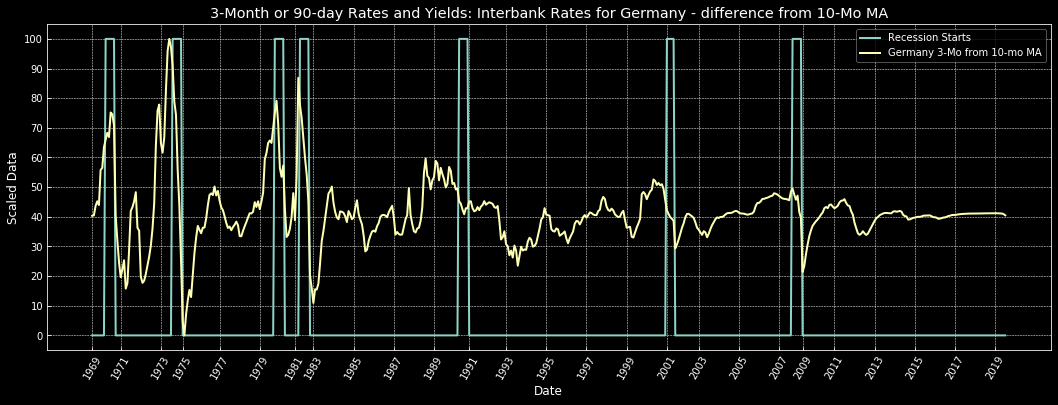

In [17]:
mpl.style.use('dark_background')
fig = plt.figure(figsize=(18,6))
# fig.suptitle('3-Month or 90-day Rates and Yields: Interbank Rates for Germany', fontsize=14, fontweight='bold')
ax = fig.add_subplot()
ax.set_title('3-Month or 90-day Rates and Yields: Interbank Rates for Germany - difference from 10-Mo MA')
ax.plot(ser_norm_nd.RECESSION, label="Recession Starts")
ax.plot(ser_norm_nd.IR3TIB01DEM156N_diffMA, label="Germany 3-Mo from 10-mo MA")
ax.set_xlabel("Date")
ax.set_ylabel("Scaled Data")
ax.locator_params(axis='y', tight=True, min_n_ticks=11)
ax.set_xticks(xt)
ax.set_xticklabels(xtl)
ax.tick_params(axis='x', labelrotation=60)
ax.legend()
plt.show()

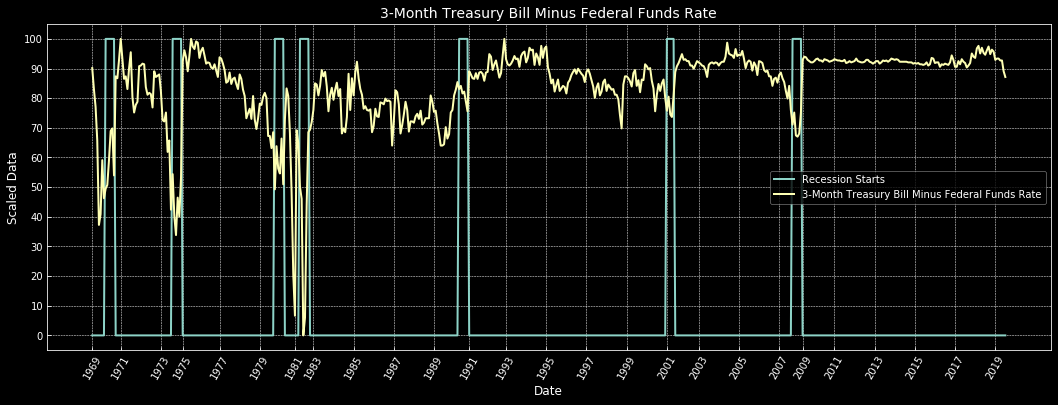

In [19]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot()
ax.set_title('3-Month Treasury Bill Minus Federal Funds Rate', fontsize=14)
ax.plot(ser_norm_nd.RECESSION, label="Recession Starts")
ax.plot(ser_norm_nd.TB3SMFFM, label="3-Month Treasury Bill Minus Federal Funds Rate")
ax.set_xlabel("Date")
ax.set_ylabel("Scaled Data")
ax.locator_params(axis='y', tight=True, min_n_ticks=11)
ax.set_xticks(xt)
ax.set_xticklabels(xtl)
ax.tick_params(axis='x', labelrotation=60)
ax.legend()
plt.show()

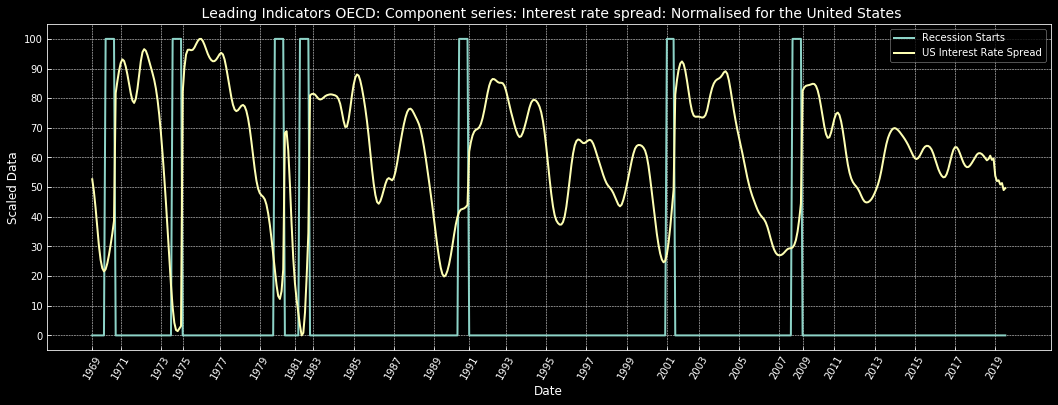

In [20]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot()
ax.set_title(' Leading Indicators OECD: Component series: Interest rate spread: Normalised for the United States', fontsize=14)
ax.plot(ser_norm_nd.RECESSION, label="Recession Starts")
ax.plot(ser_norm_nd.USALOCOSINOSTSAM, label="US Interest Rate Spread")
ax.set_xlabel("Date")
ax.set_ylabel("Scaled Data")
ax.locator_params(axis='y', tight=True, min_n_ticks=11)
ax.set_xticks(xt)
ax.set_xticklabels(xtl)
ax.tick_params(axis='x', labelrotation=60)
ax.legend()
plt.show()

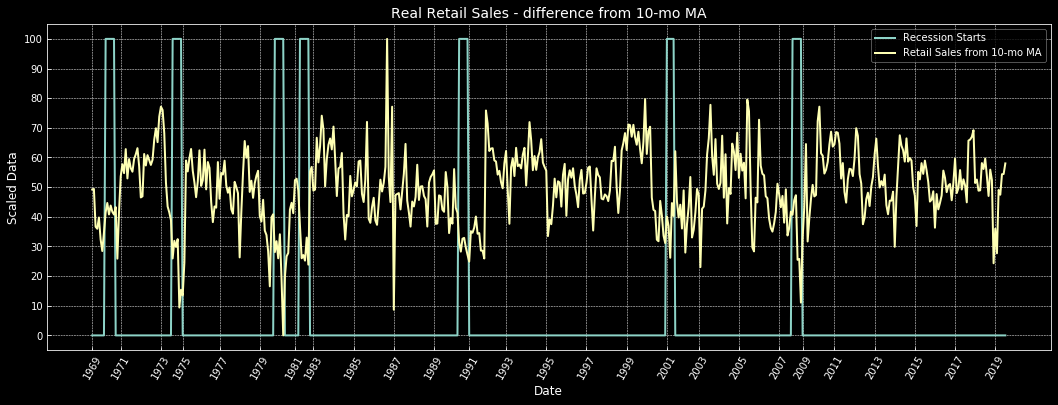

In [22]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot()
ax.set_title('Real Retail Sales - difference from 10-mo MA', fontsize=14)
ax.plot(ser_norm_nd.RECESSION, label="Recession Starts")
ax.plot(ser_norm_nd.RRSFS_diffMA, label="Retail Sales from 10-mo MA")
ax.set_xlabel("Date")
ax.set_ylabel("Scaled Data")
ax.locator_params(axis='y', tight=True, min_n_ticks=11)
ax.set_xticks(xt)
ax.set_xticklabels(xtl)
ax.tick_params(axis='x', labelrotation=60)
ax.legend()
plt.show()

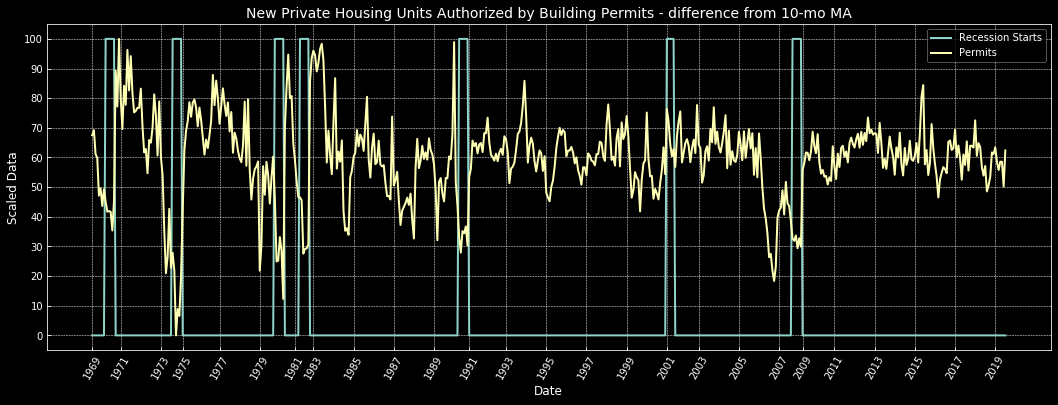

In [26]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot()
ax.set_title('New Private Housing Units Authorized by Building Permits - difference from 10-mo MA', fontsize=14)
ax.plot(ser_norm_nd.RECESSION, label="Recession Starts")
ax.plot(ser_norm_nd.PERMIT_diffMA, label="Permits")
ax.set_xlabel("Date")
ax.set_ylabel("Scaled Data")
ax.locator_params(axis='y', tight=True, min_n_ticks=11)
ax.set_xticks(xt)
ax.set_xticklabels(xtl)
ax.tick_params(axis='x', labelrotation=60)
ax.legend()
plt.show()

In [154]:
a=[(1,2),(3,4),(5,6)]

In [162]:
reduce((lambda x,y: x+y), map(lambda t: t[0], a))

9

In [163]:
sdets = pd.read_csv('../data/raw/series_details.csv')
sdets.shape

(3926, 16)

In [166]:
sdets.head()

Unnamed: 0 frequency frequency_short             id         last_updated  \
0           0   Monthly               M      IPB53110N  2019-06-14 13:26:55   
1           0   Monthly               M       CAPG325S  2019-06-14 13:26:17   
2           0   Monthly               M  CAPUTLX4HTMVS  2019-06-14 13:28:08   
3           0   Monthly               M    LNU02000013  2019-06-07 13:04:26   
4           0   Monthly               M    LNS13024232  2019-06-07 13:04:28   

                                               notes observation_end  \
0  The industrial production (IP) index measures ...      2019-05-01   
1         NAICS = 325\r\n\r\nSource Code: CAP.G325.S      2019-05-01   
2  For a given industry, the capacity utilization...      2019-05-01   
3  The series comes from the 'Current Population ...      2019-05-01   
4                                                NaN      2019-05-01   

  observation_start  popularity realtime_end realtime_start  \
0        1947-01-01           0   2019-06-16     2019-06-16   
1        1948-01-01           3   2019-06-16     2019-06-16   
2        1967-01-01           2   2019-06-16     2019-06-16   
3        1948-01-01           1   2019-06-16     2019-06-16   
4        1948-01-01           1   2019-06-16     2019-06-16   

       seasonal_adjustment seasonal_adjustment_short  \
0  Not Seasonally Adjusted                       NSA   
1      Seasonally Adjusted                        SA   
2      Seasonally Adjusted                        SA   
3  Not Seasonally Adjusted                       NSA   
4      Seasonally Adjusted                        SA   

                                               title                 units  \
0              Industrial Production: Consumer parts        Index 2012=100   
1  Industrial Capacity: Nondurable Manufacturing:...        Index 2012=100   
2  Capacity Utilization: Manufacturing excluding ...   Percent of Capacity   
3              Employment Level: 16 to 19 years, Men  Thousands of Persons   
4  Unemployment Level: Civilian Labor Force: Wome...             Thousands   

         units_short  
0     Index 2012=100  
1     Index 2012=100  
2      % of Capacity  
3  Thous. of Persons  
4             Thous.

In [168]:
sdets.sort_values(by='observation_end')

Unnamed: 0                 frequency frequency_short  \
3160           0                 Quarterly               Q   
573            0                 Quarterly               Q   
3568           0                 Quarterly               Q   
575            0                 Quarterly               Q   
2790           0                 Quarterly               Q   
1013           0                 Quarterly               Q   
1813           0                 Quarterly               Q   
581            0                 Quarterly               Q   
582            0                 Quarterly               Q   
583            0                 Quarterly               Q   
3563           0                 Quarterly               Q   
3292           0                 Quarterly               Q   
1810           0                 Quarterly               Q   
1174           0                 Quarterly               Q   
588            0                 Quarterly               Q   
3559           0                 Quarterly               Q   
1009           0                 Quarterly               Q   
593            0                 Quarterly               Q   
1364           0                 Quarterly               Q   
3557           0                 Quarterly               Q   
2798           0                 Quarterly               Q   
2800           0                 Quarterly               Q   
2789           0                 Quarterly               Q   
3056           0  Quarterly, End of Period               Q   
571            0  Quarterly, End of Period               Q   
1823           0  Quarterly, End of Period               Q   
541            0                 Quarterly               Q   
2775           0                 Quarterly               Q   
3591           0  Quarterly, End of Period               Q   
1844           0                 Quarterly               Q   
...          ...                       ...             ...   
1021           0   Weekly, Ending Saturday               W   
3366           0   Weekly, Ending Saturday               W   
921            0  Weekly, Ending Wednesday               W   
100            0  Weekly, Ending Wednesday               W   
3307           0                     Daily               D   
15             0              Daily, 7-Day               D   
1709           0                     Daily               D   
2495           0                     Daily               D   
731            0              Daily, 7-Day               D   
356            0              Daily, 7-Day               D   
662            0                     Daily               D   
1260           0                     Daily               D   
1367           0                     Daily               D   
2952           0              Daily, 7-Day               D   
3691           0                     Daily               D   
2656           0                     Daily               D   
431            0                     Daily               D   
223            0                     Daily               D   
815            0                     Daily               D   
2608           0                     Daily               D   
177            0              Daily, Close               D   
256            0                     Daily               D   
3023           0                     Daily               D   
3475           0                     Daily               D   
3395           0                     Daily               D   
2960           0                   Monthly               M   
3539           0                 Quarterly               Q   
2262           0                 Quarterly               Q   
3154           0                 Quarterly               Q   
3066           0                 Quarterly               Q   

                         id         last_updated  \
3160           CAPUTLGMFDSQ  2019-06-14 13:26:52   
573           CAPUTLG2212SQ  2019-06-14 13:28:09   
3568 

In [176]:
print(sdets[sdets.id.isin(delay_drop)].title[0:].values)

['OECD based Recession Indicators for Austria from the Peak through the Period preceding the Trough'
 'OECD based Recession Indicators for Korea from the Peak through the Trough'
 'Business Tendency Surveys for Manufacturing: Confidence Indicators: Composite Indicators: European Commission and National Indicators for the United States'
 'OECD based Recession Indicators for Turkey from the Peak through the Period preceding the Trough'
 'OECD based Recession Indicators for Major Seven Countries from the Peak through the Period preceding the Trough'
 'OECD based Recession Indicators for South Africa from the Period following the Peak through the Trough'
 'Nonfinancial Corporations Sector: Profits'
 'Amount Outstanding Due within One Year of International Debt Securities for General Government Sector, Residence of Issuer in All countries'
 'OECD based Recession Indicators for Netherlands from the Peak through the Trough'
 'OECD based Recession Indicators for Norway from the Period followin

In [270]:
gclist_norm[990:1000]

[('HTRUCKSNSA_diffA', 0.031069812754256628),
 ('B009RE1Q156NBEA_diffMA', 0.03108554640226041),
 ('LNU03008876', 0.031161419594035622),
 ('CANCPGRLH01GYQ_diffMA', 0.031195856279516192),
 ('MANMM101ISQ657S_diffA', 0.0312525330227924),
 ('LFEAICTTUSM647S', 0.03126171530804047),
 ('A643RZ2Q224SBEA', 0.031313246170948765),
 ('LFAC24FEUSM647N_diffA', 0.031348538353352474),
 ('CANLOCOSIORSTM_diffA', 0.03138777629625263),
 ('LFEMTTMAJPQ647N_diffMA', 0.03148037114818004)]

In [271]:
gc_top1k = list(map(lambda x: x[0],gclist_norm[:1000]))

In [272]:
ser_top1k = ser_data2[gc_top1k]

In [274]:
ser_top1k['RECESSION'] = ser_data2.RECESSION

C:\Users\robin\Anaconda3\envs\recession\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [275]:
ser_top1k

IR3TIB01DEM156N_diffMA  IR3TIB01DEM156N_diffQ  \
date                                                        
1969-01-01           -3.883521e-01              -5.892239   
1969-02-01           -3.013077e-01              -3.950478   
1969-03-01            1.352537e+00              -1.540017   
1969-04-01            2.169415e+00               3.548735   
1969-05-01            1.506538e+00               3.146991   
1969-06-01            7.700085e+00               8.637487   
1969-07-01            8.075046e+00               9.240102   
1969-08-01            1.172422e+01              14.194939   
1969-09-01            1.303658e+01               9.641846   
1969-10-01            1.425520e+01              10.980991   
1969-11-01            1.350528e+01               7.967914   
1969-12-01            1.784411e+01              12.654922   
1970-01-01            1.752272e+01              12.521008   
1970-02-01            1.557426e+01              12.186222   
1970-10-01           -4.151350e-01              -0.401744   
1970-11-01           -4.733878e+00              -2.142632   
1970-12-01           -8.624095e+00              -8.302700   
1971-01-01           -1.122873e+01             -13.592324   
1971-02-01           -9.829326e+00              -9.173145   
1971-03-01           -8.242439e+00              -4.419179   
1971-04-01           -1.325084e+01              -7.633128   
1971-05-01           -1.229335e+01              -8.771401   
1971-06-01           -6.427897e+00              -4.419179   
1971-07-01            4.687008e-01               8.704444   
1971-08-01            1.118186e+00               9.374017   
1971-09-01            2.156024e+00               5.289624   
1971-10-01            3.776390e+00               0.937402   
1971-11-01           -2.510897e+00              -5.155709   
1971-12-01           -3.019772e+00              -6.427897   
1972-01-01           -1.114169e+01             -17.475845   
...                            ...                    ...   
2017-02-01           -1.874803e-01              -0.133915   
2017-03-01           -1.406102e-01              -0.066957   
2017-04-01           -1.004359e-01               0.000000   
2017-05-01           -7.365299e-02               0.000000   
2017-06-01           -5.356581e-02               0.000000   
2017-07-01           -3.347863e-02               0.000000   
2017-08-01           -2.008718e-02               0.000000   
2017-09-01           -6.695726e-03               0.000000   
2017-10-01            7.077672e-14               0.000000   
2017-11-01            7.077672e-14               0.000000   
2017-12-01            1.265492e-02               0.014061   
2018-01-01            7.633128e-03               0.010044   
2018-02-01            6.628769e-03               0.010044   
2018-03-01            9.240102e-03               0.000000   
2018-04-01            4.218307e-03               0.000000   
2018-05-01            2.310026e-02               0.022096   
2018-06-01            3.917000e-02               0.039505   
2018-07-01            4.164742e-02               0.052227   
2018-08-01            4.566485e-02               0.041514   
2018-09-01            3.950478e-02               0.021426   
2018-10-01            4.004044e-02               0.020087   
2018-11-01            4.064306e-02               0.017409   
2018-12-01            5.845369e-02               0.044861   
2019-01-01            7.258167e-02               0.064949   
2019-02-01            5.644497e-02               0.053566   
2019-03-01            4.037523e-02               0.019418   
2019-04-01            2.397070e-02              -0.016739   
2019-05-01            8.704444e-03              -0.023435   
2019-06-01           -9.849413e-02              -0.131906   
2019-07-01           -3.086730e-01              -0.364248   

            DEULOCOSIORSTM_diffMA  DEULOCOSIORSTM_diffQ  \
date                                                      
1969-01-01              -0.021254              9.3

In [276]:
ser_top1k.to_csv('../data/processed/gc_top1k-082919.csv')

In [288]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif


In [281]:
y = ser_data2.RECESSION
y.shape

(546,)

In [294]:
bestfeatures = SelectKBest(score_func=chi2, k=1000)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
feature_chi2Scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_chi2Scores.columns = ['Series','Score']  #naming the dataframe columns
print(feature_chi2Scores.nlargest(10,'Score'))  #print 10 best features

                   Series        Score
1600        RECPROUSM156N  5616.651889
1071       POLCCUSMA02GYQ  1454.984954
14674  FEDMINNFRWG_diffMA  1170.319472
14673   FEDMINNFRWG_diffA  1165.757230
12870   FEDMINFRMWG_diffA  1139.123901
1387      CCUSSP01ISQ650N  1091.357052
498                MSACSR  1040.849254
76       CANLOCOSINOSTSAM   968.343737
12871  FEDMINFRMWG_diffMA   964.677063
1482        CES4348200001   960.157550


In [298]:
chi2_top1k = feature_chi2Scores.nlargest(1000,'Score').Series.values

In [299]:
ser_chi2_top1k = ser_data2[chi2_top1k]
ser_chi2_top1k['RECESSION'] = ser_data2.RECESSION
ser_chi2_top1k.shape

C:\Users\robin\Anaconda3\envs\recession\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(546, 1001)

In [300]:
ser_chi2_top1k.to_csv('../data/processed/chi2_top1k-082919.csv')

In [289]:
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=1000)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Series','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


               Series     Score
1275  LFWA64FEUSM647N  0.237183
1621  PCU333618333618  0.235624
636   LFWA64TTUSM647N  0.235520
392   DEUCPICORQINMEI  0.234388
222   FINCPICORQINMEI  0.232986
1128  LFWA64MAUSM647N  0.232847
1291  LFWATTFEJPQ647N  0.232701
1025  Y055RG3Q086SBEA  0.232273
1114  LFWATTFEJPQ647S  0.231375
236   Y071RG3Q086SBEA  0.231231


In [302]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_split=4, random_state=42, class_weight=None,\
                               criterion='gini', max_features=None, min_samples_leaf=2)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               

(546, 133)

In [ ]:
model = SelectFromModel(clf, prefit=True, threshold=np.inf, max_features=1000)
X_new = model.transform(X)
X_new.shape  

In [305]:
df_rfscores = pd.DataFrame(clf.feature_importances_)
feat_rf_scores = pd.concat([dfcolumns, df_rfscores], axis=1)
feat_rf_scores.columns = ['Series','Score'] 
feat_rf_scores.nlargest(10, 'Score')

Series     Score
15540    RECPROUSM156N_diffMA  0.139212
15538     RECPROUSM156N_diffQ  0.104244
18537           PERMIT_diffMA  0.080986
498                    MSACSR  0.080487
790                    T1YFFM  0.065995
8247    CSCICP03USM665S_diffA  0.041769
17401   IR3TED01USQ156N_diffA  0.034729
1134         DEULOCOSINOSTSAM  0.024272
5906    IRSTCB01JPM156N_diffA  0.019302
6783   CHELOCOSPNOSTSAM_diffQ  0.018252

In [306]:
rf_top1k = feat_rf_scores.nlargest(1000, 'Score').Series.values
ser_rf_top1k = ser_data2[rf_top1k]
ser_rf_top1k['RECESSION'] = ser_data2.RECESSION
ser_rf_top1k.shape

C:\Users\robin\Anaconda3\envs\recession\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(546, 1001)

In [308]:
ser_rf_top1k.to_csv('../data/processed/rf_top1k-082919.csv')

In [309]:
ser_rf_top1k.columns.isin(chi2_top1k)

array([False, False,  True, ..., False,  True, False])